<h1 style="text-align: center;">Text Classification<h1>

Dataset link: https://www.kaggle.com/datasets/yassinabdulmahdi/arabic-medical-q-and-a-dataset/data

# **Imports:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.tokenize import word_tokenize
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import json
from keras.models import load_model
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, MaxPooling1D, Flatten
from keras.initializers import Constant
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from scipy.sparse import csr_matrix
import keras


# Question [1]: Load the data

## [1.1]

<div dir="rtl">
تحميل البينات على dataframe وطباعة أول 10 أسطر منها وعدد الData الكلي وحذف الأسطر المكررة والتي تحتوي على خلايا فارغة أو NaN
</div>

In [2]:
train_data_path = 'train.csv'
val_data_path = 'val.csv'
test_data_path = 'test.csv'

train_data = pd.read_csv(train_data_path)
val_data = pd.read_csv(val_data_path)
test_data = pd.read_csv(test_data_path)

train_data = train_data.dropna().drop_duplicates()
val_data = val_data.dropna().drop_duplicates()
test_data = test_data.dropna().drop_duplicates()

pd.set_option('display.max_colwidth', None)


first_10_rows_train = train_data.head(10)
total_rows_train = len(train_data)

first_10_rows_val = val_data.head(10)
total_rows_val = len(val_data)

first_10_rows_test = test_data.head(10)
total_rows_test = len(test_data)

print("train data len:", total_rows_train)
print("validation data len:", total_rows_val)
print("test data len:", total_rows_test)

train data len: 32598
validation data len: 11341
test data len: 11282


In [3]:
first_10_rows_train.head(10)

,question,answer,label
0,\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30,\n\nلكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له\n1\n2015-01-04 20:08:51\n\n\nالدكتور يزن علي خليف\n\n\n\n\n\n\n\n/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157\n\nالدكتور يزن علي خليف \n\n\nالغدد الصماء \n\n\n,الدم
1,\nاليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة,\n\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة\n0\n2017-02-13 06:34:19\n\n\nالدكتور باسم مرقص\n\n\n\n\n\n\n\n/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154\n\nالدكتور باسم مرقص \n\n\nجراحة عامة \n\n\n,الاورام-الخبيثة-والحميدة
2,\nحلول منزلية لأعراض ارتفاع ضغط الدم,\n\nيفضل عدم الاستغناء عن العلاج الدوائي لمرضى الضغط لكن يعد النظام الغذائي و الحركي اليومي للمريض جزء مهم و أساسي في الحفاظ على ضغط المريض ضمن الحدود الطبيعية.\nينصح ممارسة دورية للرياضة و المشي و محاولة تخفيف الوزن، التخفيف من المنبهات بأنواعها و محاولة الإقلاع عن التدخين.\nتناول الأطعمة الغنية بالبوتاسيوم كالموز و تجنب الأطعمة التي تحتوي على أملاح لتأثيرها المباشر على الضغط، و تناول المغذيات مثل مستخلص الثوم و زيوت السمك.\nتجنّب التوتر و المحافظة على نظام يومي هادئ و المتابعة الدورية لقراءات الضغط.\n3\n2014-12-09 18:05:33\n\n\nالدكتور انور سالم العواودة\n\n\n\n\n\n\n\n/اسئلة-طبية/ارتفاع-ضغط-الدم/حلول-منزلية-لاعراض-ارتفاع-ضغط-الدم-342609\n\nالدكتور انور سالم العواودة \n\n\nالقلب والاوعية الدموية \n\n\n,جراحة-عامة
3,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر وعندي الم من اسفل ساق الى اعلى ساق و برودة اطراف القدم وحرقان وخز و امكان يابسة وحكة و طيبة عليا هل هدا طبيعي احس في سكين تقطع,\n\nراجع طبيبك من اجري الجراحه افضل من يجيب لانه شاهد الحاله علي وضعها الاول وهوا من قام بلفعل تمنياتي بلشفاء\n0\n2023-06-17 05:56:49\n\n\nالدكتور حسن ابراهيم خليفة\n\n\n\n\n\n\n\n/اسئلة-طبية/جراحة-عامة/عملت-عملية-دوالي-الساقين-قسطرة-الليزر-من-شهر-وعندي-1715059\n\nالدكتور حسن ابراهيم خليفة \n\n\nجراحة عامة \n\n\n,أمراض-الجهاز-التنفسي
4,\nما حقيقة ان تمرين العضلة النعلية يخفض السكر بالدم؟؟,\n\nإذا قصدت تدليك العضلة فهذا كلام غير صحيح . ولكن ممارسة الرياضة مثل المشي يعني حركة العضلات والمساهمة في حرق السكر\n0\n2023-06-03 07:52:03\n\n\nالدكتور اغيد محمد بيريص\n\n\n\n\n\n\n\n/اسئلة-طبية/مرض-السكري/ما-حقيقة-ان-تمرين-العضلة-النعلية-يخفض-السكر-بالدم-1709936\n\nالدكتور اغيد محمد بيريص \n\n\nالغدد الصماء \n\n\n,مرض-السكري
5,\nالسلام عليكم انا شاب 25 سنه وظهرلي زي كوره من فتحت الشرج وهي تولمني الان ارجو حل فوري لاني مش مستحمل الالم وكمان عامل عمليه حاليا في كتفي مركب وديما قاعد فعاوز حل سريع وشكرا,\n\nلا يمكن الإجابة على هذا السؤال بدون فحص يجب الفحص\n0\n2018-08-24 23:19:49\n\n\nالاستشاري محمد عمر عبد العليم\n\n\n\n\n\n\n\n/اسئلة-طبية/جراحة-عامة/انا-وظهرلي-زي-كوره-من-فتحت-الشرج-وهي-تولمني-الان-حل-1216795\n\nالاستشاري محمد عمر عبد العليم \n\n\nجراحة عامة \n\n\n,أمراض-الدم
6,\nورمه قبل ثلاث سنوات كان حجمها ٣ انش ولاكن فجاة من شهر زاد حجمها فجاه ومعها عوار حول الورمه قمت بعمل تحليل غدة وهي سليمة ؟\nوعندي صورة لتقرير المقطعية,\n\nالفحص سليم من عدا أمرين:\n١. تضخم بسيط وحميد في عقدة لمفاوية تحت الفك الأيسر، وهذا لاتحتاج الى شيء غير المتابعة الدورية\n٢. عقدة صغيرة بحجم ٧ ملميتر في الفص الأيمن من الغدة الدرقية، وهذه تحتاج الى اجراء فحص سونار لها في الوقت الحالي.\n0\n2021-12-23 20:40:28\n\n\nالدكتور احمد خالد احمد\n\n\n\n\n\n\n\n/اسئلة-طبية/الاورام-الخبيثة-والحميدة/ورمه-قبل-ثلاث-سنوات-كان-حجمها-انش-ولاكن-فجاة-من-شهر-1556658\n\nالدكتور احمد خالد احمد \n\n\nامراض الدم والاورام \n\n\n,الغدد-الصماء
7,\nعملت عن البواسير منذ شهر وعانيت خلال التبرز كثيرا حدث لي امساك كيف اتخلص منه؟وخرج من سائل اظنه قيح هل هذا طبيعي؟وهل امشي كثيرا أم قليلا؟ ارجوالرد لاني لا استطيع الوصول للجراح,\n\nلا يوحد مشكلة بالمشي. الاكثار من شرب السوائل وممكن استخدام الملينات والمغاطس الدافئة مع الملح\n1\n2018-03-13 08:07:00\n\n\nالدكتور اسامة العبدالله\n\n\n\n\n\n\n\n/اسئلة-طبية/جراحة-عامة/عملت-عن-البواسير-شه

In [4]:
first_10_rows_val.head(10)

,question,answer,label
0,\nما هى الاعراض الاولى لمرض السكر,\n\nأعراض مرض السكر كثيره أهمها العطش كثرة ادرار البول زيادةاﻻقبال علي الطعام الجوع أحيانا حكه في الجلد ضعف عام\n0\n2015-11-25 09:03:09\n\n\nالدكتور علي عبدالرحيم الابراهيم\n\n\n\n\n\n\n\n/اسئلة-طبية/مرض-السكري/ما-هى-الاعراض-الاولى-لمرض-السكر-626454\n\nالدكتور علي عبدالرحيم الابراهيم \n\n\nطب الاسرة \n\n\n,جراحة عامة
1,\nكيف يمكن علاج الناسور العصعصي بدون جراحة,\n\nعلاج الناسور العصعصي يكون بالجراحة فقط\n0\n2019-04-19 07:48:03\n\n\nالدكتور اسامة العبدالله\n\n\n\n\n\n\n\n/اسئلة-طبية/جراحة-عامة/كيف-يمكن-علاج-الناسور-العصعصي-بدون-جراحة-1318818\n\nالدكتور اسامة العبدالله \n\n\nجراحة عامة \n\n\n,جراحة_العظام
2,\nماهي الاثار الجانبية لستئصال الغده الدرقيه على العمليات الحيويه؟ارجو اجابة سريعه وشامله لاني بحثت في مواقع عدة لم اجد,\n\nهناك تغييرات عديدة في العمليات الحيوية لمواد عديدة في الجسم وعليك ان تحدد لي ماذا تريد بالتحديد مثلا هل تريد معرفة استئصال الغدة الدرقية على العمليات الحيوية للعظام او المعدن او الليوسين في النسيج الدهني الخ\n\n0\n2011-02-26 16:46:53\n\n\nطاقم الطبي\n\n\n\n\n\n\n\n/اسئلة-طبية/امراض-الغدد-الصماء/ماهي-الاثار-الجانبية-لستئصال-الغده-الدرقيه-على-36910\n\nطاقم الطبي \n\n\n\n\n\n,ارتفاع_ضغط_الدم
3,\nلدى نقص بهرمون الذكورة ووصف لدى الدكتور حقت سيدوتسترون وأخذت حقنتين واحدة كل أسبوع ولكنى خفت بعدما علمت أضرار أخذ هذه الحقن ما العمل ولاى عدد من الحقن أستمر,\n\nيجب اتباع التعليمات الطبية و عدم وقف العلاج و قد تستمر الحقن فترة طويلة\n0\n2015-10-18 17:36:21\n\n\nالدكتور نبيل سمير ويصا\n\n\n\n\n\n\n\n/اسئلة-طبية/امراض-الغدد-الصماء/لدى-نقص-بهرمون-الذكورة-ووصف-لدى-ال-حقت-سيدوتسترون-583463\n\nالدكتور نبيل سمير ويصا \n\n\nباطنية \n\n\n,امراض-الغدد-الصماء
4,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر احس بي تعب و الم من اسفل ساق يصعد للى اعلى ساق وحرقان مع وخز و امكان يابسة في ساق و يردة القدم والعروق لم تختفي هل هذا طبيعي,\n\nمرحبا،\nبعد العملية، يمكن أن يحدث بعض الأعراض المشابهة لتلك التي توصف من قبلك. قد يتم تشخيص الألم الذي تشعر به بأنه التهاب و التورم نتيجة للعملية. يمكن حدوث حرقان والتهيج بسبب الضغط على الأعصاب المحيطة بالمنطقة الجراحية. يمكنك الحصول على الإرشادات اللازمة من طبيبك الذي أجرى العملية لتحديد سبب الأعراض و معالجتها بشكل مناسب. يمكن أن يوصي الطبيب بتطبيق الجليد أو المراهم لتخفيف الأعراض المذكورة، كما قد يوصي بارتداء جورب ضاغط للمساعدة في الشفاء. تسخير الأمدادات الطبية المتوفرة لديك هو أفضل خيار للتعامل بطريقة فعالة مع الأعراض التي تعاني منها. اتمنى لك الشفاء العاجل.\n1\n2023-06-14 07:15:53\n\n\nالدكتور عبد العزيز اللبدي\n\n\n\n\n\n\n\n/اسئلة-طبية/جراحة-عامة/عملت-عملية-دوالي-الساقين-قسطرة-الليزر-من-شهر-احس-بي-1713525\n\nالدكتور عبد العزيز اللبدي \n\n\nجراحة عامة \n\n\n,أمراض الجهاز التنفسي
5,\nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب بالسكر من 10سنوات استخدم جلكوفاج 500 ثلاث مرات وفيتامين b12 حبه بشكل منتظم واحيانا حبتين عملت مؤخرا تحليل لمستوى فيتامين b12 طلع النسبة 1200 واعاني من تنمل في أصابع اليدين وجفاف شديد بباطن القدمين هل هذا الارتفاع هو السبب لهذا التنمل والجفاف وشكرا,\n\nمين قالك تاخذ B12 ما هي بالمزاج ولا بالكيف يوقف استعمال المكمل او اي مكمل آخر تاخذه نهائي ما تاخذ اي. مكمل الا بعد استشارة طبيبك واذا تبين ان هناك نقص غير كذا يمنع منعاً باتاً\n1\n2023-08-07 12:29:20\n\n\nد. عبدالرحمن العنزي\n\n\n\n\n\n\n\n/اسئلة-طبية/مرض-السكري/عمر-الظغط-طبيعي-وزني-طولي-مصاب-بالسكر-من-سنوات-استخدم-1726663\n\nد. عبدالرحمن العنزي \n\n\nطب عام \n\n\n,الاورام الخبيثة والحميدة
6,\nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب بالسكر من 10سنوات استخدم جلكوفاج 500 ثلاث مرات وفيتامين b12 حبه بشكل منتظم واحيانا حبتين عملت مؤخرا تحليل لمستوى فيتامين b12 طلع النسبة 1200 واعاني من تنمل في أصابع اليدين وجفاف شديد بباطن القدمين هل هذا الارتفاع هو السبب لهذا التنمل والجفاف وشكرا,\n\nمين قالك تاخذ B12 ما هي بالمزاج ولا بالكيف يوقف استعمال المكمل او اي مكمل آخر تاخذه نهائي ما تاخذ اي. مكمل الا بعد استشارة طبيبك واذا تبين ان هناك نقص غير كذا يمنع منعاً باتاً\n1\n2023-08-07 12:29:20\n\n\nد. عبدالرحمن العنزي\n\n\n\n\n\n\n\n/اسئلة-طبية/مرض-السكري/عمر-الظغط-طبيعي-وزني-طولي-مصاب-بالسكر-من-سنوات-استخدم-1726663\n\nد. عبدالرحمن العنزي \n\n\nطب عام \n\n\n,جراحة_عامة
7,\nعملت اتستصال

In [5]:
first_10_rows_test.head(10)

,question,answer,label
0,\nعندي الم مستمر داخل الشرج لا يوجد تشقق ولا ناسورر ولا اي علامات البواسير. الم غريب شبيه بالم الامسلك. اظنه بالمستقيم. مستمر منذ شهر تقريبا. الالم جاء بعد ان جلست بالبيت بسبب كورونا. اظن انه لقلة الحركة؟ارجوكم انا مقيم في ابو ظبي. اوصفو لي دواء,\n\nاخي الكريم استخدم أقراص مضادة للالتهاب Ponstan tabletes مرتين يوميا لتخفيف الالم لحين زيارة الطبيب باقرب وقت ممكن عافاكم الله\n1\n2020-05-13 02:48:46\n\n\nد. حيدر الحسيني\n\n\n\n\n\n\n\n/اسئلة-طبية/جراحة-عامة/عندي-الم-مستمر-داخل-الشرج-لا-يوجد-تشقق-ولا-ناسورر-ولا-1419448\n\nد. حيدر الحسيني \n\n\nتخدير وانعاش \n\n\n,جراحة-عامة
1,\nهل يمكن لثوم ان يخفض من الضغظ وماهي الجرعه المستخدمه عند الاستخدام وهل يوجد دراسات سابقه عن هذا العلاج\nوشكرا لكم,\n\nنعم يمكن وهناك كثير من الدراسات التي تؤكد ذلك، لكن لا يمكن أن يكون بديلا عن العلاج\n2\n2014-06-14 05:12:52\n\n\nالدكتور انور سالم العواودة\n\n\n\n\n\n\n\n/اسئلة-طبية/ارتفاع-ضغط-الدم/لثوم-ان-يخفض-من-الضغظ-وماهي-الجرعه-المستخدمه-عند-301026\n\nالدكتور انور سالم العواودة \n\n\nالقلب والاوعية الدموية \n\n\n,ارتفاع-ضغط-الدم
2,\nعملت فحص سكر الصائم بعد صيام اكثر من ١٢ساعة\nونتيجة كانت ١٠١ هل يعني هذا أني اعاني من مقاومة انسولين ؟,\n\nالنتيجة طبيعية\n2\n2023-06-03 08:16:44\n\n\nالدكتور اغيد محمد بيريص\n\n\n\n\n\n\n\n/اسئلة-طبية/امراض-الغدد-الصماء/عملت-فحص-سكر-الصائم-بعد-صيام-من-ساعة-ونتيجة-كانت-هل-1711363\n\nالدكتور اغيد محمد بيريص \n\n\nالغدد الصماء \n\n\n,امراض_الجهاز_التنفسي
3,\nعملت ماموجرام وموجات فوق صوتيه فوجدت تضخم فى العقد الليمفاوية فى الثدي وعينة الباثولوجي أكدت وجود نمو غير طبيعي في خلايا الغدد الليمفاوية وعملت أشعة بالصبغة علي البطن وطلعت سليمة\nهل يجب عمل رنين مغناطيسي لإستئصال الورم,\n\nيفضل طبعا عمل رنين لانه ادق بكثير لمعرفه هل يجب التدخل الجراحى ام المتابعه\n0\n2023-06-25 16:19:15\n\n\nد. محمد عماد الزكي\n\n\n\n\n\n\n\n/اسئلة-طبية/الاورام-الخبيثة-والحميدة/عملت-ماموجرام-وموجات-فوق-صوتيه-فوجدت-تضخم-فى-العقد-1717150\n\nد. محمد عماد الزكي \n\n\nامراض الدم والاورام \n\n\n,الاورام-الخبيثة-والحميدة
4,\nقبل ثلاثة أسابيع أصبت بالتهابات القصبات الهوائية وكانت أعراضها ضيق التنفس والتوتر الشديد الذي يصيبني بتشنجات، وبعد العلاج أصبح ضيق التنفس وصعوبة البلع يرافقني في أي موقف,\n\nالعودة والكشف عند الطبيب لمعرفة اثار المرض ان بقيت. و تعديل الدواء لو امكن.\n0\n2018-07-04 19:28:10\n\n\nالدكتور خالد المهدي\n\n\n\n\n\n\n\n/اسئلة-طبية/امراض-الجهاز-التنفسي/قبل-ثلاثة-اسابيع-اصبت-بالتهابات-القصبات-الهوائية-1175366\n\nالدكتور خالد المهدي \n\n\nالجهاز الهضمي والكبد \n\n\n,ارتفاع-ضغط-الدم
5,\nعملت تحليل دم في الاسبوع ١٣ وخبرتني الدكتورة ان هناك نشاط في الغدة الدرقية وعلي مراجعة طبيب الغدد\nنسبة tsh 0.240 هل هي نسبة طبيعيةوهل يؤثر على الجنين؟ظهر جلوكوز بول ايضا,\n\nظهور السكر بالبول متوقع في الحمل الطبيعي ولكن يجب إجراء تحليل لسكر الدم . نحتاج بقية تحاليل الغدة والافضل يكشف عليك طبيب الغدد وغالبا حالتك طبيعية ولانحتاج علاجا . فقط نحتاج نعيد التحليل بعد شهر\n0\n2023-03-07 08:23:59\n\n\nالدكتور اغيد محمد بيريص\n\n\n\n\n\n\n\n/اسئلة-طبية/امراض-الغدد-الصماء/عملت-تحليل-دم-في-الاسبوع-وخبرتني-ال-ة-ان-نشاط-في-الغدة-1679231\n\nالدكتور اغيد محمد بيريص \n\n\nالغدد الصماء \n\n\n,امراض الغدد الصماء
6,\nاجرية عملية ناسور شرجي قبل ٨اشهر و لا زال يخرج سائل وردي شفاف ماذا افعل لكي يتوقف السائل عن الخروج\n,\n\nالافضل مراجعة طبيبك الذي اجرى الجراحة للتقييم\n0\n2018-04-11 21:17:58\n\n\nالدكتور اسامة العبدالله\n\n\n\n\n\n\n\n/اسئلة-طبية/جراحة-عامة/اجرية-عملية-ناسور-شرجي-قبل-٨اشهر-و-لا-زال-يخرج-سائل-1132018\n\nالدكتور اسامة العبدالله \n\n\nجراحة عامة \n\n\n,جراحة-عامة
7,\nكيف التوقف عن اخذ جرعات الثايروكسين ان كانت 25 مايكرو لمدة شهرين والان اريد التوقف عنها هل اخذ نصف الحبه لمدة 10 ايام واتوقف وهل هناك خطر في ذلك . اتمنى الاجابه اعزائي,\n\nممكن التوقف عنها مرة واحدة ولكن يفضل بالتنسيق مع طبيبك\n0\n2016-10-30 06:19:44\n\n\nالدكتور باسم مرقص\n\n\n\n\n\n\n\n/اسئلة-طبية/امراض-الغدد-الصماء/كيف-التوقف-عن-اخذ-جرعات-الثايروكسين-ان-كانت-مايكرو-864059\n\nالدكتور باسم مرقص \n\n\nجراحة عامة \n\n\n,امراض-الغدد-الصماء
8,\nالسلام عليكم . يوجد لسع والم وتحجر وورم فى ثمانه احد القدمين بعد عمليه الدوالى الساقين بالليزر بالرغم مر على العمليه عشر ايام,\n\nراجع جراحك ولا خوف

## [1.2]

<div dir="rtl">
عملية توحيد أسماء الاختصاصات في العمود label
</div>

<div dir="rtl">
بداية سوف نرى كم هو عدد الunique labels ومما تتألف
</div>

In [6]:
unique_labels = train_data['label'].unique()
len(unique_labels)

37

In [7]:
unique_labels

array(['الدم', 'الاورام-الخبيثة-والحميدة', 'جراحة-عامة',
       'أمراض-الجهاز-التنفسي', 'مرض-السكري', 'أمراض-الدم', 'الغدد-الصماء',
       'الجهاز-التنفسي', 'ارتفاع-ضغط-الدم', 'أمراض_الغدد_الصماء',
       'جراحة-العظام', 'السكري', 'مرض_السكري', 'الاورام الخبيثة والحميدة',
       'جراحة عامة', 'الاورام_الخبيثة_والحميدة', 'امراض الغدد الصماء',
       'امراض_الغدد_الصماء', 'أمراض_الجهاز_التنفسي', 'جراحة_عامة',
       'أمراض-الغدد-الصماء', 'امراض الدم', 'ارتفاع_ضغط_الدم',
       'امراض_الجهاز_التنفسي', 'امراض_الدم', 'امراض الجهاز التنفسي',
       'ارتفاع ضغط الدم', 'امراض-الغدد-الصماء', 'جراحة_العظام',
       'مرض السكري', 'جراحة العظام', 'امراض-الجهاز-التنفسي',
       'أمراض الجهاز التنفسي', 'أمراض الغدد الصماء', 'أمراض_الدم',
       'امراض-الدم', 'أمراض الدم'], dtype=object)

<div dir="rtl">

قمنا بأنشاء dictionary لربط كل الأختصاصات المتشابهة باسم موحد

ثم قمنا بعمليةالربط على كل من داتا التدريب والتحقيق والإختبار

</div>

In [8]:
specialty_mapping = {
    "جراحة-عامة": "جراحة عامة",
    "جراحة عامة": "جراحة عامة",
    "جراحة_عامة": "جراحة عامة",
    "جراحه عامة": "جراحة عامة",

    "امراض-الغدد-الصماء": "أمراض الغدد الصماء",
    "أمراض_الغدد_الصماء": "أمراض الغدد الصماء",
    "الغدد-الصماء": "أمراض الغدد الصماء",
    "امراض الغدد الصماء": "أمراض الغدد الصماء",
    "امراض_الغدد_الصماء": "أمراض الغدد الصماء",
    "الغدد الصماء":"أمراض الغدد الصماء",
    "أمراض-الغدد-الصماء":"أمراض الغدد الصماء",


    "الدم":"أمراض الدم",
    "أمراض-الدم":"أمراض الدم",
    "امراض الدم":"أمراض الدم",
    "امراض_الدم":"أمراض الدم",
    "أمراض_الدم":"أمراض الدم",
    "امراض-الدم":"أمراض الدم",


    "ارتفاع-ضغط-الدم":"ارتفاع ضغط الدم",
    "ارتفاع_ضغط_الدم":"ارتفاع ضغط الدم",

    "أمراض-الجهاز-التنفسي":"أمراض الجهاز التنفسي",
    "أمراض-الجهاز-التنفسي":"أمراض الجهاز التنفسي",
    "الجهاز-التنفسي":"أمراض الجهاز التنفسي",
    "أمراض_الجهاز_التنفسي":"أمراض الجهاز التنفسي",
    "امراض الجهاز التنفسي":"أمراض الجهاز التنفسي",
    "امراض_الجهاز_التنفسي":"أمراض الجهاز التنفسي",
    "امراض-الجهاز-التنفسي":"أمراض الجهاز التنفسي",
    "أمراض الجهاز التنفسي":"أمراض الجهاز التنفسي",

    "جراحة-العظام":"جراحة العظام",
    "جراحة_العظام":"جراحة العظام",


    "مرض-السكري":"مرض السكري",
    "مرض_السكري":"مرض السكري",
    "السكري":"مرض السكري",


    "الأورام-الخبيثة-والحميدة":"الأورام الخبيثة والحميدة",
    "الاورام-الخبيثة-والحميدة":"الأورام الخبيثة والحميدة",
    "الاورام_الخبيثة_والحميدة":"الأورام الخبيثة والحميدة",
    "الاورام الخبيثة والحميدة":"الأورام الخبيثة والحميدة",
}

train_data['label'] = train_data['label'].map(specialty_mapping).fillna(train_data['label'])
val_data['label'] = val_data['label'].map(specialty_mapping).fillna(val_data['label'])
test_data['label'] = test_data['label'].map(specialty_mapping).fillna(test_data['label'])

<div dir="rtl">

طباعة عدد الlabels المختلفة في كل Dataframe للتأكد
</div>

In [9]:
unique_labels = train_data['label'].unique()
print("unique labels in train data:", len(unique_labels))


unique_labels = val_data['label'].unique()
print("unique labels in validation data:", len(unique_labels))

unique_labels = test_data['label'].unique()
print("unique labels in test data:", len(unique_labels))

unique labels in train data: 8
unique labels in validation data: 8
unique labels in test data: 8


# Question [2]: Text Analysis

## [2.1]


<div dir="rtl">
حساب عدد النصوص في كل اختصاص ورسم pie chart
</div>

In [12]:
!pip install arabic-reshaper python-bidi

In [10]:
import arabic_reshaper
from bidi.algorithm import get_display

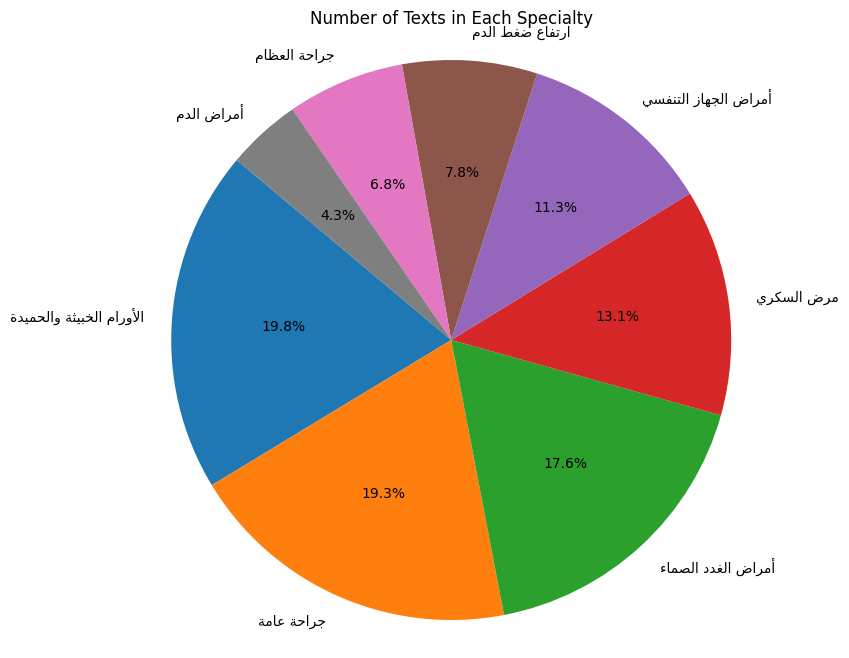

In [11]:
def reshape_labels(labels):
    reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in labels]
    return reshaped_labels

specialty_counts = train_data['label'].value_counts()

reshaped_labels = reshape_labels(specialty_counts.index)

plt.figure(figsize=(10, 8))
plt.pie(specialty_counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Number of Texts in Each Specialty')
plt.show()


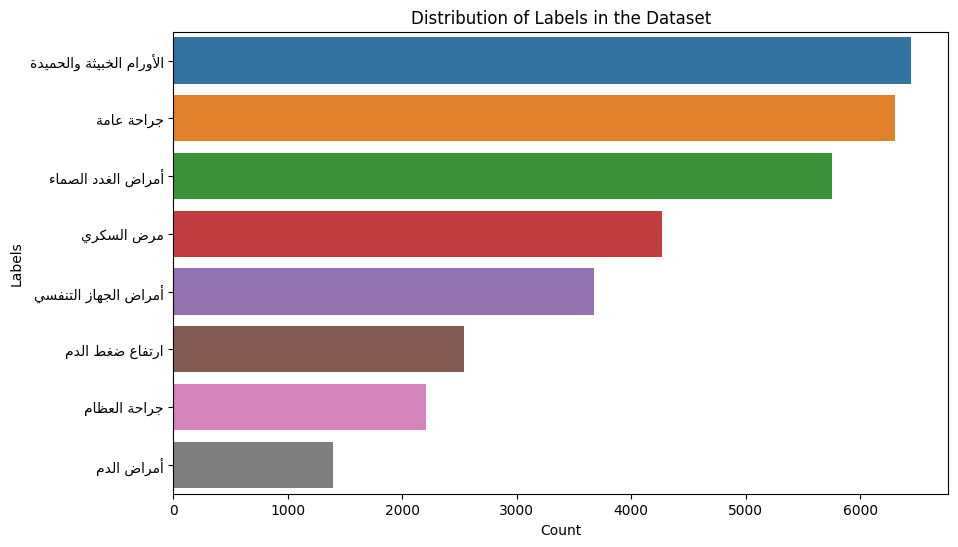

{'num_entries': 32598,
 'unique_labels': 8,
 'avg_question_length': 136.09690778575373,
 'avg_answer_length': 341.3952696484447}

In [15]:
num_entries = len(train_data)
unique_labels = train_data['label'].nunique()

train_data['question_length'] = train_data['question'].apply(len)
train_data['answer_length'] = train_data['answer'].apply(len)
avg_question_length = train_data['question_length'].mean()
avg_answer_length = train_data['answer_length'].mean()

label_counts = train_data['label'].value_counts()
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in label_counts.index]


plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.values, y=reshaped_labels)
plt.title('Distribution of Labels in the Dataset')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()

{
    "num_entries": num_entries,
    "unique_labels": unique_labels,
    "avg_question_length": avg_question_length,
    "avg_answer_length": avg_answer_length
}


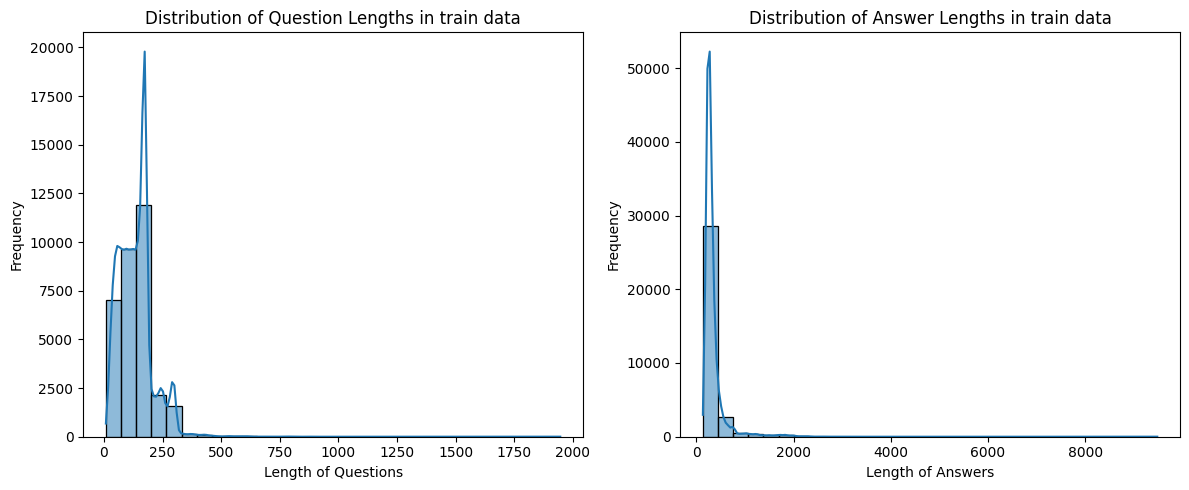

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_data['question_length'], bins=30, kde=True)
plt.title('Distribution of Question Lengths in train data')
plt.xlabel('Length of Questions')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(train_data['answer_length'], bins=30, kde=True)
plt.title('Distribution of Answer Lengths in train data')
plt.xlabel('Length of Answers')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

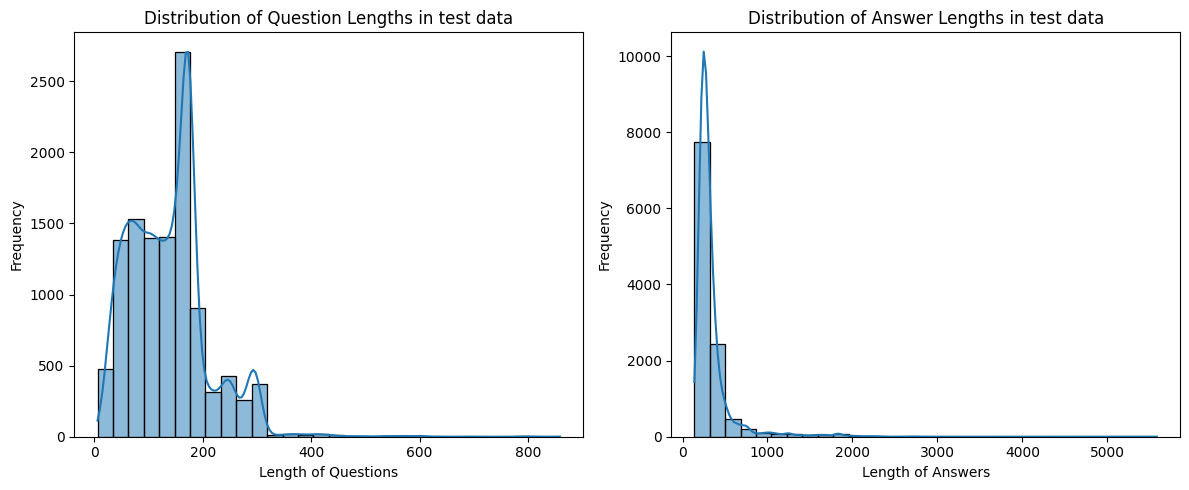

In [17]:
test_data['question_length'] = test_data['question'].apply(len)
test_data['answer_length'] = test_data['answer'].apply(len)
avg_question_length = test_data['question_length'].mean()
avg_answer_length = test_data['answer_length'].mean()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(test_data['question_length'], bins=30, kde=True)
plt.title('Distribution of Question Lengths in test data')
plt.xlabel('Length of Questions')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(test_data['answer_length'], bins=30, kde=True)
plt.title('Distribution of Answer Lengths in test data')
plt.xlabel('Length of Answers')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



## [2.2]

### Tokenization
<div dir="rtl">

عملية تقسيم الداتا الى وحدات tokens باستخدام word_tokenize

كما سنقوم بتوحيد كل الأرقام بtoken واحد وكل الروابط بtoken واحد أيضاً
</div>

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hm7al\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
def arabic_tokenizer(text):
    url_regex = r'https?://\S+|www\.\S+|/\S+-\S+/|\S+-\S+-\S+'
    number_regex = r'\d+|[٠١٢٣٤٥٦٧٨٩]+'

    urls = re.findall(url_regex, text)
    numbers = re.findall(number_regex, text)

    for url in urls:
        text = text.replace(url, "رابط", 1)
    for number in numbers:
        text = text.replace(number, "رقم", 1)

    tokens = text.split()

    final_tokens = []
    for token in tokens:
        if token == "رابط" and urls:
            final_tokens.append(" "+urls.pop(0)+" ")
        elif token == "رقم" and numbers:
            final_tokens.append(" "+numbers.pop(0)+ " ")
        elif token == "رابطرابط":
            final_tokens.append("رابط")
        else:
            final_tokens.append(token)

    return final_tokens



train_data['tokenized_question'] = train_data['question'].apply(lambda x: arabic_tokenizer(str(x)))
train_data['tokenized_answer'] = train_data['answer'].apply(lambda x: arabic_tokenizer(str(x)))


<div dir="rtl">
طباعة أول 5 أسطر
</div>

In [13]:
train_data.head(5)

,question,answer,label,tokenized_question,tokenized_answer
0,\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30,\n\nلكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له\n1\n2015-01-04 20:08:51\n\n\nالدكتور يزن علي خليف\n\n\n\n\n\n\n\n/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157\n\nالدكتور يزن علي خليف \n\n\nالغدد الصماء \n\n\n,أمراض الدم,"[ما, هي, مميزات, و, عيوب, الدواء, جلوكوفانس, 500 , 5 , و, ايضا, الأنسولين, مكس, تارد, 30 ]","[لكل, علاج, ايجابيته, وسلبياته, والتي, تعتمد, على, حالة, المريض, فما, قد, يناسب, احدهم, قد, لا, يناسب, الاخر, وهذا, يحدده, الطبيب, خلال, مراجعة, المريض, له, 1 , 2015-01-04 , رقم:رقم:رقم, الدكتور, يزن, علي, خليف, رابط, الدكتور, يزن, علي, خليف, الغدد, الصماء]"
1,\nاليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة,\n\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة\n0\n2017-02-13 06:34:19\n\n\nالدكتور باسم مرقص\n\n\n\n\n\n\n\n/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154\n\nالدكتور باسم مرقص \n\n\nجراحة عامة \n\n\n,الأورام الخبيثة والحميدة,"[اليك, نتيجة, تحليل, هرمونات, الغدة, الدرقية, علما, بانه, تم, استأصال, الغدة, منذ, اكثر, من, سنتينTTرقم=رقمTTرقم=رقم.رقمTSH=.رقم, هل, مطلوب, تعديل, الجرعة]","[نعم., يجب, تخفيض, الجرعة،, الا, اذا, كان, سبب, استئصال, الغدة, هو, سرطان, الغدة, 0 , 2017-02-13 , رقم:رقم:رقم, الدكتور, باسم, مرقص, رابط, الدكتور, باسم, مرقص, جراحة, عامة]"
2,\nحلول منزلية لأعراض ارتفاع ضغط الدم,\n\nيفضل عدم الاستغناء عن العلاج الدوائي لمرضى الضغط لكن يعد النظام الغذائي و الحركي اليومي للمريض جزء مهم و أساسي في الحفاظ على ضغط المريض ضمن الحدود الطبيعية.\nينصح ممارسة دورية للرياضة و المشي و محاولة تخفيف الوزن، التخفيف من المنبهات بأنواعها و محاولة الإقلاع عن التدخين.\nتناول الأطعمة الغنية بالبوتاسيوم كالموز و تجنب الأطعمة التي تحتوي على أملاح لتأثيرها المباشر على الضغط، و تناول المغذيات مثل مستخلص الثوم و زيوت السمك.\nتجنّب التوتر و المحافظة على نظام يومي هادئ و المتابعة الدورية لقراءات الضغط.\n3\n2014-12-09 18:05:33\n\n\nالدكتور انور سالم العواودة\n\n\n\n\n\n\n\n/اسئلة-طبية/ارتفاع-ضغط-الدم/حلول-منزلية-لاعراض-ارتفاع-ضغط-الدم-342609\n\nالدكتور انور سالم العواودة \n\n\nالقلب والاوعية الدموية \n\n\n,جراحة عامة,"[حلول, منزلية, لأعراض, ارتفاع, ضغط, الدم]","[يفضل, عدم, الاستغناء, عن, العلاج, الدوائي, لمرضى, الضغط, لكن, يعد, النظام, الغذائي, و, الحركي, اليومي, للمريض, جزء, مهم, و, أساسي, في, الحفاظ, على, ضغط, المريض, ضمن, الحدود, الطبيعية., ينصح, ممارسة, دورية, للرياضة, و, المشي, و, محاولة, تخفيف, الوزن،, التخفيف, من, المنبهات, بأنواعها, و, محاولة, الإقلاع, عن, التدخين., تناول, الأطعمة, الغنية, بالبوتاسيوم, كالموز, و, تجنب, الأطعمة, التي, تحتوي, على, أملاح, لتأثيرها, المباشر, على, الضغط،, و, تناول, المغذيات, مثل, مستخلص, الثوم, و, زيوت, السمك., تجنّب, التوتر, و, المحافظة, على, نظام, يومي, هادئ, و, المتابعة, الدورية, لقراءات, الضغط., 3 , 2014-12-09 , رقم:رقم:رقم, الدكتور, انور, سالم, العواودة, رابط, الدكتور, انور, سالم, العواودة, القلب, والاوعية, الدموية]"
3,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر وعندي الم من اسفل ساق الى اعلى ساق و برودة اطراف القدم وحرقان وخز و امكان يابسة وحكة و طيبة عليا هل هدا طبيعي احس في سكين تقطع,\n\nراجع طبيبك من اجري الجراحه افضل من يجيب لانه شاهد الحاله علي وضعها الاول وهوا من قام بلفعل تمنياتي بلشفاء\n0\n2023-06-17 05:56:49\n\n\nالدكتور حسن ابراهيم خليفة\n\n\n\n\n\n\n\n/اسئلة-طبية/جراحة-عامة/عملت-عملية-دوالي-الساقين-قسطرة-الليزر-من-شهر-وعندي-1715059\n\nالدكتور حسن ابراهيم خليفة \n\n\nجراحة عامة \n\n\n,أمراض الجهاز التنفسي,"[عملت, عملية, دوالي, الساقين, قسطرة, الليزر, من, شهر, وعندي, الم, من, اسفل, ساق, الى, اعلى, ساق, و, برودة, اطراف, القدم, وحرقان, وخز, و, امكان, يابسة, وحكة, و, طيبة, عليا, هل, هدا, طبيعي, احس, في, سكين, تقطع]","[راجع, طبيبك, من, اجري, الجراحه, افضل, من, يجيب, لانه, شاهد, الحاله, علي, وضعها, الاول, وهوا, من, قام, بلفعل, تمنياتي, بلشفاء, 0 , 2023-06-17 , رقم:رقم:رقم, الدكتو

<div dir="rtl">
إيجاد عدد الكلمات الكلي وعدد الكلمات الفريدة
</div>

In [14]:
total_tokens = []
for x in train_data['tokenized_question']:
    total_tokens += x

for x in train_data['tokenized_answer']:
    total_tokens += x

print("total_tokens:" , len(total_tokens))

vocab = len(np.unique(np.array(total_tokens)))
print("vocab:", vocab)

total_tokens: 2174029
vocab: 128566


## [2.3]

<div dir="rtl">

عملية رسم World cloud
</div>

In [22]:
!pip install wordcloud

In [23]:
from wordcloud import WordCloud, ImageColorGenerator

<div dir="rtl">

إعدادات عرض الكلمات العربي
</div>

In [15]:
def join_tokens(token_list):
    return ' '.join(str(token) for token in token_list)

train_data['combined_text'] = train_data['tokenized_question'].apply(join_tokens) + ' ' + train_data['tokenized_answer'].apply(join_tokens)

train_data['combined_text'].head(5)

0                                                                                                                                                                                                                                                                                                                                                               ما هي مميزات و عيوب الدواء جلوكوفانس  500   5  و ايضا الأنسولين مكس تارد  30  لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له  1   2015-01-04  رقم:رقم:رقم الدكتور يزن علي خليف رابط الدكتور يزن علي خليف الغدد الصماء
1                                                                                                                                                                                                                                                                                                                                                            

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hm7al\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
nltk_arabic_stopwords = set(stopwords.words('arabic'))
custom_stopwords = {"NUMBER_PLACEHOLDER", "اقرأ", "المزيد", "أرجو", "الرد", "و", "في", "على", "من","رقم", "رابط", "او", "انا"}
combined_stopwords = nltk_arabic_stopwords.union(custom_stopwords)

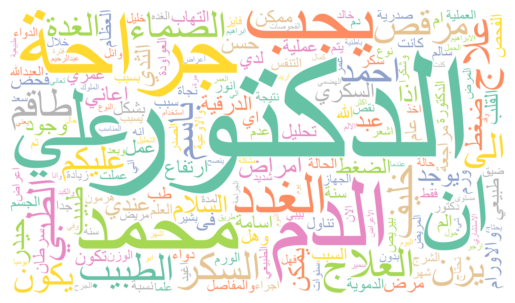

In [27]:
def column_to_wordcloud(df, column, font_file, stopwords):
    text = " ".join(t for t in df[column].dropna())
    wordcloud = WordCloud(font_path=font_file, width=3500, height=2000, random_state=1,
                          background_color='white', colormap='Set2', collocations=False,
                          stopwords=stopwords).generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

column_to_wordcloud(train_data, "combined_text", "/content/drive/MyDrive/NLP_1/ARIAL.ttf", stopwords=combined_stopwords)

<div dir="rtl">
ملاحظات حول الـ Word Cloud:

- نلاحظ أن بيانات التدريب بحاجة إلى عمليات تنظيف أكثر
  
- نلاحظ وجود كلمات ذات تكرار كبير جدا ولا تفيد بشكل مباشر مثل: رقم الدكتور اسئلة
  
- نلاحظ وجود العديد من الـStop Words مثل: رقم - من - في - الدكتور
</div>

## [2.4]

<div dir="rtl">
إيجاد:

● أكثر 15 كلمة مكررة

● 10 من الكلمات الأقل تكراراً في النص

● أكثر 10 ثنائيات كلمات مكررة في النص.

● أكثر 10 ثلاثيات كلمات مكررة في النص.

● Bigram Collocations أكثر 10 ثنائيات كلمات مهمة في النص

● Trigram Collocations أكثر 10 ثلاثيات كلمات مهمة في النص
</div>

In [17]:
def most_common_words(tokenized_text):
    word_counts = Counter(tokenized_text)
    most_common = word_counts.most_common(15)

    return most_common

tokenized_text = train_data['tokenized_question'][0]
print("tokenized_text:" , tokenized_text)

result = most_common_words(tokenized_text)

print("The 15 most common words are:")
for word, count in result:
    print(f"{word} : {count}")

tokenized_text: ['ما', 'هي', 'مميزات', 'و', 'عيوب', 'الدواء', 'جلوكوفانس', ' 500 ', ' 5 ', 'و', 'ايضا', 'الأنسولين', 'مكس', 'تارد', ' 30 ']
The 15 most common words are:
و : 2
ما : 1
هي : 1
مميزات : 1
عيوب : 1
الدواء : 1
جلوكوفانس : 1
 500  : 1
 5  : 1
ايضا : 1
الأنسولين : 1
مكس : 1
تارد : 1
 30  : 1


In [18]:
def least_common_words(tokenized_text):
    word_counts = Counter(tokenized_text)
    most_common = word_counts.most_common()[:-11:-1]

    return most_common

tokenized_text = train_data['tokenized_question'][0]
print("tokenized_text:" , tokenized_text)

result = least_common_words(tokenized_text)

print("The 10 least common words are:")
for word, count in result:
    print(f"{word}: {count}")

tokenized_text: ['ما', 'هي', 'مميزات', 'و', 'عيوب', 'الدواء', 'جلوكوفانس', ' 500 ', ' 5 ', 'و', 'ايضا', 'الأنسولين', 'مكس', 'تارد', ' 30 ']
The 10 least common words are:
 30 : 1
تارد: 1
مكس: 1
الأنسولين: 1
ايضا: 1
 5 : 1
 500 : 1
جلوكوفانس: 1
الدواء: 1
عيوب: 1


<div dir="rtl">
إنشاء تابع يأخذ عدد الكلمات المراد البحث عن تكرارها معاً  
</div>

In [19]:
def most_common_ngrams(tokenized_text, n, m):
    n_grams = ngrams(tokenized_text, n)

    n_gram_counts = Counter(n_grams)

    most_common = n_gram_counts.most_common(m)

    return most_common

In [20]:
tokenized_text = train_data['tokenized_answer'][1]
print("tokenized_text:" , tokenized_text)

result = most_common_ngrams(tokenized_text, 2, 10)

print("The 10 most common 2-grams are:")
for ngram, count in result:
    print(f"{' '.join(ngram)}: {count}")

tokenized_text: ['نعم.', 'يجب', 'تخفيض', 'الجرعة،', 'الا', 'اذا', 'كان', 'سبب', 'استئصال', 'الغدة', 'هو', 'سرطان', 'الغدة', ' 0 ', ' 2017-02-13 ', 'رقم:رقم:رقم', 'الدكتور', 'باسم', 'مرقص', 'رابط', 'الدكتور', 'باسم', 'مرقص', 'جراحة', 'عامة']
The 10 most common 2-grams are:
الدكتور باسم: 2
باسم مرقص: 2
نعم. يجب: 1
يجب تخفيض: 1
تخفيض الجرعة،: 1
الجرعة، الا: 1
الا اذا: 1
اذا كان: 1
كان سبب: 1
سبب استئصال: 1


In [21]:
tokenized_text = train_data['tokenized_answer'][1]
print("tokenized_text:" , tokenized_text)

result = most_common_ngrams(tokenized_text, 3, 10)

print("The 10 most common 2-grams are:")
for ngram, count in result:
    print(f"{' '.join(ngram)}: {count}")

tokenized_text: ['نعم.', 'يجب', 'تخفيض', 'الجرعة،', 'الا', 'اذا', 'كان', 'سبب', 'استئصال', 'الغدة', 'هو', 'سرطان', 'الغدة', ' 0 ', ' 2017-02-13 ', 'رقم:رقم:رقم', 'الدكتور', 'باسم', 'مرقص', 'رابط', 'الدكتور', 'باسم', 'مرقص', 'جراحة', 'عامة']
The 10 most common 2-grams are:
الدكتور باسم مرقص: 2
نعم. يجب تخفيض: 1
يجب تخفيض الجرعة،: 1
تخفيض الجرعة، الا: 1
الجرعة، الا اذا: 1
الا اذا كان: 1
اذا كان سبب: 1
كان سبب استئصال: 1
سبب استئصال الغدة: 1
استئصال الغدة هو: 1


<div dir="rtl">
استخدام ال Bigram
</div>

In [22]:
tokenized_text = train_data['tokenized_answer'][0]
print("tokenized_text:" , tokenized_text)

finder = BigramCollocationFinder.from_words(tokenized_text)

finder.apply_freq_filter(2)

bigram_measures = BigramAssocMeasures()
collocations = finder.nbest(bigram_measures.pmi, 3)

print("Top 3 bigram collocations:")
for collocation in collocations:
    print(' '.join(collocation))

tokenized_text: ['لكل', 'علاج', 'ايجابيته', 'وسلبياته', 'والتي', 'تعتمد', 'على', 'حالة', 'المريض', 'فما', 'قد', 'يناسب', 'احدهم', 'قد', 'لا', 'يناسب', 'الاخر', 'وهذا', 'يحدده', 'الطبيب', 'خلال', 'مراجعة', 'المريض', 'له', ' 1 ', ' 2015-01-04 ', 'رقم:رقم:رقم', 'الدكتور', 'يزن', 'علي', 'خليف', 'رابط', 'الدكتور', 'يزن', 'علي', 'خليف', 'الغدد', 'الصماء']
Top 3 bigram collocations:
الدكتور يزن
علي خليف
يزن علي


<div dir="rtl">
استخدام ال Trigram
</div>

In [23]:
tokenized_text = train_data['tokenized_answer'][0]
print("tokenized_text:" , tokenized_text)

finder = TrigramCollocationFinder.from_words(tokenized_text)

finder.apply_freq_filter(2)

trigram_measures = TrigramAssocMeasures()
collocations = finder.nbest(trigram_measures.pmi, 3)

print("Top 3 trigram collocations:")
for collocation in collocations:
    print(' '.join(collocation))

tokenized_text: ['لكل', 'علاج', 'ايجابيته', 'وسلبياته', 'والتي', 'تعتمد', 'على', 'حالة', 'المريض', 'فما', 'قد', 'يناسب', 'احدهم', 'قد', 'لا', 'يناسب', 'الاخر', 'وهذا', 'يحدده', 'الطبيب', 'خلال', 'مراجعة', 'المريض', 'له', ' 1 ', ' 2015-01-04 ', 'رقم:رقم:رقم', 'الدكتور', 'يزن', 'علي', 'خليف', 'رابط', 'الدكتور', 'يزن', 'علي', 'خليف', 'الغدد', 'الصماء']
Top 3 trigram collocations:
الدكتور يزن علي
يزن علي خليف


<div dir="rtl">
جمع كل التوابع بتابع واحد وسوف نقوم بتطبيقه على كل الData وعلى كل أختصاص على حدى
</div>

In [24]:
def get_details(tokenized_text):

  result = most_common_words(tokenized_text)

  print("The 15 most common words are:")
  for word, count in result:
      print(f"{word} : {count}")
  print("\n")

  result = least_common_words(tokenized_text)

  print("The 10 least common words are:")
  for word, count in result:
      print(f"{word}: {count}")

  print("\n")
  result = most_common_ngrams(tokenized_text, 2, 10)

  print("The 10 most common 2-grams are:")
  for ngram, count in result:
      print(f"{' '.join(ngram)}: {count}")

  print("\n")
  result = most_common_ngrams(tokenized_text, 3, 10)

  print("The 10 most common 2-grams are:")
  for ngram, count in result:
      print(f"{' '.join(ngram)}: {count}")

  print("\n")
  finder = BigramCollocationFinder.from_words(tokenized_text)

  finder.apply_freq_filter(2)

  bigram_measures = BigramAssocMeasures()
  collocations = finder.nbest(bigram_measures.pmi, 3)

  print("Top 3 bigram collocations:")
  for collocation in collocations:
      print(' '.join(collocation))

  print("\n")
  finder = TrigramCollocationFinder.from_words(tokenized_text)

  finder.apply_freq_filter(2)

  trigram_measures = TrigramAssocMeasures()
  collocations = finder.nbest(trigram_measures.pmi, 3)

  print("Top 3 trigram collocations:")
  for collocation in collocations:
      print(' '.join(collocation))

In [25]:
tokenized_text = train_data['tokenized_answer'][1]
print("tokenized_text:" , tokenized_text)

get_details(tokenized_text)

tokenized_text: ['نعم.', 'يجب', 'تخفيض', 'الجرعة،', 'الا', 'اذا', 'كان', 'سبب', 'استئصال', 'الغدة', 'هو', 'سرطان', 'الغدة', ' 0 ', ' 2017-02-13 ', 'رقم:رقم:رقم', 'الدكتور', 'باسم', 'مرقص', 'رابط', 'الدكتور', 'باسم', 'مرقص', 'جراحة', 'عامة']
The 15 most common words are:
الغدة : 2
الدكتور : 2
باسم : 2
مرقص : 2
نعم. : 1
يجب : 1
تخفيض : 1
الجرعة، : 1
الا : 1
اذا : 1
كان : 1
سبب : 1
استئصال : 1
هو : 1
سرطان : 1


The 10 least common words are:
عامة: 1
جراحة: 1
رابط: 1
رقم:رقم:رقم: 1
 2017-02-13 : 1
 0 : 1
سرطان: 1
هو: 1
استئصال: 1
سبب: 1


The 10 most common 2-grams are:
الدكتور باسم: 2
باسم مرقص: 2
نعم. يجب: 1
يجب تخفيض: 1
تخفيض الجرعة،: 1
الجرعة، الا: 1
الا اذا: 1
اذا كان: 1
كان سبب: 1
سبب استئصال: 1


The 10 most common 2-grams are:
الدكتور باسم مرقص: 2
نعم. يجب تخفيض: 1
يجب تخفيض الجرعة،: 1
تخفيض الجرعة، الا: 1
الجرعة، الا اذا: 1
الا اذا كان: 1
اذا كان سبب: 1
كان سبب استئصال: 1
سبب استئصال الغدة: 1
استئصال الغدة هو: 1


Top 3 bigram collocations:
الدكتور باسم
باسم مرقص


Top 3 trigram 

In [26]:
get_details(total_tokens)

The 15 most common words are:
الدكتور : 44608
من : 42416
في : 37453
رقم:رقم:رقم : 32596
رابط : 32592
و : 22006
 0  : 18986
على : 15880
هل : 13741
لا : 11765
الدم : 11367
جراحة : 11248
د. : 10808
محمد : 10775
مع : 10079


The 10 least common words are:
قسوى,: 1
كافياً.: 1
تقرر.: 1
إجبار: 1
إتباعه.: 1
التدليك،: 1
ومسكنة: 1
المسكنة،: 1
والمتعبة.: 1
العظمية،: 1


The 10 most common 2-grams are:
رقم:رقم:رقم الدكتور: 21877
رابط الدكتور: 21874
جراحة عامة: 8317
طاقم الطبي: 5603
الغدد الصماء: 5486
الدكتور باسم: 5419
باسم مرقص: 5416
رقم:رقم:رقم د.: 5380
رابط د.: 5378
الدكتور يزن: 5298


The 10 most common 2-grams are:
الدكتور باسم مرقص: 5414
الدكتور يزن علي: 5296
يزن علي خليف: 5296
امراض الدم والاورام: 3106
رقم:رقم:رقم طاقم الطبي: 2800
طاقم الطبي رابط: 2798
الطبي رابط طاقم: 2798
رابط طاقم الطبي: 2798
رقم:رقم:رقم الدكتور باسم: 2709
رابط الدكتور باسم: 2709


Top 3 bigram collocations:
 660  Mobile
"ذاتي العلة"
(autosomal recessive)


Top 3 trigram collocations:
(دايموند واتينق بيلز)
.التلوّث البيئ

<div dir="rtl">
إيجاد الإختصاصات المختلفة
</div>

In [27]:
def get_specialization(name):
  filtered_rows = train_data[train_data['label'] == name]
  total_tokens = []

  for x in filtered_rows['tokenized_question']:
      total_tokens += x

  for x in filtered_rows['tokenized_answer']:
      total_tokens += x

  get_details(total_tokens)

In [28]:
specialty_mapping =["جراحة عامة","أمراض الغدد الصماء","أمراض الدم","ارتفاع ضغط الدم","أمراض الجهاز التنفسي","جراحة العظام","مرض السكري","الأورام الخبيثة والحميدة"]

for speacial in specialty_mapping:
  get_specialization(speacial)
  print("\n")
  print("________________________________________________________________________________________")
  print("\n")

The 15 most common words are:
الدكتور : 8282
من : 7808
رقم:رقم:رقم : 6307
رابط : 6306
في : 6229
جراحة : 4777
و : 4326
عامة : 4307
 0  : 4057
د. : 2788
على : 2604
هل : 2493
لا : 2196
او : 2164
محمد : 2070


The 10 least common words are:
 2023-08-02 : 1
بافراازات: 1
لوتتسبب: 1
تجاهلها: 1
 2016-02-01 : 1
رؤيته: 1
بلاذما: 1
 2021-12-15 : 1
وصبغة: 1
الطبية...: 1


The 10 most common 2-grams are:
جراحة عامة: 4284
رقم:رقم:رقم الدكتور: 4017
رابط الدكتور: 4016
الدكتور اسامة: 1628
اسامة العبدالله: 1614
رقم:رقم:رقم د.: 1387
رابط د.: 1386
السلام عليكم: 807
العبدالله جراحة: 807
العبدالله رابط: 806


The 10 most common 2-grams are:
الدكتور اسامة العبدالله: 1614
رقم:رقم:رقم الدكتور اسامة: 814
رابط الدكتور اسامة: 813
اسامة العبدالله جراحة: 807
العبدالله جراحة عامة: 807
اسامة العبدالله رابط: 806
العبدالله رابط الدكتور: 806
الدكتور باسم مرقص: 732
الدكتور حسن ابراهيم: 648
حسن ابراهيم خليفة: 648


Top 3 bigram collocations:
(غرزة واحدة)
DHEA. FSH.
Factors Increasing


Top 3 trigram collocations:
Laser pi

<div dir="rtl">
ملاحظات:

- يوجود كلمات تتكرر في كل الاختصاصات بشكل كبير وواضح وبالتالي لا تفيد في عمليات التدريب والأفضل ازالتها مع ال Stop Words
  
- يوجد كلمات ذات تكرار نادر جدا واغلبها هو من الروابط

- الأرقام أيضاً هي من الأمور ذات الدلالة الضعيفة خاصة بعد تجميع كل الأرقام تحت التوكين الموحد "رقم" فلا دلالة واضحة له
  
- اسماء الأطباء مع لقب الدكتور هي من أكثر الثنائيات والثلاثيات تكراراً

- اسم الأختصاص هو من أكثر الثنائيات والثلاثيات تكراراً

- يوجد اسماء دكاترة بالانكليزية
</div>

## [2.5]

<div dir="rtl">
رسم ال Histograms
</div>

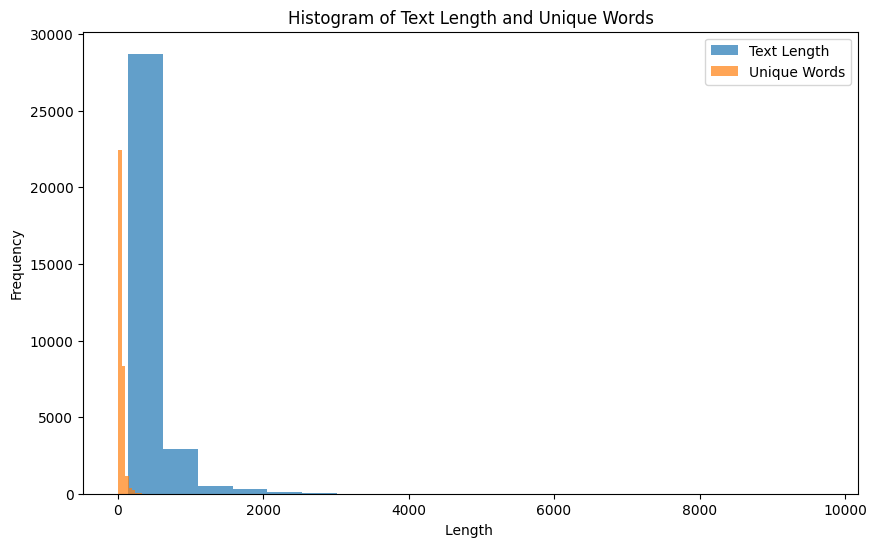

In [40]:
def unique_word_count(text):
    return len(set(text.split()))

train_data['combined_text'] = train_data['question'] + ' ' + train_data['answer']
train_data['text_length'] = train_data['combined_text'].apply(len)
train_data['unique_words'] = train_data['combined_text'].apply(unique_word_count)

plt.figure(figsize=(10, 6))
plt.hist(train_data['text_length'], bins=20, alpha=0.7, label='Text Length')
plt.hist(train_data['unique_words'], bins=20, alpha=0.7, label='Unique Words')
plt.xlabel('Length ')
plt.ylabel('Frequency')
plt.title('Histogram of Text Length and Unique Words')
plt.legend()
plt.show()

<div dir="rtl">
ملاحظات:

يبدو أن هناك عددًا كبيرًا من الإدخالات بطول نص قصير وعدد قليل من الكلمات الفريدة، مما يشير إلى تكرار عالٍ للنصوص القصيرة ذات المفردات المحدودة. مقياس المحور X يشير إلى أن مجموعة البيانات تشمل نصوصًا تصل إلى اكثر من 2500 حرف، لكن مثل هذه النصوص نادرة جدًا.

الميل نحو عدد أقل من الكلمات الفريدة يوحي بأن النصوص قد تستخدم مفردات متخصصة، وهو أمر شائع في النصوص المتعلقة بمجالات محددة مثل الطب.


</div>

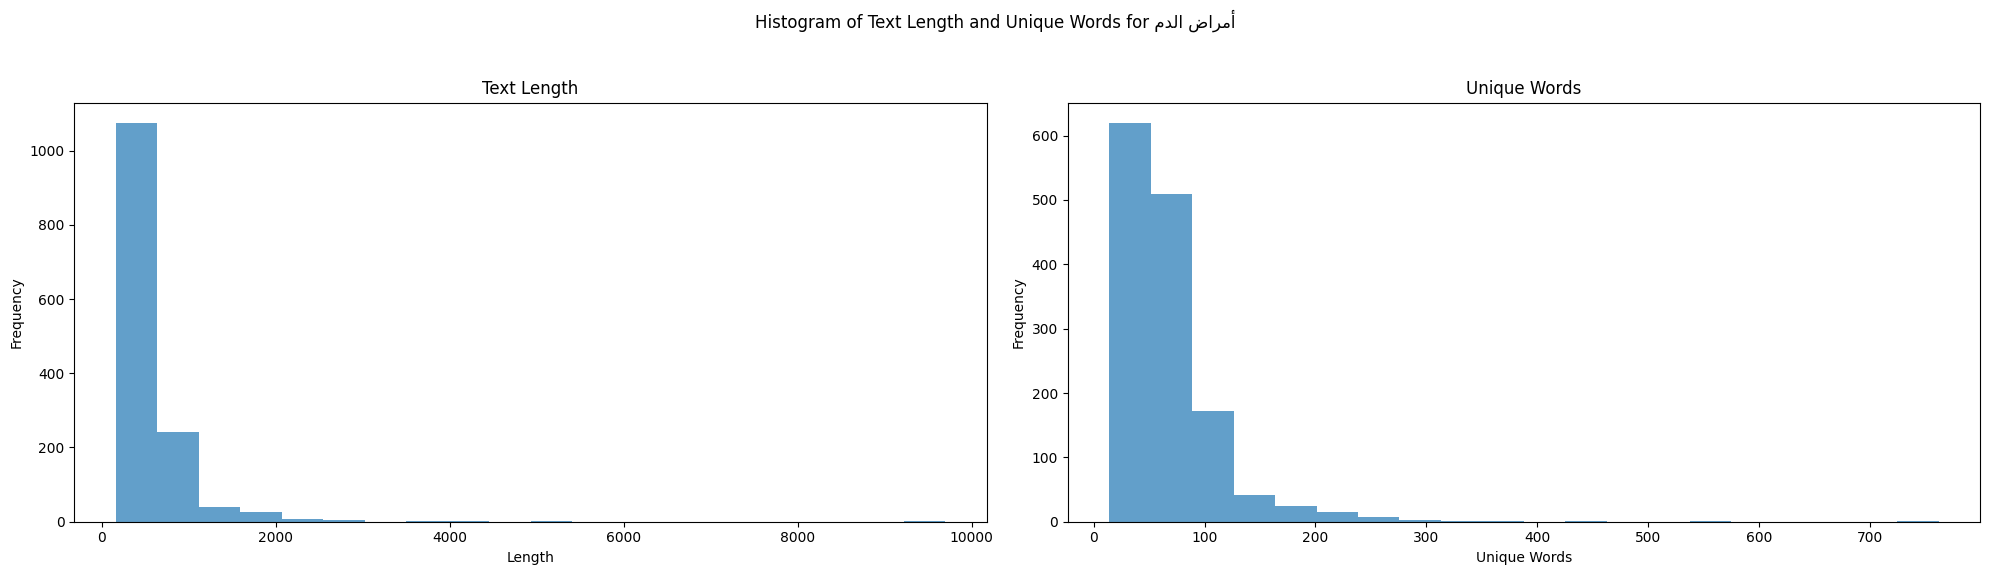

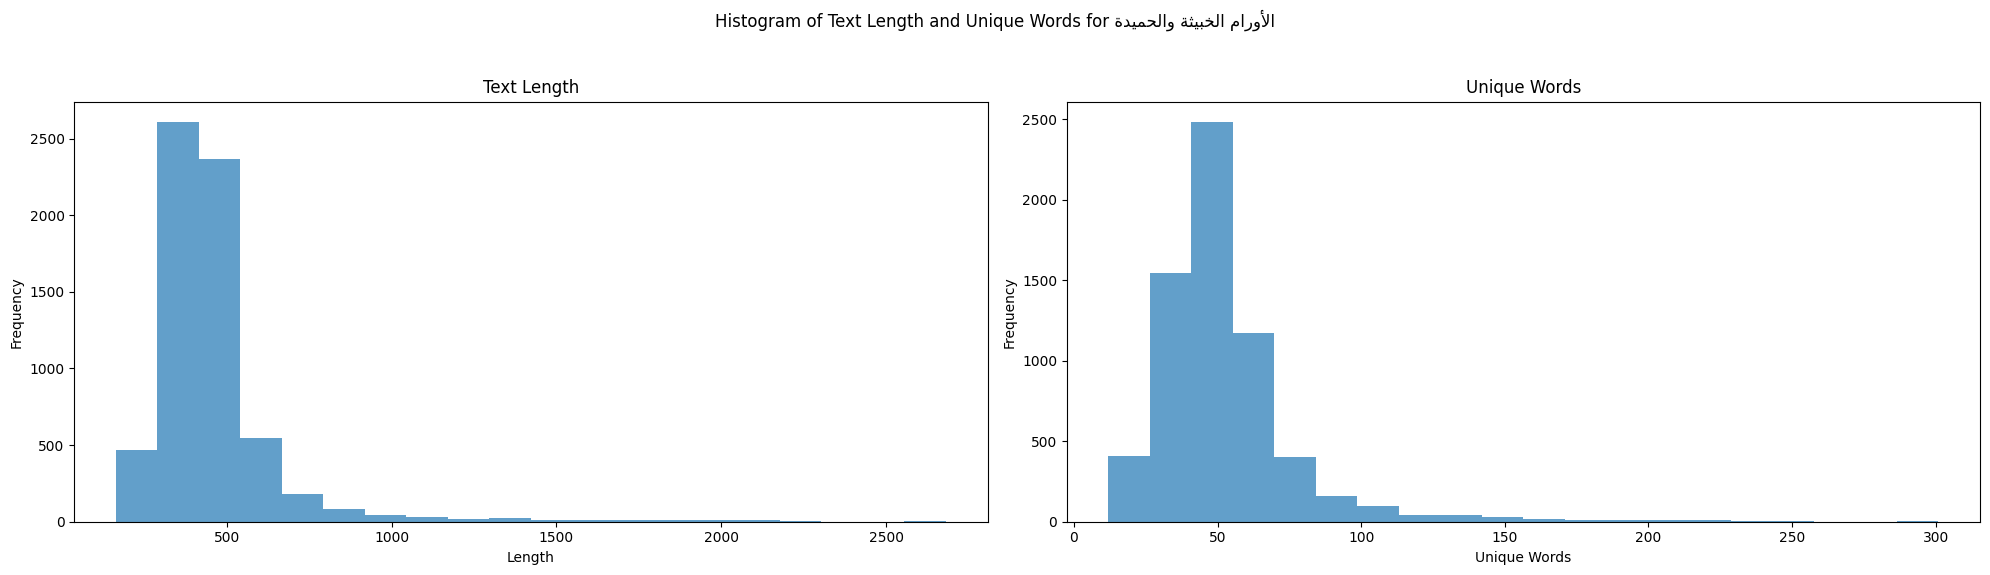

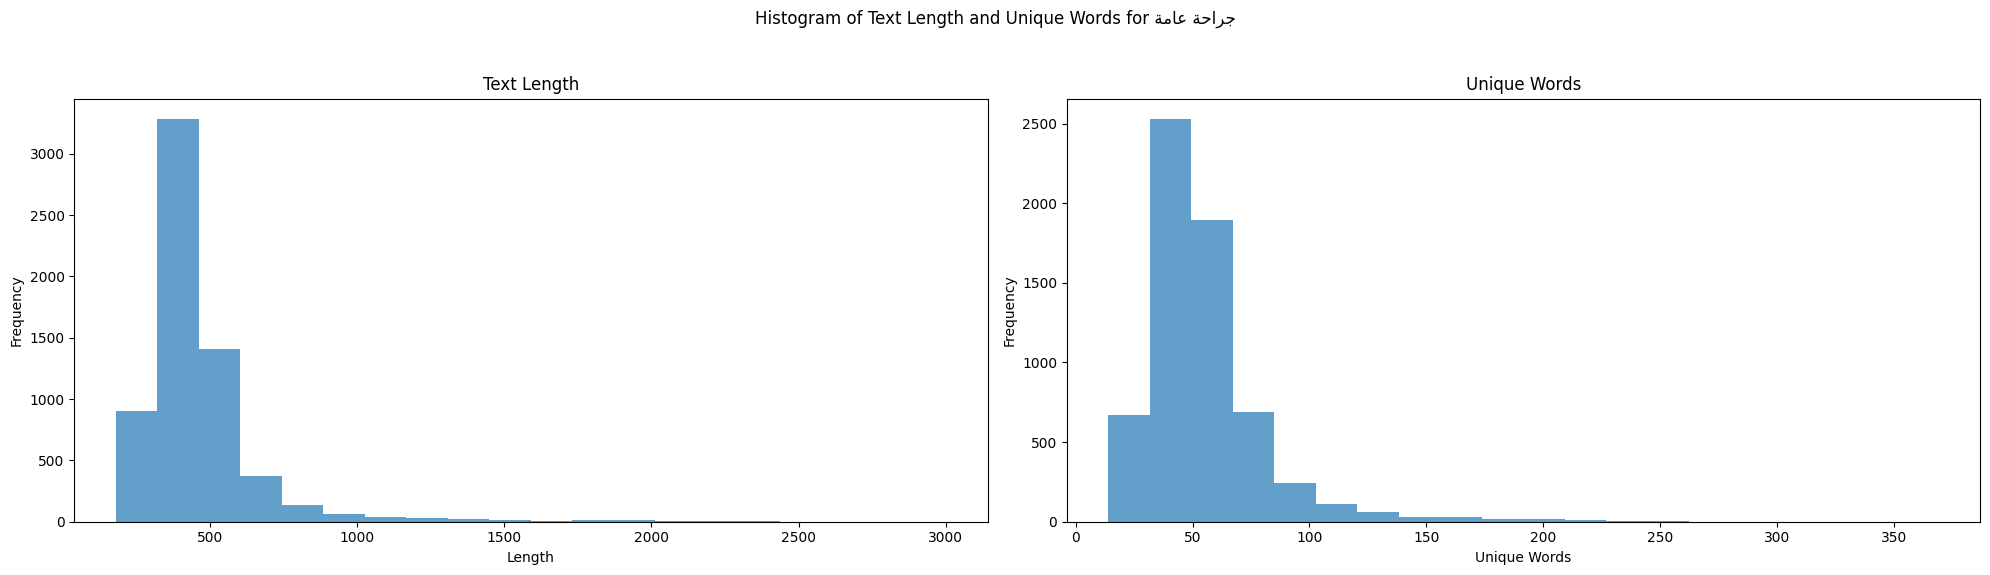

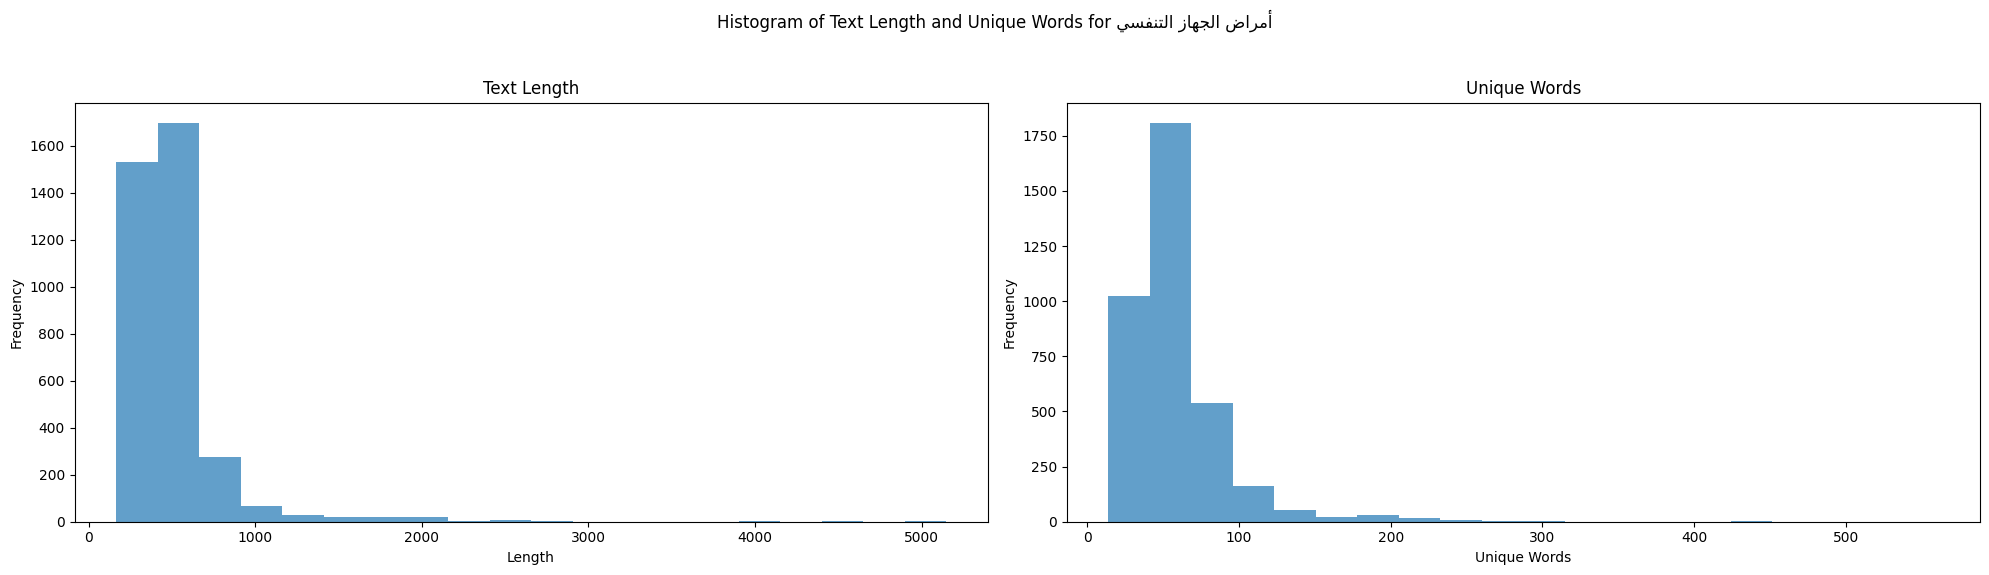

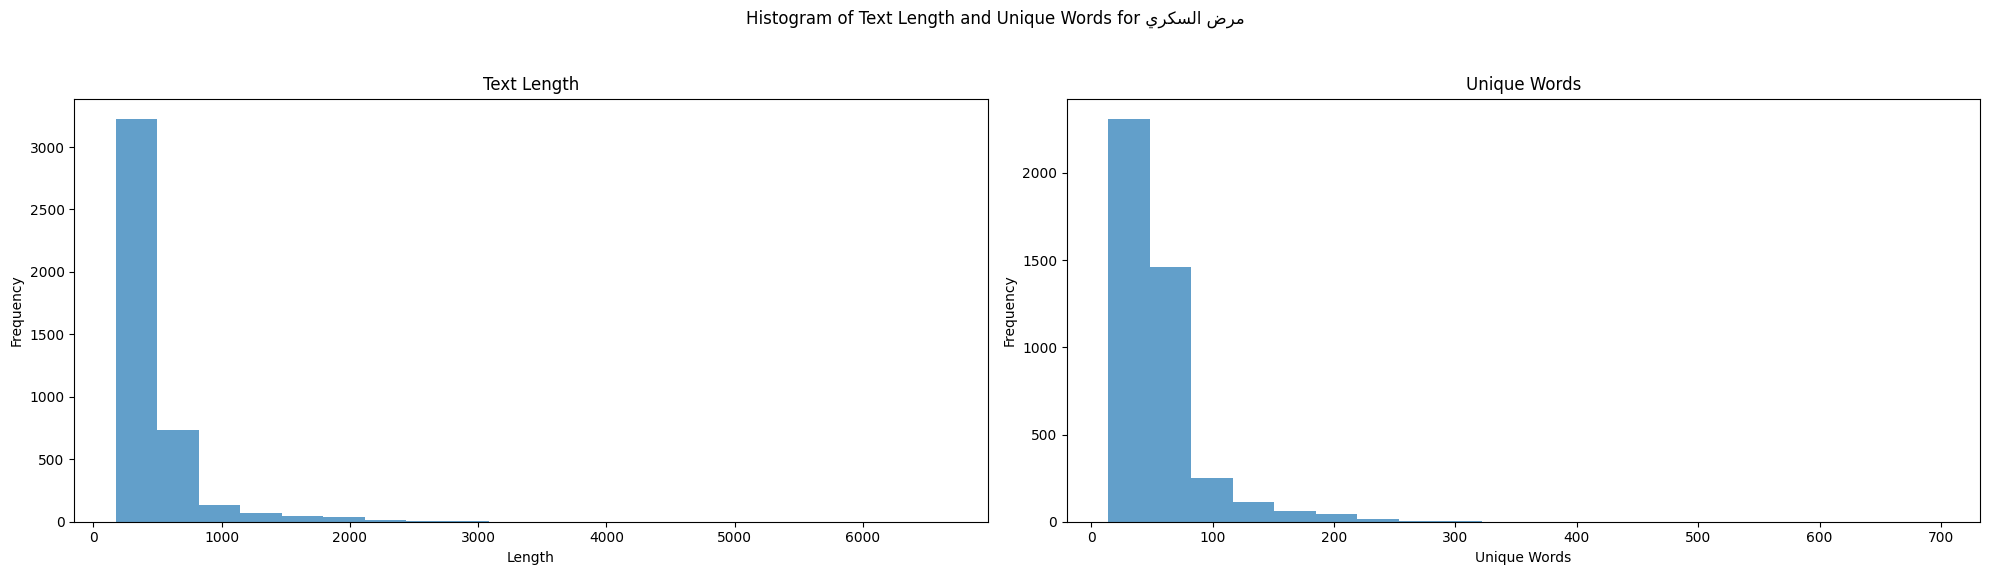

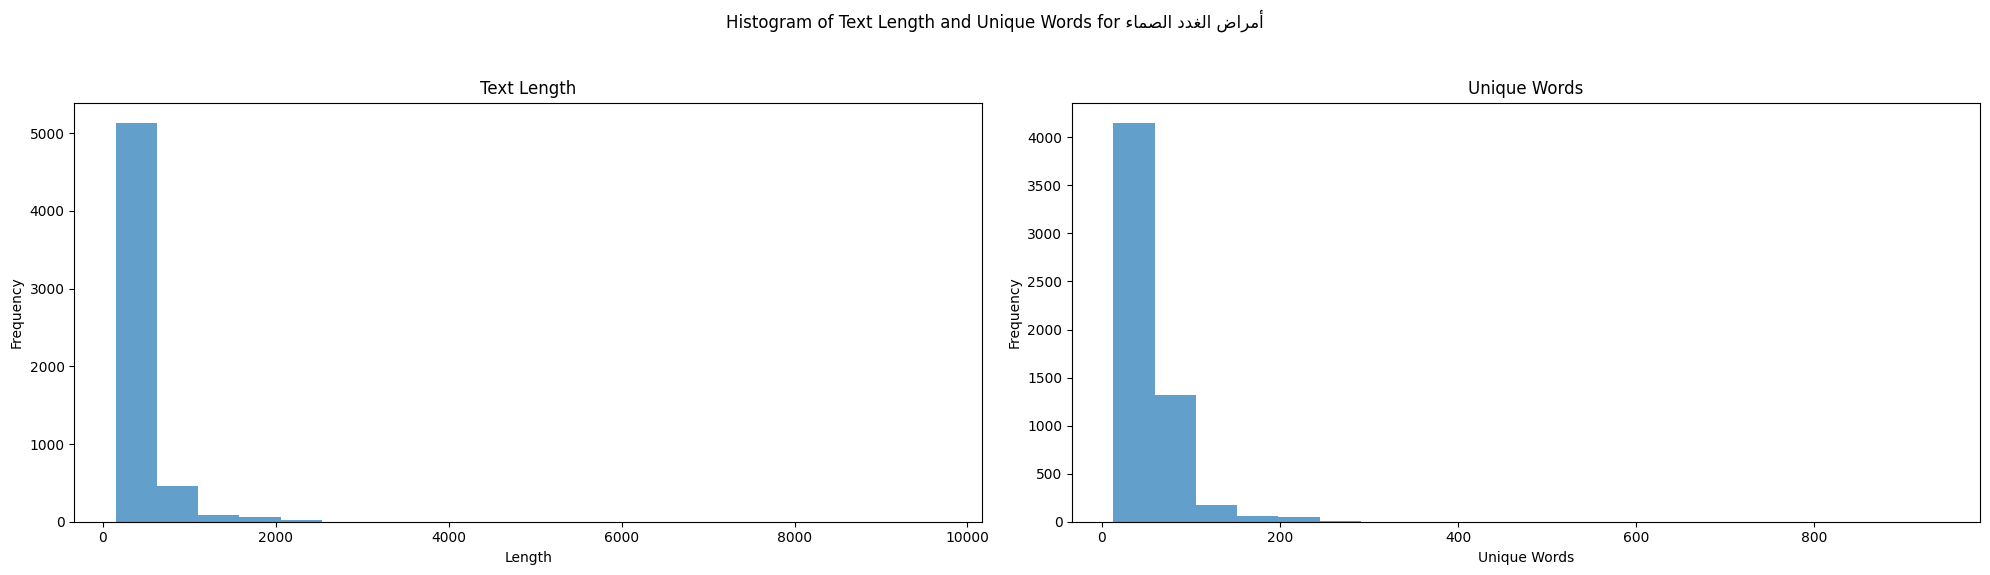

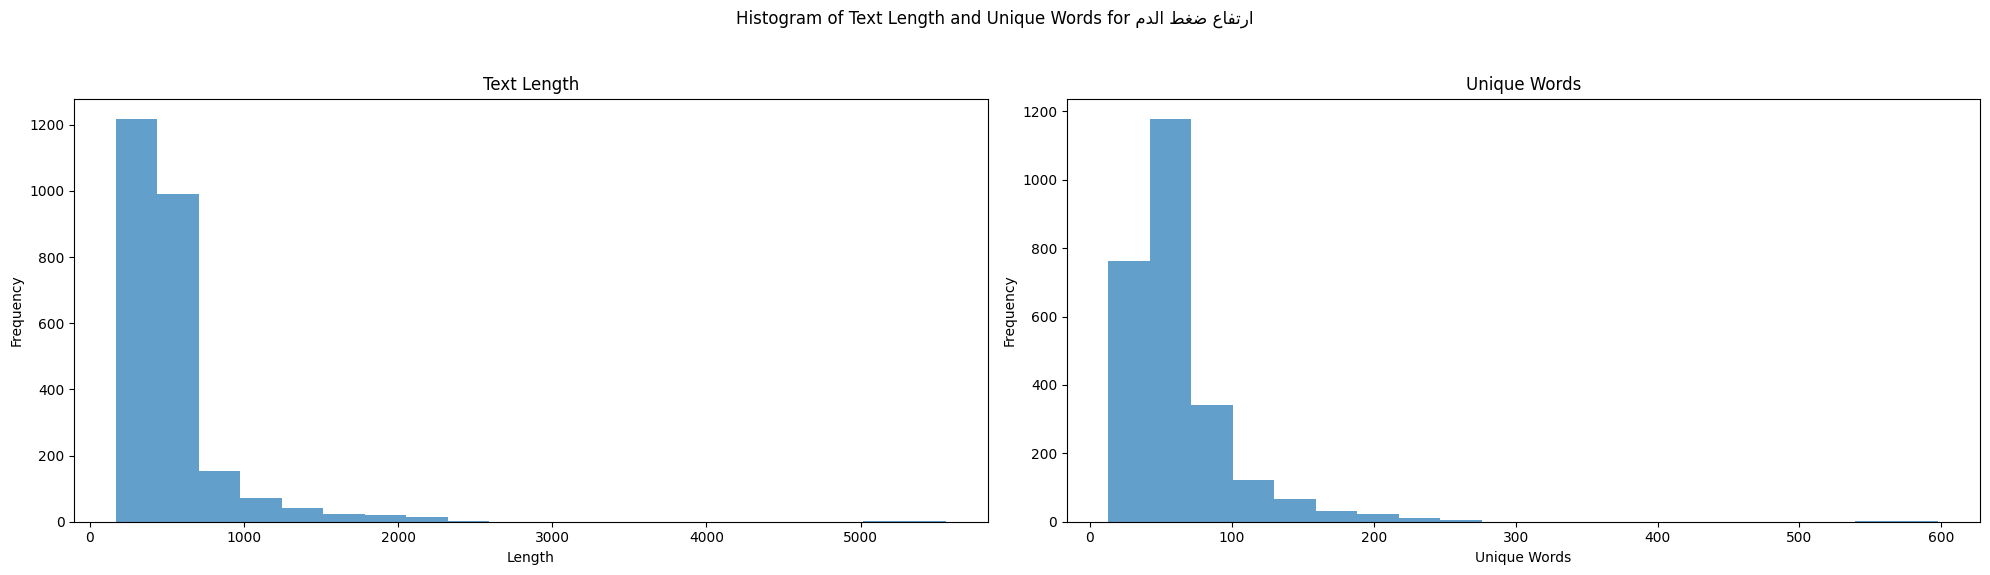

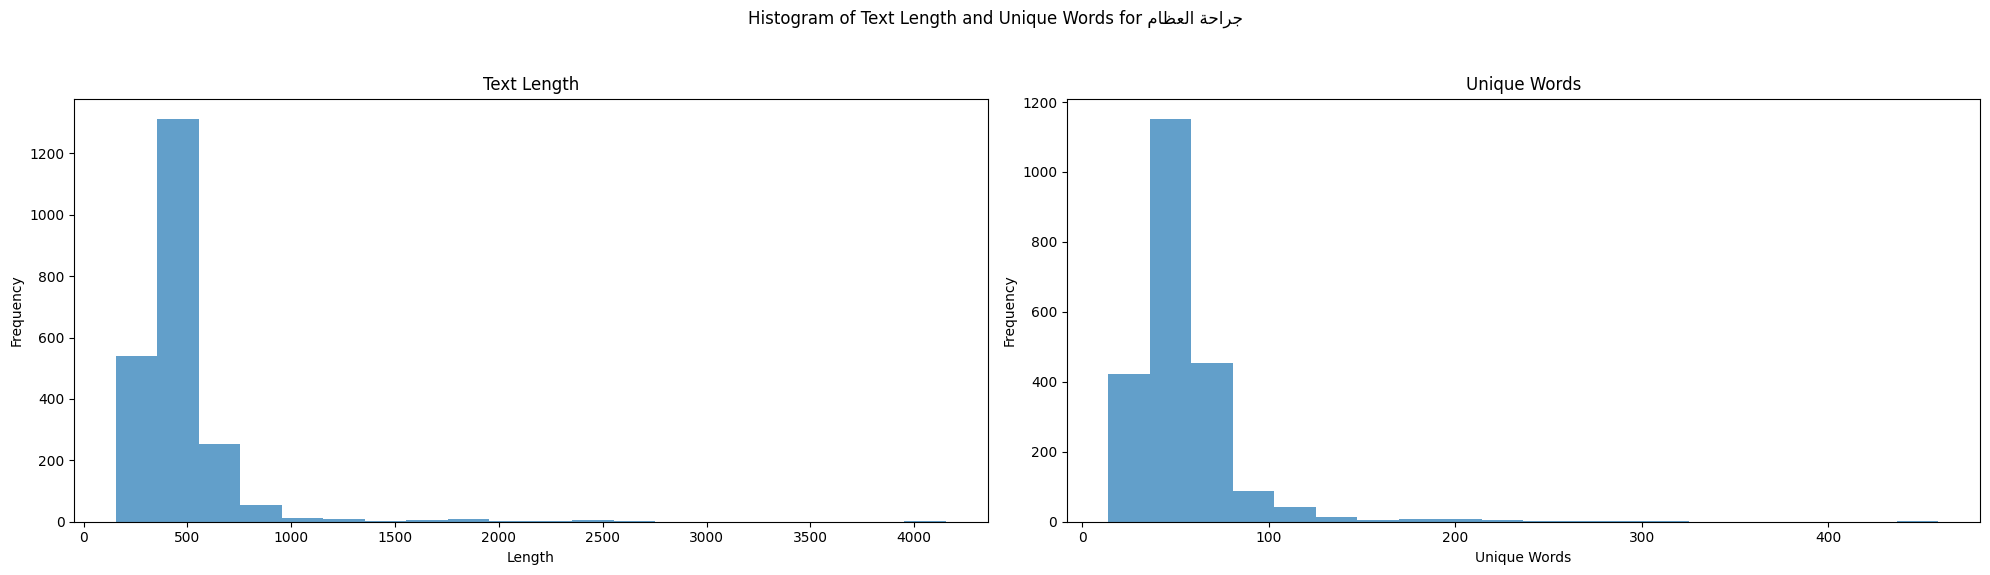

In [41]:
specialties = train_data['label'].unique()
for specialty in specialties:
    subset = train_data[train_data['label'] == specialty]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    ax1.hist(subset['text_length'], bins=20, alpha=0.7)
    ax1.set_title('Text Length')
    ax1.set_xlabel('Length')
    ax1.set_ylabel('Frequency')

    ax2.hist(subset['unique_words'], bins=20, alpha=0.7)
    ax2.set_title('Unique Words')
    ax2.set_xlabel('Unique Words')
    ax2.set_ylabel('Frequency')

    reshaped_text = arabic_reshaper.reshape(specialty)
    bidi_text = get_display(reshaped_text)

    plt.suptitle(f'Histogram of Text Length and Unique Words for {bidi_text}')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

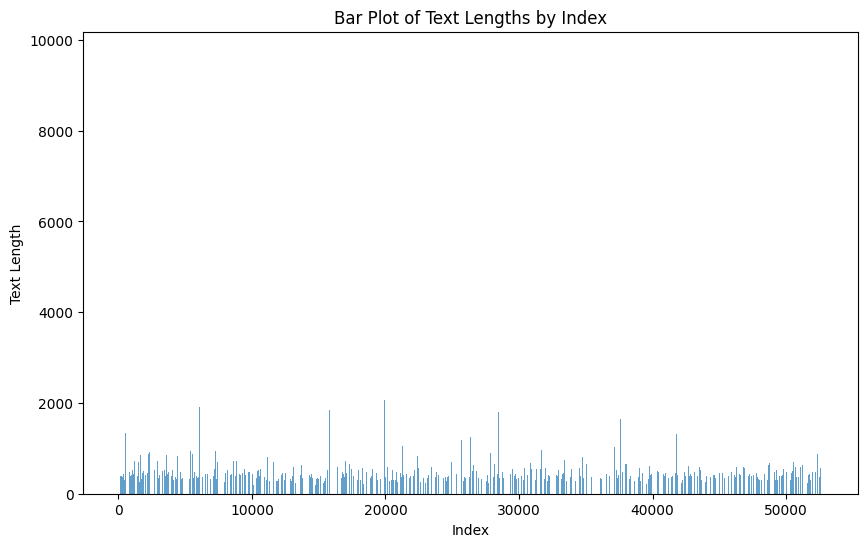

In [42]:
def combined_text_length(row):
    combined_text = row['question'] + ' ' + row['answer']
    return len(combined_text)

train_data['text_length'] = train_data.apply(combined_text_length, axis=1)

plt.figure(figsize=(10, 6))
plt.bar(train_data.index, train_data['text_length'], alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Text Length')
plt.title('Bar Plot of Text Lengths by Index')
plt.show()


# Question [3]: Text Cleaning and Normalization

<div dir="rtl">
سنقوم بمجموعة من العمليات لتجهيز البيانات لعملية التصنيف، بحيث نوحد طريقة الكتابة فيها قدر الإمكان
</div>

## [3.1]


إزالة الروابط من النصوص

In [29]:
def remove_links(text):
    url_pattern = r'https?://\S+|www\.\S+|/\S+-\S+/|\S+-\S+-\S+'
    text = re.sub(url_pattern, '', text)
    return text

print("Cleaned Questions:")
for text in train_data['question'].head(5):
    cleaned_text = remove_links(text)
    print(cleaned_text)

print("\nCleaned Answers:")
for text in train_data['answer'].head(5):
    cleaned_text = remove_links(text)
    print(cleaned_text)

Cleaned Questions:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30 

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة 

حلول منزلية لأعراض ارتفاع ضغط الدم 

عملت عملية دوالي الساقين قسطرة الليزر من شهر وعندي الم من اسفل ساق الى اعلى ساق و برودة اطراف القدم وحرقان وخز و امكان يابسة وحكة و طيبة عليا هل هدا طبيعي احس في سكين تقطع 

ما حقيقة ان تمرين العضلة النعلية يخفض السكر بالدم؟؟ 

Cleaned Answers:


لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
 20:08:51


الدكتور يزن علي خليف









الدكتور يزن علي خليف 


الغدد الصماء 





نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
 06:34:19


الدكتور باسم مرقص









الدكتور باسم مرقص 


جراحة عامة 





يفضل عدم الاستغناء عن العلاج الدوائي لمرضى الضغط لكن يعد النظام الغذائي و الحركي اليومي للمريض جزء مهم و أساسي في الحفاظ على ض

In [30]:
train_data['answer'].head(5)

0                                                                                                                                                                                                                                                                                                                                                                                               \n\nلكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له\n1\n2015-01-04 20:08:51\n\n\nالدكتور يزن علي خليف\n\n\n\n\n\n\n\n/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157\n\nالدكتور يزن علي خليف \n\n\nالغدد الصماء \n\n\n
1                                                                                                                                                                                                                                                                                        

## [3.2]

حذف أسماء الأطباء مع اللقب واختصاره

In [31]:
def short_doctor_names(text):
    doctor_name_pattern = r'الدكتور\s+(\w+)(?:\s+\w+){0,2}'

    def short(match):
        return f'د.{match.group(1)}'

    return re.sub(doctor_name_pattern, short, text)


print("\nCleaned Answers:")
for text in train_data['answer'].head(5):
    cleaned_text = short_doctor_names(text)
    print(cleaned_text)



Cleaned Answers:


لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


د.يزن







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

د.يزن 


الغدد الصماء 





نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


د.باسم







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

د.باسم عامة 





يفضل عدم الاستغناء عن العلاج الدوائي لمرضى الضغط لكن يعد النظام الغذائي و الحركي اليومي للمريض جزء مهم و أساسي في الحفاظ على ضغط المريض ضمن الحدود الطبيعية.
ينصح ممارسة دورية للرياضة و المشي و محاولة تخفيف الوزن، التخفيف من المنبهات بأنواعها و محاولة الإقلاع عن التدخين.
تناول الأطعمة الغنية بالبوتاسيوم كالموز و تجنب الأطعمة التي تحتوي على أملاح لتأثيرها المباشر على الضغط، و تناول المغذيات مثل مستخلص الثوم و زيوت السمك.
تجنّب التوتر و المحافظة على نظام يومي هادئ و المتابعة الدوري

## [3.3]

حذف اختصاص الطبيب الموجود بعد اسمه من الإجابات

In [32]:
def remove_doctor_specialization(text):
    last_line_pattern = r'\n[^\n]+$'
    return re.sub(last_line_pattern, '', text)


print("\nCleaned Answers:")
for text in train_data['answer'].head(5):
    cleaned_text = remove_doctor_specialization(text)
    print(cleaned_text)



Cleaned Answers:


لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 





نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 


جراحة عامة 





يفضل عدم الاستغناء عن العلاج الدوائي لمرضى الضغط لكن يعد النظام الغذائي و الحركي اليومي للمريض جزء مهم و أساسي في الحفاظ على ضغط المريض ضمن الحدود الطبيعية.
ينصح ممارسة دورية للرياضة و المشي و محاولة تخفيف الوزن، التخفيف من المنبهات بأنواعها و محاولة الإقلاع عن التدخين.
تناول الأطعمة الغنية بالبوتاسيوم كالموز و تجنب الأطعمة التي تحتوي على أملاح لتأثيرها المباشر على الضغط، و تناول المغذيات مثل مستخلص الثوم و زيوت السمك.

## [3.4]

حذف المحارف المكررة من النص

In [33]:
def remove_duplicated_letters(text):
    duplicate_pattern = r'(.)\1{2,}'

    return re.sub(duplicate_pattern, r'\1\1', text)

print("Cleaned Texts:")
for text in train_data['answer'].head(5):
    cleaned_text = remove_duplicated_letters(text)
    print(cleaned_text)

Cleaned Texts:


لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 





نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 


جراحة عامة 





يفضل عدم الاستغناء عن العلاج الدوائي لمرضى الضغط لكن يعد النظام الغذائي و الحركي اليومي للمريض جزء مهم و أساسي في الحفاظ على ضغط المريض ضمن الحدود الطبيعية.
ينصح ممارسة دورية للرياضة و المشي و محاولة تخفيف الوزن، التخفيف من المنبهات بأنواعها و محاولة الإقلاع عن التدخين.
تناول الأطعمة الغنية بالبوتاسيوم كالموز و تجنب الأطعمة التي تحتوي على أملاح لتأثيرها المباشر على الضغط، و تناول المغذيات مثل مستخلص الثوم و زيوت السمك.
تج

## [3.5]

التعامل مع الأرقام

### [3.5.1]

توحيد رموز كتابة الأرقام للإنكليزية

In [34]:
def standardize_numbers(text):
    numerals_map = {
        '٠': '0', '١': '1', '٢': '2', '٣': '3', '٤': '4', '٥': '5', '٦': '6', '٧': '7', '٨': '8', '٩': '9'
    }

    def replace_numerals(match):
        return numerals_map[match.group(0)]

    pattern = r'[٠١٢٣٤٥٦٧٨٩]'

    return re.sub(pattern, replace_numerals, text)

print("Cleaned Texts:")
for text in train_data['question'].head(40):
    cleaned_text = standardize_numbers(text)
    print(cleaned_text)


Cleaned Texts:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30 

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة 

حلول منزلية لأعراض ارتفاع ضغط الدم 

عملت عملية دوالي الساقين قسطرة الليزر من شهر وعندي الم من اسفل ساق الى اعلى ساق و برودة اطراف القدم وحرقان وخز و امكان يابسة وحكة و طيبة عليا هل هدا طبيعي احس في سكين تقطع 

ما حقيقة ان تمرين العضلة النعلية يخفض السكر بالدم؟؟ 

السلام عليكم انا شاب 25 سنه وظهرلي زي كوره من فتحت الشرج وهي تولمني الان ارجو حل فوري لاني مش مستحمل الالم وكمان عامل عمليه حاليا في كتفي مركب وديما قاعد فعاوز حل سريع وشكرا 

ورمه قبل ثلاث سنوات كان حجمها 3 انش ولاكن فجاة من شهر زاد حجمها فجاه ومعها عوار حول الورمه قمت بعمل تحليل غدة وهي سليمة ؟
وعندي صورة لتقرير المقطعية 

عملت عن البواسير منذ شهر وعانيت خلال التبرز كثيرا حدث لي امساك كيف اتخلص منه؟وخرج من سائل اظنه قيح هل هذا طبيعي؟وهل امشي كثيرا أم قليلا؟ ارجوالرد لاني لا استطيع الوصول للجراح 

بالله عليكم

### [3.5.2]

توحيد كتابة الأرقام باستبدالها جميعها برمز ما

In [35]:
def replace_numbers_with_symbol(text, symbol):
    number_pattern = r'\d+'

    return re.sub(number_pattern, symbol, text)


symbol_to_replace = "#"

print("Texts with Numbers Replaced by Symbol:")
for text in train_data['question'].head(5):
    standardized_text = replace_numbers_with_symbol(text, symbol_to_replace)
    print(standardized_text)


Texts with Numbers Replaced by Symbol:

ما هي مميزات و عيوب الدواء جلوكوفانس # # و ايضا الأنسولين مكس تارد # 

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT#=#TT#=#.#TSH=.# هل مطلوب تعديل الجرعة 

حلول منزلية لأعراض ارتفاع ضغط الدم 

عملت عملية دوالي الساقين قسطرة الليزر من شهر وعندي الم من اسفل ساق الى اعلى ساق و برودة اطراف القدم وحرقان وخز و امكان يابسة وحكة و طيبة عليا هل هدا طبيعي احس في سكين تقطع 

ما حقيقة ان تمرين العضلة النعلية يخفض السكر بالدم؟؟ 


### [3.5.3]

حذف جميع الأرقام

In [36]:
def remove_all_numbers(text):
    number_pattern = r'\d+|[٠١٢٣٤٥٦٧٨٩]+'

    return re.sub(number_pattern, '', text)

print("Texts with Numbers Removed:")
for text in train_data['question'].head(10):
    cleaned_text = remove_all_numbers(text)
    print(cleaned_text)


Texts with Numbers Removed:

ما هي مميزات و عيوب الدواء جلوكوفانس   و ايضا الأنسولين مكس تارد  

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT=TT=.TSH=. هل مطلوب تعديل الجرعة 

حلول منزلية لأعراض ارتفاع ضغط الدم 

عملت عملية دوالي الساقين قسطرة الليزر من شهر وعندي الم من اسفل ساق الى اعلى ساق و برودة اطراف القدم وحرقان وخز و امكان يابسة وحكة و طيبة عليا هل هدا طبيعي احس في سكين تقطع 

ما حقيقة ان تمرين العضلة النعلية يخفض السكر بالدم؟؟ 

السلام عليكم انا شاب  سنه وظهرلي زي كوره من فتحت الشرج وهي تولمني الان ارجو حل فوري لاني مش مستحمل الالم وكمان عامل عمليه حاليا في كتفي مركب وديما قاعد فعاوز حل سريع وشكرا 

ورمه قبل ثلاث سنوات كان حجمها  انش ولاكن فجاة من شهر زاد حجمها فجاه ومعها عوار حول الورمه قمت بعمل تحليل غدة وهي سليمة ؟
وعندي صورة لتقرير المقطعية 

عملت عن البواسير منذ شهر وعانيت خلال التبرز كثيرا حدث لي امساك كيف اتخلص منه؟وخرج من سائل اظنه قيح هل هذا طبيعي؟وهل امشي كثيرا أم قليلا؟ ارجوالرد لاني لا استطيع الوصول للجراح 

بالله عليكم امي ا

### [3.5.4]

حذف التاريخ والوقت من الإجابات

In [37]:
def remove_date_time(tweet):
    date_time_pattern = r'\b\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\b'
    result = re.sub(date_time_pattern, '', tweet)
    return result.strip()

print("Cleaned Answers:")
for text in train_data['answer'].head(5):
    cleaned_text = remove_date_time(text)
    print(cleaned_text)

Cleaned Answers:
لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1



الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء
نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0



الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 


جراحة عامة
يفضل عدم الاستغناء عن العلاج الدوائي لمرضى الضغط لكن يعد النظام الغذائي و الحركي اليومي للمريض جزء مهم و أساسي في الحفاظ على ضغط المريض ضمن الحدود الطبيعية.
ينصح ممارسة دورية للرياضة و المشي و محاولة تخفيف الوزن، التخفيف من المنبهات بأنواعها و محاولة الإقلاع عن التدخين.
تناول الأطعمة الغنية بالبوتاسيوم كالموز و تجنب الأطعمة التي تحتوي على أملاح لتأثيرها المباشر على الضغط، و تناول المغذيات مثل مستخلص الثوم و زيوت السمك.
تجنّب التوتر و المحافظة على نظام يومي هادئ و المتابع

## [3.6]

التعامل مع المحارف غير المرغوب بها

### [3.6.1]

حذف علامات الترقيم جميعها عربية ولاتينية

In [38]:
def remove_punctuation(tweet):
    punctuation_pattern = r'[^\w\s\#]'

    result = re.sub(punctuation_pattern, '', tweet)

    return result

print("Cleaned Answers:")
for text in train_data['answer'].head(5):
    cleaned_text = remove_punctuation(text)
    print(cleaned_text)

print("Cleaned Question:")
for text in train_data['question'].head(5):
    cleaned_text = remove_punctuation(text)
    print(cleaned_text)

Cleaned Answers:


لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
20150104 200851


الدكتور يزن علي خليف







اسئلةطبيةمرضالسكريماهيمميزاتوعيوبالدواءجلوكوفانسوايضاالانسولين351157

الدكتور يزن علي خليف 


الغدد الصماء 





نعم يجب تخفيض الجرعة الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
20170213 063419


الدكتور باسم مرقص







اسئلةطبيةامراضالغددالصماءاليكنتيجةتحليلهرموناتالغدةالدرقيةعلمابانهتم909154

الدكتور باسم مرقص 


جراحة عامة 





يفضل عدم الاستغناء عن العلاج الدوائي لمرضى الضغط لكن يعد النظام الغذائي و الحركي اليومي للمريض جزء مهم و أساسي في الحفاظ على ضغط المريض ضمن الحدود الطبيعية
ينصح ممارسة دورية للرياضة و المشي و محاولة تخفيف الوزن التخفيف من المنبهات بأنواعها و محاولة الإقلاع عن التدخين
تناول الأطعمة الغنية بالبوتاسيوم كالموز و تجنب الأطعمة التي تحتوي على أملاح لتأثيرها المباشر على الضغط و تناول المغذيات مثل مستخلص الثوم و زيوت السمك
تجنب التوتر و المحافظة على نظام يومي هادئ و ا

### [3.6.2]

حذف جميع المحارف غير العربية باستثناء الأرقام وعلامات الترقيم

In [39]:
def keep_arabic_numbers_punctuation(tweet):
    non_arabic_pattern = r'[^\u0600-\u06FF0-9\s\n.,;!?()،:؛؟"\':-]'

    result = re.sub(non_arabic_pattern, '', tweet)

    return result

print("Cleaned Answers:")
for text in train_data['answer'].head(5):
    cleaned_text = keep_arabic_numbers_punctuation(text)
    print(cleaned_text)

print("Cleaned Question:")
for text in train_data['question'].head(5):
    cleaned_text = keep_arabic_numbers_punctuation(text)
    print(cleaned_text)

Cleaned Answers:


لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







اسئلة-طبيةمرض-السكريما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 





نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







اسئلة-طبيةامراض-الغدد-الصماءاليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 


جراحة عامة 





يفضل عدم الاستغناء عن العلاج الدوائي لمرضى الضغط لكن يعد النظام الغذائي و الحركي اليومي للمريض جزء مهم و أساسي في الحفاظ على ضغط المريض ضمن الحدود الطبيعية.
ينصح ممارسة دورية للرياضة و المشي و محاولة تخفيف الوزن، التخفيف من المنبهات بأنواعها و محاولة الإقلاع عن التدخين.
تناول الأطعمة الغنية بالبوتاسيوم كالموز و تجنب الأطعمة التي تحتوي على أملاح لتأثيرها المباشر على الضغط، و تناول المغذيات مثل مستخلص الثوم و زيوت السمك.
تجنّب 

## [3.7]

حذف كلمات التوقف

In [40]:
arabic_stopwords = set(stopwords.words('arabic'))
print(arabic_stopwords)

def remove_stop_words(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Example usage with your DataFrame
for text in train_data['question'].head(5):
    cleaned_text = remove_stop_words(text, arabic_stopwords)
    print(cleaned_text)

for text in train_data['answer'].head(5):
    cleaned_text = remove_stop_words(text, arabic_stopwords)
    print(cleaned_text)

{'الذين', 'جوان', 'اللذان', 'ذِه', 'تي', 'فإن', 'ذ', 'متى', 'لات', 'ريث', 'أكتوبر', 'اثنا', 'بما', 'في', 'قرش', 'إياه', 'تفعلين', 'ثمانية', 'خال', 'لكنما', 'وإذ', 'يوليو', 'ذواتا', 'جمعة', 'أمس', 'فيه', 'أنتن', 'من', 'سبحان', 'لي', 'ليسا', 'نبَّا', 'شيكل', 'ترك', 'ما انفك', 'هنا', 'ثمانون', 'كي', 'كل', 'هاته', 'هل', 'هاء', 'سبعون', 'تارة', 'أنبأ', 'شبه', 'أمسى', 'ذلكما', 'ذلكم', 'يمين', 'أكثر', 'حاشا', 'ذواتي', 'قبل', 'وهو', 'ليسوا', 'نعم', 'أنشأ', 'زود', 'ساء', 'حَذارِ', 'عما', 'أيّ', 'شَتَّانَ', 'مهما', 'أول', 'سرعان', 'شين', 'ث', 'بخٍ', 'إليكما', 'ذان', 'تلقاء', 'مادام', 'لكن', 'ذانك', 'كِخ', 'علم', 'آها', 'اخلولق', 'ثم', 'ف', 'لعلَّ', 'فاء', 'سوى', 'جميع', 'إذ', 'لعمر', 'انقلب', 'لو', 'أمّا', 'إمّا', 'بعدا', 'بهم', 'أصبح', 'أولاء', 'ذيت', 'ذين', 'إياهن', 'م', 'اللتان', 'ض', 'راء', 'إذا', 'أمام', 'عاشر', 'ميم', 'يا', 'عليه', 'إليكم', 'بيد', 'سابع', 'يفعلان', 'ذو', 'لمّا', 'ألف', 'عَدَسْ', 'مرّة', 'ليستا', 'يورو', 'تفعلان', 'الآن', 'به', 'هناك', 'ستمئة', 'سبع', 'عشرون', 'سادس', 'جعل'

In [41]:
nltk_arabic_stopwords = set(stopwords.words('arabic'))
custom_stopwords = {'NUMBER_PLACEHOLDER', 'اقرأ', 'المزيد', 'أرجو', 'الرد', 'و', 'في', 'على', 'من','رقم', 'هي', 'هو', 'أنا', '?', 'ما', 'وما', 'وهل', 'السلام عليكم', 'وشكرا', 'انا', 'فهل', 'وعليكم', 'هل', '؟', 'رقم', 'رقم:رقم:رقم', 'TTرقم=رقمTTرقم=رقم.رقمTSH=', 'عليكم', 'وانا', 'الى', 'انا', 'او', 'السلام', 'عندي', 'ان', 'فى', 'tsh'}
combined_stopwords = nltk_arabic_stopwords.union(custom_stopwords)

def join_tokens(token_list):
    return ' '.join(str(token) for token in token_list)

train_data['combined_text'] = train_data['tokenized_question'].apply(join_tokens) + ' ' + train_data['tokenized_answer'].apply(join_tokens)

In [42]:
train_data['combined_text'] = train_data['tokenized_question'].apply(lambda x: remove_stop_words(text= join_tokens(x), stop_words=combined_stopwords))

In [43]:
train_data['combined_text'].head(5)

0                                                                                            مميزات عيوب الدواء جلوكوفانس 500 5 ايضا الأنسولين مكس تارد 30
1                            اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة اكثر سنتينTTرقم=رقمTTرقم=رقم.رقمTSH=.رقم مطلوب تعديل الجرعة
2                                                                                                                       حلول منزلية لأعراض ارتفاع ضغط الدم
3    عملت عملية دوالي الساقين قسطرة الليزر شهر وعندي الم اسفل ساق اعلى ساق برودة اطراف القدم وحرقان وخز امكان يابسة وحكة طيبة عليا هدا طبيعي احس سكين تقطع
4                                                                                                            حقيقة تمرين العضلة النعلية يخفض السكر بالدم؟؟
Name: combined_text, dtype: object

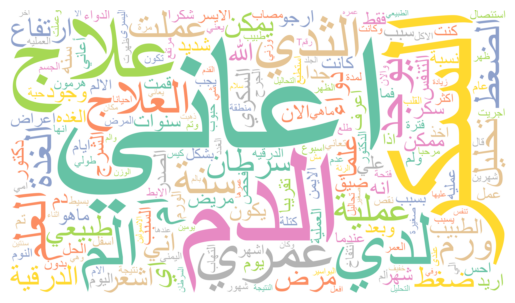

In [73]:
column_to_wordcloud(train_data, "combined_text", "/content/drive/MyDrive/NLP_1/ARIAL.ttf", stopwords=combined_stopwords)

## [3.8]

تجذيع أو تجذير الكلمات العربية فقط

In [46]:
nltk.download('isri')

[nltk_data] Error loading isri: Package 'isri' not found in index


False

In [44]:
# from nltk.stem import ISRIStemmer

# stemmer = ISRIStemmer()

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("arabic")

In [45]:
def normalize_arabic_word(input_string):
    words = input_string.split()

    processed_words = [normalize_arabic_one_word(word) for word in words]

    processed_string = ' '.join(processed_words)

    return processed_string

def normalize_arabic_one_word(word):
    stemmed_word = stemmer.stem(word)
    return stemmed_word

original_word = "فسيكفيكهم علاج الطبيب"

original_word = normalize_arabic_word(original_word)

print(original_word)


سيكف علاج طبيب


In [46]:
new_total_tokens = []
for x in total_tokens:
    normalized_word = normalize_arabic_word(x)
    new_total_tokens.append(normalized_word)

print(total_tokens[:20])
print(new_total_tokens[:20])

['ما', 'هي', 'مميزات', 'و', 'عيوب', 'الدواء', 'جلوكوفانس', ' 500 ', ' 5 ', 'و', 'ايضا', 'الأنسولين', 'مكس', 'تارد', ' 30 ', 'اليك', 'نتيجة', 'تحليل', 'هرمونات', 'الغدة']
['ما', 'هي', 'مميز', 'و', 'عيوب', 'دواء', 'جلوكوفانس', '500', '5', 'و', 'ايض', 'انسول', 'مكس', 'تارد', '30', 'اليك', 'نتيج', 'تحليل', 'هرمون', 'الغد']


## [3.9]

عمليات توحيد النصوص العربية

### [3.9.1]

توحيد طريقة كتابة الهمزات (ء ؤ ئ)

In [47]:
def standardize_arabic_hamzas(text):
    return text.replace('ؤ', 'ء').replace('ئ', 'ء')

print("Standardized Texts:")
for text in train_data['question'].head(5):
    standardized_text = standardize_arabic_hamzas(text)
    print(standardized_text)

for text in train_data['answer'].head(5):
    standardized_text = standardize_arabic_hamzas(text)
    print(standardized_text)

Standardized Texts:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30 

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة 

حلول منزلية لأعراض ارتفاع ضغط الدم 

عملت عملية دوالي الساقين قسطرة الليزر من شهر وعندي الم من اسفل ساق الى اعلى ساق و برودة اطراف القدم وحرقان وخز و امكان يابسة وحكة و طيبة عليا هل هدا طبيعي احس في سكين تقطع 

ما حقيقة ان تمرين العضلة النعلية يخفض السكر بالدم؟؟ 


لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسءلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 





نعم. يجب تخفيض الجرعة، الا اذا كان سبب استءصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسءلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-

### [3.9.2]

توحيد طريقة كتابة الألفات (أ آ إ)

In [48]:
def standardize_arabic_alef(text):
    return text.replace('آ', 'ا').replace('إ', 'ا').replace('آ', 'ا')

data_example="مرحبآ ، هلا هلآ هلإ مرحب فيكم إرحبو "

standardized_text = standardize_arabic_alef(data_example)
print(standardized_text)

print("Standardized Texts:")
for text in train_data['question'].head(5):
    standardized_text = standardize_arabic_alef(text)
    print(standardized_text)

for text in train_data['answer'].head(5):
    standardized_text = standardize_arabic_alef(text)
    print(standardized_text)

مرحبا ، هلا هلا هلا مرحب فيكم ارحبو 
Standardized Texts:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30 

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة 

حلول منزلية لأعراض ارتفاع ضغط الدم 

عملت عملية دوالي الساقين قسطرة الليزر من شهر وعندي الم من اسفل ساق الى اعلى ساق و برودة اطراف القدم وحرقان وخز و امكان يابسة وحكة و طيبة عليا هل هدا طبيعي احس في سكين تقطع 

ما حقيقة ان تمرين العضلة النعلية يخفض السكر بالدم؟؟ 


لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 





نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-ت

### [3.9.3]

حذف التطويل

In [49]:
def remove_tatweel(arabic_text):
    tatweel_pattern = re.compile('ـ')
    text_without_tatweel = re.sub(tatweel_pattern, '', arabic_text)
    return text_without_tatweel

text_without_tatweel = remove_tatweel("الـكريم")
print(text_without_tatweel)

print("Cleaned Answers:")
for text in train_data['answer'].head(5):
    cleaned_text = remove_tatweel(text)
    print(cleaned_text)

print("Cleaned Question:")
for text in train_data['question'].head(5):
    cleaned_text = remove_tatweel(text)
    print(cleaned_text)

الكريم
Cleaned Answers:


لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 





نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 


جراحة عامة 





يفضل عدم الاستغناء عن العلاج الدوائي لمرضى الضغط لكن يعد النظام الغذائي و الحركي اليومي للمريض جزء مهم و أساسي في الحفاظ على ضغط المريض ضمن الحدود الطبيعية.
ينصح ممارسة دورية للرياضة و المشي و محاولة تخفيف الوزن، التخفيف من المنبهات بأنواعها و محاولة الإقلاع عن التدخين.
تناول الأطعمة الغنية بالبوتاسيوم كالموز و تجنب الأطعمة التي تحتوي على أملاح لتأثيرها المباشر على الضغط، و تناول المغذيات مثل مستخلص الثوم و زيوت 

### [3.9.4]

حذف علامات التشكيل

In [50]:
def remove_diacritics(arabic_text):
    diacritic_pattern = re.compile("[\u0617-\u061A\u064B-\u0652]")
    text_without_diacritics = re.sub(diacritic_pattern, "", arabic_text)
    return text_without_diacritics

cleaned_text = remove_diacritics(train_data['answer'][82])
print(cleaned_text)

print("Cleaned Answers:")
for text in train_data['answer'].head(5):
    cleaned_text = remove_diacritics(text)
    print(cleaned_text)

print("Cleaned Question:")
for text in train_data['question'].head(5):
    cleaned_text = remove_diacritics(text)
    print(cleaned_text)



الحمد لله على سلامتك.
عليك الجلوس في ماء دافئ ضع فيه ملح أو محلول بيتادين المعقم مرتين يوميا على الأقل ولمدة ربع ساعه.
استخدم مسكنات عند الاحساس بالألم.
بإذن الله يلتأم الجرح خلال أسبوع إلى اسبوعين
1
2020-06-05 15:23:12


د. ياسر الدباسي







/اسئلة-طبية/جراحة-عامة/شكل-الناسور-بعد-ايام-و-الام-و-حرقة-شديدة-مصاحبة-له-1426712

د. ياسر الدباسي 


جراحة عامة 



Cleaned Answers:


لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 





نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 


جراحة عامة 





يفضل عدم الاستغناء عن العلاج الدوائي لمرضى الضغط لكن يعد ال

## [3.10]

حذف الفراغات المكررة، بين الكلمات وستبدلها بفراغ واحد

In [51]:
def remove_duplicate_spaces(text):
    space_pattern = r'\s+'

    return re.sub(space_pattern, ' ', text)

print("Texts with Duplicate Spaces Removed:")
for text in train_data['question'].head(5):
    cleaned_text = remove_duplicate_spaces(text)
    print(cleaned_text)

for text in train_data['answer'].head(5):
    cleaned_text = remove_duplicate_spaces(text)
    print(cleaned_text)

Texts with Duplicate Spaces Removed:
 ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30 
 اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة 
 حلول منزلية لأعراض ارتفاع ضغط الدم 
 عملت عملية دوالي الساقين قسطرة الليزر من شهر وعندي الم من اسفل ساق الى اعلى ساق و برودة اطراف القدم وحرقان وخز و امكان يابسة وحكة و طيبة عليا هل هدا طبيعي احس في سكين تقطع 
 ما حقيقة ان تمرين العضلة النعلية يخفض السكر بالدم؟؟ 
 لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له 1 2015-01-04 20:08:51 الدكتور يزن علي خليف /اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157 الدكتور يزن علي خليف الغدد الصماء 
 نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة 0 2017-02-13 06:34:19 الدكتور باسم مرقص /اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154 

## Extra [3.11]

# Question [4]: Prepare Training Data

## [4.1]


In [52]:
def clearData(text, remove_specialization) :
    text = remove_links(text)
    text = short_doctor_names(text)
    if(remove_specialization):
      text = remove_doctor_specialization(text)
    text = remove_all_numbers(text)
    text = remove_date_time(text)
    text = keep_arabic_numbers_punctuation(text)
    text = remove_punctuation(text)
    text = remove_stop_words(text, arabic_stopwords)
    text = normalize_arabic_word(text)
    text = standardize_arabic_hamzas(text)
    text = standardize_arabic_alef(text)
    text = remove_tatweel(text)
    text = remove_diacritics(text)
    text = remove_duplicate_spaces(text)
    return text

In [53]:
for text in train_data['question'].head(5):
    cleaned_text = clearData(text, False)
    print(cleaned_text)
    print("\n")

print("__________________________________________________________________________\n")

for text in train_data['answer'].head(5):
    cleaned_text = clearData(text, True)
    print(cleaned_text)
    print("\n")

مميز عيوب دواء جلوكوفانس ايض انسول مكس تارد


اليك نتيج تحليل هرمون الغد درق علم بان تم استاصال الغد اكثر سنت مطلوب تعديل جرع


حلول منزل اعراض ارتفاع ضغط الدم


عمل عمل دوال ساق قسطر ليزر شهر عند الم اسفل ساق الى اعلى ساق رود اطراف قدم حرق وخز امكا يابس وحك طيب عل هدا طبيع احس سك تقطع


حقيق ان تمر عضل نعل يخفض سكر الدم


__________________________________________________________________________

لكل علاج ايجاب سلب وال تعتمد حال مريض فما يناسب احد يناسب اخر وهذ يحدد طبيب خلال مراجع مريض ديز ديز غدد صماء


يجب تخفيض جرع الا اذا سبب استيصال الغد سرطا الغد دباسم اسم مرقص جراح


يفضل عدم استغناء علاج دواء مرضى ضغط يعد نظام غذاء حرك يوم مريض جزء مهم اساس حفاظ ضغط مريض ضمن حدود طبيع ينصح ممارس دور رياض المش محاول تخفيف وزن تخفيف منبه انواع محاول اقلاع تدخ تناول اطعم الغن وتاسيوم موز تجنب اطعم تحتو املاح تاثير مباشر ضغط تناول مغذ مستخلص ثوم زيو سمك تجنب توتر محافظ نظام يوم هادء متابع دور قراء ضغط دانور دانور قلب اوع دمو


راجع طبيب اجر جراحه افضل يجيب لان شاهد حاله عل وضع اول وهو لفعل تمن لش

## [4.2]

In [54]:
train_data["question"] = train_data["question"].apply(lambda x: clearData(x, remove_specialization=False))
train_data["answer"] = train_data["answer"].apply(lambda x: clearData(x, remove_specialization=True))

In [55]:
train_data["question"].head(10)

0                                                                                              مميز عيوب دواء جلوكوفانس ايض انسول مكس تارد
1                                                          اليك نتيج تحليل هرمون الغد درق علم بان تم استاصال الغد اكثر سنت مطلوب تعديل جرع
2                                                                                                          حلول منزل اعراض ارتفاع ضغط الدم
3             عمل عمل دوال ساق قسطر ليزر شهر عند الم اسفل ساق الى اعلى ساق رود اطراف قدم حرق وخز امكا يابس وحك طيب عل هدا طبيع احس سك تقطع
4                                                                                                        حقيق ان تمر عضل نعل يخفض سكر الدم
5    سلام عل انا شاب سنه ظهرل زي كور فتح شرج وه تولم الان ارج حل فور لان مش مستحمل الم كما عامل عمل حال كتف مركب ديم قاعد عاوز حل سريع شكر
6                                    ورم سنو حجم انش ولا فجا شهر زاد حجم فجا ومع عوار حول ورمه قمت عمل تحليل غد وه سليم عند صور تقرير مقطع
7                          

In [56]:
train_data["answer"].head(10)

0                                                                                                                                                                                                                                                لكل علاج ايجاب سلب وال تعتمد حال مريض فما يناسب احد يناسب اخر وهذ يحدد طبيب خلال مراجع مريض ديز ديز غدد صماء
1                                                                                                                                                                                                                                                                                        يجب تخفيض جرع الا اذا سبب استيصال الغد سرطا الغد دباسم اسم مرقص جراح
2    يفضل عدم استغناء علاج دواء مرضى ضغط يعد نظام غذاء حرك يوم مريض جزء مهم اساس حفاظ ضغط مريض ضمن حدود طبيع ينصح ممارس دور رياض المش محاول تخفيف وزن تخفيف منبه انواع محاول اقلاع تدخ تناول اطعم الغن وتاسيوم موز تجنب اطعم تحتو املاح تاثير مباشر ضغط تناول مغذ مستخلص ثوم زيو سمك تجنب توتر محافظ نظام يو

In [58]:
train_data['tokenized_question'] = train_data['question'].apply(lambda x: arabic_tokenizer(str(x)))
train_data['tokenized_answer'] = train_data['answer'].apply(lambda x: arabic_tokenizer(str(x)))

In [59]:
total_tokens = []
for x in train_data['tokenized_question']:
    total_tokens += x

for x in train_data['tokenized_answer']:
    total_tokens += x

print("total_tokens:" , len(total_tokens))

vocab = len(np.unique(np.array(total_tokens)))
print("vocab:", vocab)

total_tokens: 1497554
vocab: 38804


مقارنة بين عدد الكلمات والكلمات الفريدة لكل من الداتا الخام والداتا بعد التنظيف

Before:

    total_tokens: 2174029
    vocab: 128566

After:

    total_tokens: 1497554
    vocab: 38804

<div dir="rtl">
ملاحظات:

- نلاحظ أن عدد الTokens قد انخفض بشكل كبير نتيجة عمليات التنظيف التي تم إجرائها

- كما أن عدد الكلمات الفريدة قد انخفض لأقل من النصف تقريباً
</div>

## [4.3]

حذف الداتا التي طولها اقل من 5 محارف

In [60]:
rows_to_remove = train_data[
    (train_data['question'].str.len() < 5) |
    (train_data['answer'].str.len() < 5)
]

num_rows_removed = len(rows_to_remove)
print(f"Number of rows to be removed: {num_rows_removed}")

train_data = train_data.drop(rows_to_remove.index)

Number of rows to be removed: 30


In [61]:
train_data['combined_text'] = train_data['question'] + " " + train_data['answer']
train_data[['question', 'answer', 'combined_text','label']].head()

,question,answer,combined_text,label
0,مميز عيوب دواء جلوكوفانس ايض انسول مكس تارد,لكل علاج ايجاب سلب وال تعتمد حال مريض فما يناسب احد يناسب اخر وهذ يحدد طبيب خلال مراجع مريض ديز ديز غدد صماء,مميز عيوب دواء جلوكوفانس ايض انسول مكس تارد لكل علاج ايجاب سلب وال تعتمد حال مريض فما يناسب احد يناسب اخر وهذ يحدد طبيب خلال مراجع مريض ديز ديز غدد صماء,أمراض الدم
1,اليك نتيج تحليل هرمون الغد درق علم بان تم استاصال الغد اكثر سنت مطلوب تعديل جرع,يجب تخفيض جرع الا اذا سبب استيصال الغد سرطا الغد دباسم اسم مرقص جراح,اليك نتيج تحليل هرمون الغد درق علم بان تم استاصال الغد اكثر سنت مطلوب تعديل جرع يجب تخفيض جرع الا اذا سبب استيصال الغد سرطا الغد دباسم اسم مرقص جراح,الأورام الخبيثة والحميدة
2,حلول منزل اعراض ارتفاع ضغط الدم,يفضل عدم استغناء علاج دواء مرضى ضغط يعد نظام غذاء حرك يوم مريض جزء مهم اساس حفاظ ضغط مريض ضمن حدود طبيع ينصح ممارس دور رياض المش محاول تخفيف وزن تخفيف منبه انواع محاول اقلاع تدخ تناول اطعم الغن وتاسيوم موز تجنب اطعم تحتو املاح تاثير مباشر ضغط تناول مغذ مستخلص ثوم زيو سمك تجنب توتر محافظ نظام يوم هادء متابع دور قراء ضغط دانور دانور قلب اوع دمو,حلول منزل اعراض ارتفاع ضغط الدم يفضل عدم استغناء علاج دواء مرضى ضغط يعد نظام غذاء حرك يوم مريض جزء مهم اساس حفاظ ضغط مريض ضمن حدود طبيع ينصح ممارس دور رياض المش محاول تخفيف وزن تخفيف منبه انواع محاول اقلاع تدخ تناول اطعم الغن وتاسيوم موز تجنب اطعم تحتو املاح تاثير مباشر ضغط تناول مغذ مستخلص ثوم زيو سمك تجنب توتر محافظ نظام يوم هادء متابع دور قراء ضغط دانور دانور قلب اوع دمو,جراحة عامة
3,عمل عمل دوال ساق قسطر ليزر شهر عند الم اسفل ساق الى اعلى ساق رود اطراف قدم حرق وخز امكا يابس وحك طيب عل هدا طبيع احس سك تقطع,راجع طبيب اجر جراحه افضل يجيب لان شاهد حاله عل وضع اول وهو لفعل تمن لشفاء دحس دحس جراح,عمل عمل دوال ساق قسطر ليزر شهر عند الم اسفل ساق الى اعلى ساق رود اطراف قدم حرق وخز امكا يابس وحك طيب عل هدا طبيع احس سك تقطع راجع طبيب اجر جراحه افضل يجيب لان شاهد حاله عل وضع اول وهو لفعل تمن لشفاء دحس دحس جراح,أمراض الجهاز التنفسي
4,حقيق ان تمر عضل نعل يخفض سكر الدم,قصد تدل عضل فهذ كلام صحيح ممارس رياض المش يعن حرك عضل مساهم حرق سكر داغيد داغيد غدد صماء,حقيق ان تمر عضل نعل يخفض سكر الدم قصد تدل عضل فهذ كلام صحيح ممارس رياض المش يعن حرك عضل مساهم حرق سكر داغيد داغيد غدد صماء,مرض السكري


## [4.4]

# Question [5]: Baseline

The Comparison Dictionary example

الجدول النهائي

In [62]:
comparison_table = {}

comparison_table['question_step_number'] = []
comparison_table['model_name'] = []
comparison_table['features'] = []
comparison_table['model_parameters'] = []
comparison_table['preprocessing_methods'] = []
comparison_table['accuracy'] = []
comparison_table['balance_accuracy'] = []

الجدول الخاص بهذا الطلب

In [63]:
comparison_table_5 = {}

comparison_table_5['question_step_number'] = []
comparison_table_5['model_name'] = []
comparison_table_5['features'] = []
comparison_table_5['model_parameters'] = []
comparison_table_5['preprocessing_methods'] = []
comparison_table_5['accuracy'] = []
comparison_table_5['balance_accuracy'] = []

## [5.1]

In [64]:
train_data_path = 'train.csv'
val_data_path = 'val.csv'
test_data_path = 'test.csv'

specialty_mapping = {
    "جراحة-عامة": "جراحة عامة",
    "جراحة عامة": "جراحة عامة",
    "جراحة_عامة": "جراحة عامة",
    "جراحه عامة": "جراحة عامة",

    "امراض-الغدد-الصماء": "أمراض الغدد الصماء",
    "أمراض_الغدد_الصماء": "أمراض الغدد الصماء",
    "الغدد-الصماء": "أمراض الغدد الصماء",
    "امراض الغدد الصماء": "أمراض الغدد الصماء",
    "امراض_الغدد_الصماء": "أمراض الغدد الصماء",
    "الغدد الصماء":"أمراض الغدد الصماء",
    "أمراض-الغدد-الصماء":"أمراض الغدد الصماء",


    "الدم":"أمراض الدم",
    "أمراض-الدم":"أمراض الدم",
    "امراض الدم":"أمراض الدم",
    "امراض_الدم":"أمراض الدم",
    "أمراض_الدم":"أمراض الدم",
    "امراض-الدم":"أمراض الدم",


    "ارتفاع-ضغط-الدم":"ارتفاع ضغط الدم",
    "ارتفاع_ضغط_الدم":"ارتفاع ضغط الدم",

    "أمراض-الجهاز-التنفسي":"أمراض الجهاز التنفسي",
    "أمراض-الجهاز-التنفسي":"أمراض الجهاز التنفسي",
    "الجهاز-التنفسي":"أمراض الجهاز التنفسي",
    "أمراض_الجهاز_التنفسي":"أمراض الجهاز التنفسي",
    "امراض الجهاز التنفسي":"أمراض الجهاز التنفسي",
    "امراض_الجهاز_التنفسي":"أمراض الجهاز التنفسي",
    "امراض-الجهاز-التنفسي":"أمراض الجهاز التنفسي",
    "أمراض الجهاز التنفسي":"أمراض الجهاز التنفسي",

    "جراحة-العظام":"جراحة العظام",
    "جراحة_العظام":"جراحة العظام",


    "مرض-السكري":"مرض السكري",
    "مرض_السكري":"مرض السكري",
    "السكري":"مرض السكري",


    "الأورام-الخبيثة-والحميدة":"الأورام الخبيثة والحميدة",
    "الاورام-الخبيثة-والحميدة":"الأورام الخبيثة والحميدة",
    "الاورام_الخبيثة_والحميدة":"الأورام الخبيثة والحميدة",
    "الاورام الخبيثة والحميدة":"الأورام الخبيثة والحميدة",
}

new_train_data = pd.read_csv("train.csv")
new_val_data = pd.read_csv("val.csv")
new_test_data = pd.read_csv("test.csv")


new_train_data['label'] = new_train_data['label'].map(specialty_mapping).fillna(new_train_data['label'])
new_val_data['label'] = new_val_data['label'].map(specialty_mapping).fillna(new_val_data['label'])
new_test_data['label'] = new_test_data['label'].map(specialty_mapping).fillna(new_test_data['label'])

In [65]:
new_train_data['combined_text'] = new_train_data['question'].fillna('') + ' ' + new_train_data['answer'].fillna('')
new_test_data['combined_text'] = new_test_data['question'].fillna('') + ' ' + new_test_data['answer'].fillna('')
new_val_data['combined_text'] = new_val_data['question'].fillna('') + ' ' + new_val_data['answer'].fillna('')

X_train = new_train_data['combined_text'].tolist()
y_train = new_train_data['label'].tolist()
X_test = new_test_data['combined_text'].tolist()
y_test = new_test_data['label'].tolist()
X_val = new_val_data['combined_text'].tolist()
y_val = new_val_data['label'].tolist()

## [5.2]

In [68]:
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

model = LogisticRegression(multi_class='multinomial', solver="lbfgs")
model.fit(X_train_bow, y_train)

model_predictions = model.predict(X_test_bow)
accuracy = accuracy_score(y_test, model_predictions)
balanced_accuracy_value = balanced_accuracy_score(y_test, model_predictions)

comparison_table = {
    'question_step_number': ["5.2"],
    'model_name': ['multinomial_logistic_regression'],
    'features': ['bag of words'],
    'model_parameters': ['default'],
    'preprocessing_methods': ["none (raw data)"],
    'accuracy': [accuracy],
    'balance_accuracy': [balanced_accuracy_value]
}

print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy_value}")

Accuracy: 0.7016945297395656
Balanced Accuracy: 0.6843098307263586


c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## [5.3]

In [71]:
def train_multinomial_logistic_regression(X_train, X_test, y_train, y_test):
    vectorizer = CountVectorizer()
    X_train_bow = vectorizer.fit_transform(X_train)
    X_test_bow = vectorizer.transform(X_test)

    model = LogisticRegression(multi_class='multinomial', solver="lbfgs")
    model.fit(X_train_bow, y_train)

    model_predictions = model.predict(X_test_bow)
    accuracy = accuracy_score(y_test, model_predictions)
    balanced_accuracy_value = balanced_accuracy_score(y_test, model_predictions)

    return accuracy, balanced_accuracy_value


remove links function

In [72]:
new_train_data['combined_text'] = new_train_data['question'].fillna('') + ' ' + new_train_data['answer'].fillna('')
new_test_data['combined_text'] = new_test_data['question'].fillna('') + ' ' + new_test_data['answer'].fillna('')
new_val_data['combined_text'] = new_val_data['question'].fillna('') + ' ' + new_val_data['answer'].fillna('')

new_train_data['combined_text'] = new_train_data['question'].apply(lambda x: remove_links(str(x))) + ' ' + new_train_data['answer'].apply(lambda x: remove_links(str(x)))

X_train = new_train_data['combined_text'].tolist()
y_train = new_train_data['label'].tolist()
X_test = new_test_data['combined_text'].tolist()
y_test = new_test_data['label'].tolist()
X_val = new_val_data['combined_text'].tolist()
y_val = new_val_data['label'].tolist()

accuracy, balanced_accuracy = train_multinomial_logistic_regression(X_train,X_test,y_train,y_test)

print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

comparison_table_5['question_step_number'].append("5.3")
comparison_table_5['model_name'].append('multinomial_logistic_regression')
comparison_table_5['features'].append('bag of words')
comparison_table_5['model_parameters'].append('default')
comparison_table_5['preprocessing_methods'].append("remove_links")
comparison_table_5['accuracy'].append(accuracy)
comparison_table_5['balance_accuracy'].append(balanced_accuracy)

Accuracy: 0.7064141931081542
Balanced Accuracy: 0.689595993039697


c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


short doctor names function

In [73]:
new_train_data['combined_text'] = new_train_data['question'].fillna('') + ' ' + new_train_data['answer'].fillna('')
new_test_data['combined_text'] = new_test_data['question'].fillna('') + ' ' + new_test_data['answer'].fillna('')
new_val_data['combined_text'] = new_val_data['question'].fillna('') + ' ' + new_val_data['answer'].fillna('')

new_train_data['combined_text'] = new_train_data['question'].apply(lambda x: short_doctor_names(str(x))) + ' ' + new_train_data['answer'].apply(lambda x: short_doctor_names(str(x)))

X_train = new_train_data['combined_text'].tolist()
y_train = new_train_data['label'].tolist()
X_test = new_test_data['combined_text'].tolist()
y_test = new_test_data['label'].tolist()
X_val = new_val_data['combined_text'].tolist()
y_val = new_val_data['label'].tolist()

accuracy, balanced_accuracy = train_multinomial_logistic_regression(X_train,X_test,y_train,y_test)

print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

comparison_table_5['question_step_number'].append("5.3")
comparison_table_5['model_name'].append('multinomial_logistic_regression')
comparison_table_5['features'].append('bag of words')
comparison_table_5['model_parameters'].append('default')
comparison_table_5['preprocessing_methods'].append("short_doctor_names")
comparison_table_5['accuracy'].append(accuracy)
comparison_table_5['balance_accuracy'].append(balanced_accuracy)

Accuracy: 0.6912885249630388
Balanced Accuracy: 0.6753281057418035


c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## note: don't remove specialization from question>>

remove doctor specialization function

In [75]:
new_train_data['combined_text'] = new_train_data['question'].fillna('') + ' ' + new_train_data['answer'].fillna('')
new_test_data['combined_text'] = new_test_data['question'].fillna('') + ' ' + new_test_data['answer'].fillna('')
new_val_data['combined_text'] = new_val_data['question'].fillna('') + ' ' + new_val_data['answer'].fillna('')

new_train_data['combined_text'] = new_train_data['question'] + ' ' + new_train_data['answer'].apply(lambda x: remove_doctor_specialization(str(x)))

X_train = new_train_data['combined_text'].tolist()
y_train = new_train_data['label'].tolist()
X_test = new_test_data['combined_text'].tolist()
y_test = new_test_data['label'].tolist()
X_val = new_val_data['combined_text'].tolist()
y_val = new_val_data['label'].tolist()

accuracy, balanced_accuracy = train_multinomial_logistic_regression(X_train,X_test,y_train,y_test)

print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

comparison_table_5['question_step_number'].append("5.3")
comparison_table_5['model_name'].append('multinomial_logistic_regression')
comparison_table_5['features'].append('bag of words')
comparison_table_5['model_parameters'].append('default')
comparison_table_5['preprocessing_methods'].append("remove_doctor_specialization")
comparison_table_5['accuracy'].append(accuracy)
comparison_table_5['balance_accuracy'].append(balanced_accuracy)

Accuracy: 0.7015808029114068
Balanced Accuracy: 0.6859896988834299


c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


remove all numbers function

In [76]:
new_train_data['combined_text'] = new_train_data['question'].fillna('') + ' ' + new_train_data['answer'].fillna('')
new_test_data['combined_text'] = new_test_data['question'].fillna('') + ' ' + new_test_data['answer'].fillna('')
new_val_data['combined_text'] = new_val_data['question'].fillna('') + ' ' + new_val_data['answer'].fillna('')

new_train_data['combined_text'] = new_train_data['question'].apply(lambda x: remove_all_numbers(str(x))) + ' ' + new_train_data['answer'].apply(lambda x: remove_all_numbers(str(x)))

X_train = new_train_data['combined_text'].tolist()
y_train = new_train_data['label'].tolist()
X_test = new_test_data['combined_text'].tolist()
y_test = new_test_data['label'].tolist()
X_val = new_val_data['combined_text'].tolist()
y_val = new_val_data['label'].tolist()

accuracy, balanced_accuracy = train_multinomial_logistic_regression(X_train,X_test,y_train,y_test)

print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")



comparison_table_5['question_step_number'].append("5.3")
comparison_table_5['model_name'].append('multinomial_logistic_regression')
comparison_table_5['features'].append('bag of words')
comparison_table_5['model_parameters'].append('default')
comparison_table_5['preprocessing_methods'].append("remove_all_numbers")
comparison_table_5['accuracy'].append(accuracy)
comparison_table_5['balance_accuracy'].append(balanced_accuracy)



Accuracy: 0.7032867053337882
Balanced Accuracy: 0.6861863312582721


c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


remove date time function

In [78]:
new_train_data['combined_text'] = new_train_data['question'].fillna('') + ' ' + new_train_data['answer'].fillna('')
new_test_data['combined_text'] = new_test_data['question'].fillna('') + ' ' + new_test_data['answer'].fillna('')
new_val_data['combined_text'] = new_val_data['question'].fillna('') + ' ' + new_val_data['answer'].fillna('')

new_train_data['combined_text'] = new_train_data['question'].apply(lambda x: remove_date_time(str(x))) + ' ' + new_train_data['answer'].apply(lambda x: remove_date_time(str(x)))

X_train = new_train_data['combined_text'].tolist()
y_train = new_train_data['label'].tolist()
X_test = new_test_data['combined_text'].tolist()
y_test = new_test_data['label'].tolist()
X_val = new_val_data['combined_text'].tolist()
y_val = new_val_data['label'].tolist()

accuracy, balanced_accuracy = train_multinomial_logistic_regression(X_train,X_test,y_train,y_test)

print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

comparison_table_5['question_step_number'].append("5.3")
comparison_table_5['model_name'].append('multinomial_logistic_regression')
comparison_table_5['features'].append('bag of words')
comparison_table_5['model_parameters'].append('default')
comparison_table_5['preprocessing_methods'].append("remove_date_time")
comparison_table_5['accuracy'].append(accuracy)
comparison_table_5['balance_accuracy'].append(balanced_accuracy)

Accuracy: 0.6945866029796429
Balanced Accuracy: 0.6763231238553713


c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


keep arabic numbers and punctuation function

In [79]:
new_train_data['combined_text'] = new_train_data['question'].fillna('') + ' ' + new_train_data['answer'].fillna('')
new_test_data['combined_text'] = new_test_data['question'].fillna('') + ' ' + new_test_data['answer'].fillna('')
new_val_data['combined_text'] = new_val_data['question'].fillna('') + ' ' + new_val_data['answer'].fillna('')

new_train_data['combined_text'] = new_train_data['question'].apply(lambda x: keep_arabic_numbers_punctuation(str(x))) + ' ' + new_train_data['answer'].apply(lambda x: keep_arabic_numbers_punctuation(str(x)))

X_train = new_train_data['combined_text'].tolist()
y_train = new_train_data['label'].tolist()
X_test = new_test_data['combined_text'].tolist()
y_test = new_test_data['label'].tolist()
X_val = new_val_data['combined_text'].tolist()
y_val = new_val_data['label'].tolist()

accuracy, balanced_accuracy = train_multinomial_logistic_regression(X_train,X_test,y_train,y_test)

print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

comparison_table_5['question_step_number'].append("5.3")
comparison_table_5['model_name'].append('multinomial_logistic_regression')
comparison_table_5['features'].append('bag of words')
comparison_table_5['model_parameters'].append('default')
comparison_table_5['preprocessing_methods'].append("keep_arabic_numbers_punctuation")
comparison_table_5['accuracy'].append(accuracy)
comparison_table_5['balance_accuracy'].append(balanced_accuracy)

Accuracy: 0.18520413965654497
Balanced Accuracy: 0.15976020728930065


c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


remove punctuation function

In [80]:
new_train_data['combined_text'] = new_train_data['question'].fillna('') + ' ' + new_train_data['answer'].fillna('')
new_test_data['combined_text'] = new_test_data['question'].fillna('') + ' ' + new_test_data['answer'].fillna('')
new_val_data['combined_text'] = new_val_data['question'].fillna('') + ' ' + new_val_data['answer'].fillna('')

new_train_data['combined_text'] = new_train_data['question'].apply(lambda x: remove_punctuation(str(x))) + ' ' + new_train_data['answer'].apply(lambda x: remove_punctuation(str(x)))

X_train = new_train_data['combined_text'].tolist()
y_train = new_train_data['label'].tolist()
X_test = new_test_data['combined_text'].tolist()
y_test = new_test_data['label'].tolist()
X_val = new_val_data['combined_text'].tolist()
y_val = new_val_data['label'].tolist()

accuracy, balanced_accuracy = train_multinomial_logistic_regression(X_train,X_test,y_train,y_test)

print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

comparison_table_5['question_step_number'].append("5.3")
comparison_table_5['model_name'].append('multinomial_logistic_regression')
comparison_table_5['features'].append('bag of words')
comparison_table_5['model_parameters'].append('default')
comparison_table_5['preprocessing_methods'].append("remove_punctuation")
comparison_table_5['accuracy'].append(accuracy)
comparison_table_5['balance_accuracy'].append(balanced_accuracy)

Accuracy: 0.6936199249402935
Balanced Accuracy: 0.6731715822513751


c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


remove stop words function

In [81]:
new_train_data['combined_text'] = new_train_data['question'].fillna('') + ' ' + new_train_data['answer'].fillna('')
new_test_data['combined_text'] = new_test_data['question'].fillna('') + ' ' + new_test_data['answer'].fillna('')
new_val_data['combined_text'] = new_val_data['question'].fillna('') + ' ' + new_val_data['answer'].fillna('')

new_train_data['combined_text'] = new_train_data['question'].apply(lambda x: remove_stop_words(str(x),combined_stopwords)) + ' ' + new_train_data['answer'].apply(lambda x: remove_stop_words(str(x),combined_stopwords))

X_train = new_train_data['combined_text'].tolist()
y_train = new_train_data['label'].tolist()
X_test = new_test_data['combined_text'].tolist()
y_test = new_test_data['label'].tolist()
X_val = new_val_data['combined_text'].tolist()
y_val = new_val_data['label'].tolist()

accuracy, balanced_accuracy = train_multinomial_logistic_regression(X_train,X_test,y_train,y_test)

print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

comparison_table_5['question_step_number'].append("5.3")
comparison_table_5['model_name'].append('multinomial_logistic_regression')
comparison_table_5['features'].append('bag of words')
comparison_table_5['model_parameters'].append('default')
comparison_table_5['preprocessing_methods'].append("remove_stop_words")
comparison_table_5['accuracy'].append(accuracy)
comparison_table_5['balance_accuracy'].append(balanced_accuracy)

Accuracy: 0.631525076765609
Balanced Accuracy: 0.617752756111692


c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stemming Function

In [82]:
new_train_data['combined_text'] = new_train_data['question'].fillna('') + ' ' + new_train_data['answer'].fillna('')
new_test_data['combined_text'] = new_test_data['question'].fillna('') + ' ' + new_test_data['answer'].fillna('')
new_val_data['combined_text'] = new_val_data['question'].fillna('') + ' ' + new_val_data['answer'].fillna('')

new_train_data['combined_text'] = new_train_data['question'].apply(lambda x: normalize_arabic_word(str(x))) + ' ' + new_train_data['answer'].apply(lambda x: normalize_arabic_word(str(x)))

X_train = new_train_data['combined_text'].tolist()
y_train = new_train_data['label'].tolist()
X_test = new_test_data['combined_text'].tolist()
y_test = new_test_data['label'].tolist()
X_val = new_val_data['combined_text'].tolist()
y_val = new_val_data['label'].tolist()

accuracy, balanced_accuracy = train_multinomial_logistic_regression(X_train,X_test,y_train,y_test)

print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

comparison_table_5['question_step_number'].append("5.3")
comparison_table_5['model_name'].append('multinomial_logistic_regression')
comparison_table_5['features'].append('bag of words')
comparison_table_5['model_parameters'].append('default')
comparison_table_5['preprocessing_methods'].append("normalize_arabic_word")
comparison_table_5['accuracy'].append(accuracy)
comparison_table_5['balance_accuracy'].append(balanced_accuracy)

Accuracy: 0.1272603207096554
Balanced Accuracy: 0.1032757132399428


c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


standarize arabic hamzas

In [83]:
new_train_data['combined_text'] = new_train_data['question'].fillna('') + ' ' + new_train_data['answer'].fillna('')
new_test_data['combined_text'] = new_test_data['question'].fillna('') + ' ' + new_test_data['answer'].fillna('')
new_val_data['combined_text'] = new_val_data['question'].fillna('') + ' ' + new_val_data['answer'].fillna('')

new_train_data['combined_text'] = new_train_data['question'].apply(lambda x: standardize_arabic_hamzas(str(x))) + ' ' + new_train_data['answer'].apply(lambda x: standardize_arabic_hamzas(str(x)))

X_train = new_train_data['combined_text'].tolist()
y_train = new_train_data['label'].tolist()
X_test = new_test_data['combined_text'].tolist()
y_test = new_test_data['label'].tolist()
X_val = new_val_data['combined_text'].tolist()
y_val = new_val_data['label'].tolist()

accuracy, balanced_accuracy = train_multinomial_logistic_regression(X_train,X_test,y_train,y_test)

print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

comparison_table_5['question_step_number'].append("5.3")
comparison_table_5['model_name'].append('multinomial_logistic_regression')
comparison_table_5['features'].append('bag of words')
comparison_table_5['model_parameters'].append('default')
comparison_table_5['preprocessing_methods'].append("standardize_arabic_hamzas")
comparison_table_5['accuracy'].append(accuracy)
comparison_table_5['balance_accuracy'].append(balanced_accuracy)

Accuracy: 0.6928807005572615
Balanced Accuracy: 0.67628219613757


c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


standarize arabic alef function

In [84]:
new_train_data['combined_text'] = new_train_data['question'].fillna('') + ' ' + new_train_data['answer'].fillna('')
new_test_data['combined_text'] = new_test_data['question'].fillna('') + ' ' + new_test_data['answer'].fillna('')
new_val_data['combined_text'] = new_val_data['question'].fillna('') + ' ' + new_val_data['answer'].fillna('')

new_train_data['combined_text'] = new_train_data['question'].apply(lambda x: standardize_arabic_alef(str(x))) + ' ' + new_train_data['answer'].apply(lambda x: standardize_arabic_alef(str(x)))

X_train = new_train_data['combined_text'].tolist()
y_train = new_train_data['label'].tolist()
X_test = new_test_data['combined_text'].tolist()
y_test = new_test_data['label'].tolist()
X_val = new_val_data['combined_text'].tolist()
y_val = new_val_data['label'].tolist()

accuracy, balanced_accuracy = train_multinomial_logistic_regression(X_train,X_test,y_train,y_test)

print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

comparison_table_5['question_step_number'].append("5.3")
comparison_table_5['model_name'].append('multinomial_logistic_regression')
comparison_table_5['features'].append('bag of words')
comparison_table_5['model_parameters'].append('default')
comparison_table_5['preprocessing_methods'].append("standardize_arabic_alef")
comparison_table_5['accuracy'].append(accuracy)
comparison_table_5['balance_accuracy'].append(balanced_accuracy)

Accuracy: 0.7007847151142954
Balanced Accuracy: 0.6842018509558185


c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


remove tatweel function

In [85]:
new_train_data['combined_text'] = new_train_data['question'].fillna('') + ' ' + new_train_data['answer'].fillna('')
new_test_data['combined_text'] = new_test_data['question'].fillna('') + ' ' + new_test_data['answer'].fillna('')
new_val_data['combined_text'] = new_val_data['question'].fillna('') + ' ' + new_val_data['answer'].fillna('')

new_train_data['combined_text'] = new_train_data['question'].apply(lambda x: remove_tatweel(str(x))) + ' ' + new_train_data['answer'].apply(lambda x: remove_tatweel(str(x)))

X_train = new_train_data['combined_text'].tolist()
y_train = new_train_data['label'].tolist()
X_test = new_test_data['combined_text'].tolist()
y_test = new_test_data['label'].tolist()
X_val = new_val_data['combined_text'].tolist()
y_val = new_val_data['label'].tolist()

accuracy, balanced_accuracy = train_multinomial_logistic_regression(X_train,X_test,y_train,y_test)

print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

comparison_table_5['question_step_number'].append("5.3")
comparison_table_5['model_name'].append('multinomial_logistic_regression')
comparison_table_5['features'].append('bag of words')
comparison_table_5['model_parameters'].append('default')
comparison_table_5['preprocessing_methods'].append("remove_tatweel")
comparison_table_5['accuracy'].append(accuracy)
comparison_table_5['balance_accuracy'].append(balanced_accuracy)

Accuracy: 0.6982258614807233
Balanced Accuracy: 0.6822696904931982


c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


remove diacritics function

In [86]:
new_train_data['combined_text'] = new_train_data['question'].fillna('') + ' ' + new_train_data['answer'].fillna('')
new_test_data['combined_text'] = new_test_data['question'].fillna('') + ' ' + new_test_data['answer'].fillna('')
new_val_data['combined_text'] = new_val_data['question'].fillna('') + ' ' + new_val_data['answer'].fillna('')

new_train_data['combined_text'] = new_train_data['question'].apply(lambda x: remove_diacritics(str(x))) + ' ' + new_train_data['answer'].apply(lambda x: remove_diacritics(str(x)))

X_train = new_train_data['combined_text'].tolist()
y_train = new_train_data['label'].tolist()
X_test = new_test_data['combined_text'].tolist()
y_test = new_test_data['label'].tolist()
X_val = new_val_data['combined_text'].tolist()
y_val = new_val_data['label'].tolist()

accuracy, balanced_accuracy = train_multinomial_logistic_regression(X_train,X_test,y_train,y_test)

print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

comparison_table_5['question_step_number'].append("5.3")
comparison_table_5['model_name'].append('multinomial_logistic_regression')
comparison_table_5['features'].append('bag of words')
comparison_table_5['model_parameters'].append('default')
comparison_table_5['preprocessing_methods'].append("remove_diacritics")
comparison_table_5['accuracy'].append(accuracy)
comparison_table_5['balance_accuracy'].append(balanced_accuracy)

Accuracy: 0.7012964858410099
Balanced Accuracy: 0.6854368451744133


c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


remove duplicate spaces function

In [87]:
new_train_data['combined_text'] = new_train_data['question'].fillna('') + ' ' + new_train_data['answer'].fillna('')
new_test_data['combined_text'] = new_test_data['question'].fillna('') + ' ' + new_test_data['answer'].fillna('')
new_val_data['combined_text'] = new_val_data['question'].fillna('') + ' ' + new_val_data['answer'].fillna('')

new_train_data['combined_text'] = new_train_data['question'].apply(lambda x: remove_duplicate_spaces(str(x))) + ' ' + new_train_data['answer'].apply(lambda x: remove_duplicate_spaces(str(x)))

X_train = new_train_data['combined_text'].tolist()
y_train = new_train_data['label'].tolist()
X_test = new_test_data['combined_text'].tolist()
y_test = new_test_data['label'].tolist()
X_val = new_val_data['combined_text'].tolist()
y_val = new_val_data['label'].tolist()

accuracy, balanced_accuracy = train_multinomial_logistic_regression(X_train,X_test,y_train,y_test)

print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

comparison_table_5['question_step_number'].append("5.3")
comparison_table_5['model_name'].append('multinomial_logistic_regression')
comparison_table_5['features'].append('bag of words')
comparison_table_5['model_parameters'].append('default')
comparison_table_5['preprocessing_methods'].append("remove_duplicate_spaces")
comparison_table_5['accuracy'].append(accuracy)
comparison_table_5['balance_accuracy'].append(balanced_accuracy)

Accuracy: 0.7015808029114068
Balanced Accuracy: 0.6859896988834299


c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
df = pd.DataFrame(comparison_table_5)
df

,question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy
0,5.3,multinomial_logistic_regression,bag of words,default,remove_links,0.706414,0.689596
1,5.3,multinomial_logistic_regression,bag of words,default,short_doctor_names,0.691289,0.675328
2,5.3,multinomial_logistic_regression,bag of words,default,remove_doctor_specialization,0.701581,0.685990
3,5.3,multinomial_logistic_regression,bag of words,default,remove_all_numbers,0.703287,0.686186
4,5.3,multinomial_logistic_regression,bag of words,default,remove_date_time,0.694587,0.676323
5,5.3,multinomial_logistic_regression,bag of words,default,keep_arabic_numbers_punctuation,0.185204,0.159760
6,5.3,multinomial_logistic_regression,bag of words,default,remove_punctuation,0.693620,0.673172
7,5.3,multinomial_logistic_regression,bag of words,default,remove_stop_words,0.631525,0.617753
8,5.3,multinomial_logistic_regression,bag of words,default,normalize_arabic_word,0.127260,0.103276
9,5.3,multinomial_logistic_regression,bag of words,default,standardize_arabic_hamzas,0.692881,0.676282


## [5.4]

In [91]:
def bestclearData(text, is_answer):
    text = remove_links(text)
    # text = short_doctor_names(text)
    if(is_answer):
        text = remove_doctor_specialization(text)
    text = remove_all_numbers(text)
    # text = remove_date_time(text)
    # text = keep_arabic_numbers_punctuation(text)
    # text = remove_punctuation(text)
    # text = remove_stop_words(text, arabic_stopwords)
    # text = normalize_arabic_word(text)
    # text = standardize_arabic_hamzas(text)
    # text = standardize_arabic_alef(text)
    # text = remove_tatweel(text)
    text = remove_diacritics(text)
    text = remove_duplicate_spaces(text)
    return text

In [92]:
new_train_data['combined_text'] = new_train_data['question'].fillna('') + ' ' + new_train_data['answer'].fillna('')
new_test_data['combined_text'] = new_test_data['question'].fillna('') + ' ' + new_test_data['answer'].fillna('')
new_val_data['combined_text'] = new_val_data['question'].fillna('') + ' ' + new_val_data['answer'].fillna('')

new_train_data['combined_text'] = new_train_data['question'].apply(lambda x: bestclearData(str(x), False)) + ' ' + new_train_data['answer'].apply(lambda x: bestclearData(str(x), True))

X_train = new_train_data['combined_text'].tolist()
y_train = new_train_data['label'].tolist()
X_test = new_test_data['combined_text'].tolist()
y_test = new_test_data['label'].tolist()
X_val = new_val_data['combined_text'].tolist()
y_val = new_val_data['label'].tolist()

accuracy, balanced_accuracy = train_multinomial_logistic_regression(X_train,X_test,y_train,y_test)

print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

comparison_table['question_step_number'].append("5.4")
comparison_table['model_name'].append('multinomial_logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("bestclearData")
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(balanced_accuracy)

Accuracy: 0.7066985101785511
Balanced Accuracy: 0.689751064231179


c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## [5.5]

TF IDF

In [95]:
def bestClearDataTF(text, is_answer):
    text = remove_links(text)
    # text = short_doctor_names(text)
    if(is_answer):
        text = remove_doctor_specialization(text)
    text = remove_all_numbers(text)
    # text = remove_date_time(text)
    # text = keep_arabic_numbers_punctuation(text)
    # text = remove_punctuation(text)
    # text = remove_stop_words(text, arabic_stopwords)
    # text = normalize_arabic_word(text)
    # text = standardize_arabic_hamzas(text)
    text = standardize_arabic_alef(text)
    # text = remove_tatweel(text)
    text = remove_diacritics(text)
    text = remove_duplicate_spaces(text)
    return text

In [96]:
tf_train_data = pd.read_csv("train.csv")
tf_val_data = pd.read_csv("val.csv")
tf_test_data = pd.read_csv("test.csv")

tf_train_data['label'] = tf_train_data['label'].map(specialty_mapping).fillna(tf_train_data['label'])
tf_val_data['label'] = tf_val_data['label'].map(specialty_mapping).fillna(tf_val_data['label'])
tf_test_data['label'] = tf_test_data['label'].map(specialty_mapping).fillna(tf_test_data['label'])

tf_train_data['combined_text'] = tf_train_data['question'].fillna('') + ' ' + tf_train_data['answer'].fillna('')
tf_test_data['combined_text'] = tf_test_data['question'].fillna('') + ' ' + tf_test_data['answer'].fillna('')
tf_val_data['combined_text'] = tf_val_data['question'].fillna('') + ' ' + tf_val_data['answer'].fillna('')

tf_train_data['combined_text'] = tf_train_data['question'].apply(lambda x: bestclearData(str(x), False)) + ' ' + tf_train_data['answer'].apply(lambda x: bestclearData(str(x), True))

In [97]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(tf_train_data['combined_text'])
X_test_tfidf = tfidf_vectorizer.transform(tf_test_data['combined_text'])

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, tf_train_data['label'])

model_predictions = model.predict(X_test_tfidf)
accuracy = accuracy_score(tf_test_data['label'], model_predictions)
balanced_accuracy_value = balanced_accuracy_score(tf_test_data['label'], model_predictions)

comparison_table['question_step_number'].append("5.5")
comparison_table['model_name'].append('Logistic Regression (TF-IDF)')
comparison_table['features'].append('TF-IDF')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("bestclearData")
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(balanced_accuracy_value)

comparison_table_5['question_step_number'].append("5.5")
comparison_table_5['model_name'].append('Logistic Regression (TF-IDF)')
comparison_table_5['features'].append('TF-IDF')
comparison_table_5['model_parameters'].append('default')
comparison_table_5['preprocessing_methods'].append("bestclearData")
comparison_table_5['accuracy'].append(accuracy)
comparison_table_5['balance_accuracy'].append(balanced_accuracy_value)


print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy_value}")


Accuracy: 0.7363243489139087
Balanced Accuracy: 0.7226579116861755


## [5.6]

In [ ]:
def tfidf_validation(X_train, X_val, y_train, y_val, min_df, max_df, ngram_range):
    vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, ngram_range=ngram_range)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_val_tfidf = vectorizer.transform(X_val)
    model = LogisticRegression(solver='saga')
    model.fit(X_train_tfidf, y_train)
    val_predictions = model.predict(X_val_tfidf)
    val_accuracy = accuracy_score(y_val, val_predictions)
    val_balanced_accuracy = balanced_accuracy_score(y_val, val_predictions)
    return val_accuracy, val_balanced_accuracy


min_df_options = [1, 2]
max_df_options = [0.5, 0.75,]
ngrams_options = [(1, 2), (2, 3)]

for min_val in min_df_options:
  for max_val in max_df_options:
    for ngram in ngrams_options:
      acc, bal_acc = tfidf_validation(X_train, X_val, y_train, y_val, min_val, max_val, ngram)
      comparison_table['question_step_number'].append("5.6")
      comparison_table['model_name'].append('logistic_regression')
      comparison_table['features'].append('Tfidf')
      comparison_table['model_parameters'].append(f'mindf = {min_val} , max_df = {max_val}, ngram = {ngram}')
      comparison_table['preprocessing_methods'].append("bestclearData")
      comparison_table['accuracy'].append(acc)
      comparison_table['balance_accuracy'].append(bal_acc)

In [123]:
tf_idf_results = 'tt.csv'

tf_idf_results_data = pd.read_csv(tf_idf_results)

tf_idf_results_data

,question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy
0,5.6,logistic_regression,Tfidf,"mindf = 1 , max_df = 0.5, ngram = (1, 2)",bestclearData,0.750199,0.744154
1,5.6,logistic_regression,Tfidf,"mindf = 1 , max_df = 0.5, ngram = (2, 3)",bestclearData,0.751962,0.747312
2,5.6,logistic_regression,Tfidf,"mindf = 1 , max_df = 0.75, ngram = (1, 2)",bestclearData,0.750199,0.744275
3,5.6,logistic_regression,Tfidf,"mindf = 1 , max_df = 0.75, ngram = (2, 3)",bestclearData,0.752019,0.747473
4,5.6,logistic_regression,Tfidf,"mindf = 2 , max_df = 0.5, ngram = (1, 2)",bestclearData,0.749972,0.743817
5,5.6,logistic_regression,Tfidf,"mindf = 2 , max_df = 0.5, ngram = (2, 3)",bestclearData,0.752246,0.748097
6,5.6,logistic_regression,Tfidf,"mindf = 2 , max_df = 0.75, ngram = (1, 2)",bestclearData,0.750028,0.743854
7,5.6,logistic_regression,Tfidf,"mindf = 2 , max_df = 0.75, ngram = (2, 3)",bestclearData,0.752246,0.748097


In [121]:
comparison_table['question_step_number'].append(tf_idf_results_data["question_step_number"][7])
comparison_table['model_name'].append(tf_idf_results_data["model_name"][7])
comparison_table['features'].append(tf_idf_results_data["features"][7])
comparison_table['model_parameters'].append(tf_idf_results_data["model_parameters"][7])
comparison_table['preprocessing_methods'].append(tf_idf_results_data["preprocessing_methods"][7])
comparison_table['accuracy'].append(tf_idf_results_data["accuracy"][7])
comparison_table['balance_accuracy'].append(tf_idf_results_data['balance_accuracy'][7])


# Question [6]: Semantic Representation

## [6.1]

استخدام مصفوفة

bag of words

للحصول على شعاع التكرارت الخام لكلمة ما

In [100]:
X_train_counts = vectorizer.fit_transform(X_train)
feature_names = vectorizer.get_feature_names_out()
vocabulary = vectorizer.vocabulary_ 

def get_word_vec_from_bow(word):
  column_values = np.zeros(X_train_counts.shape[0])
  word_index = vocabulary.get(word, -1) 
  if(word_index != -1):
    column_values = X_train_counts[:, word_index].toarray().flatten()
  return column_values.reshape(1,-1)

In [101]:
vec = get_word_vec_from_bow( "الدكتور")
print(type(vec))
print(vec.shape)
cnt=np.sum(vec)
cnt

<class 'numpy.ndarray'>
(1, 52758)


71464

## [6.2]

In [102]:
def get_contextual_words_window_based(target_word, texts, window_size=5, top_n=10):
    word_counts = Counter()
    for text in texts:
        words = word_tokenize(text)
        for idx, word in enumerate(words):
            if word == target_word:
                start = max(idx - window_size, 0)
                end = min(idx + window_size + 1, len(words))
                word_counts.update(words[start:idx] + words[idx + 1:end])

    contextual_words = set(word for word, _ in word_counts.most_common(top_n))

    return contextual_words

contextual_words = get_contextual_words_window_based("مميزات", X_train, window_size=50, top_n=10)
print(f"Contextual words for 'example': {contextual_words}")

Contextual words for 'example': {'و', 'على', 'علي', ':', 'خليف', 'ارتفاع', 'يزن', 'الدكتور', 'المريض', 'وعيوب'}


<div dir="rtl">
ملاحظات:

يمكن استنتاج أن كلمة معينة غالباً ما تُستخدم في سياقات تتعلق بالطب هنا في حالتنا.
هذه الاستنتاجات تعتمد على النصوص التي تم تحليلها، وقد تختلف النتائج مع مجموعات بيانات مختلفة أو مع استخدام نوافذ بأحجام مختلفة.

</div>

## [6.3]

In [103]:
tf_train_data['new_combined_text'] = tf_train_data['question'].fillna('') + ' ' + tf_train_data['answer'].fillna('')
tf_test_data['new_combined_text'] = tf_test_data['question'].fillna('') + ' ' + tf_test_data['answer'].fillna('')
tf_val_data['new_combined_text'] = tf_val_data['question'].fillna('') + ' ' + tf_val_data['answer'].fillna('')

tf_train_data['new_combined_text'] = tf_train_data['question'].apply(lambda x: bestclearData(str(x), False)) + ' ' + tf_train_data['answer'].apply(lambda x: bestclearData(str(x), True))

In [104]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import skipgrams
from keras.models import Model
from keras.layers import Embedding, Input, Reshape, Dot
from keras.utils import plot_model
import keras.backend as K
import numpy as np

tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_train_data['combined_text'])
sequences = tokenizer.texts_to_sequences(new_train_data['combined_text'])
vocab_size = len(tokenizer.word_index) + 1

embed_size = 100
window_size = 2

pairs = []
for sequence in sequences:
    p, _ = skipgrams(sequence, vocabulary_size=vocab_size, window_size=window_size)
    pairs += p

pairs_set = set(map(tuple, pairs))
pair_input = np.array([pair[0] for pair in pairs_set])
pair_labels = np.array([pair[1] for pair in pairs_set])

input_target = Input((1,))
input_context = Input((1,))

embedding = Embedding(vocab_size, embed_size, input_length=1, name='embedding')
target = embedding(input_target)
target = Reshape((embed_size, 1))(target)
context = embedding(input_context)
context = Reshape((embed_size, 1))(context)

dot_product = Dot(axes=1)([target, context])
dot_product = Reshape((1,))(dot_product)

model = Model(inputs=[input_target, input_context], outputs=dot_product)
model.compile(loss='binary_crossentropy', optimizer='rmsprop')

model.fit([pair_input, pair_labels], np.ones(len(pair_input)), epochs=3, batch_size=256)

word_embeddings = model.get_layer('embedding').get_weights()[0]



Epoch 1/3

60722/60722 [==============================] - 1194s 20ms/step - loss: 1.7976
Epoch 2/3
60722/60722 [==============================] - 1189s 20ms/step - loss: 0.3735
Epoch 3/3
60722/60722 [==============================] - 1184s 19ms/step - loss: 0.3338


## [6.4]

C:\Users\hm7al\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


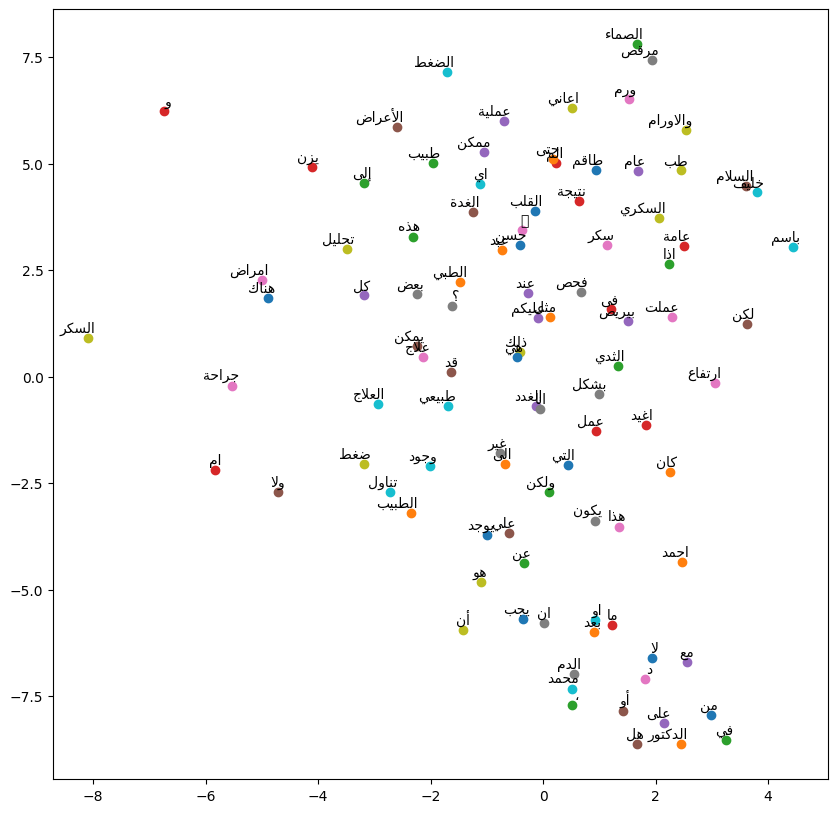

In [105]:
def reshape_arabic(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

num_words = 100
sorted_words = sorted(tokenizer.word_index, key=tokenizer.word_index.get)[:num_words]

indices = [tokenizer.word_index[word] for word in sorted_words]
selected_word_vectors = word_embeddings[indices]

pca = PCA(n_components=50)
reduced_vectors = pca.fit_transform(selected_word_vectors)

tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=300)
words_reduced = tsne.fit_transform(reduced_vectors)

plt.figure(figsize=(10, 10))
for i, word in enumerate(sorted_words):
    word = reshape_arabic(word)
    plt.scatter(words_reduced[i, 0], words_reduced[i, 1])
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.show()

## [6.5]

In [112]:
def find_closest_word(vec, word_embeddings, tokenizer):
    min_dist = 10000
    closest_word = None

    for word, index in tokenizer.word_index.items():
        if np.linalg.norm(word_embeddings[index] - vec) < min_dist:
            min_dist = np.linalg.norm(word_embeddings[index] - vec)
            closest_word = word

    return closest_word

def analogy(word_a, word_b, word_c, word_embeddings, tokenizer):
    """
    Performs the analogy operation: word_a - word_b + word_c = ?
    For example: king - man + woman = queen
    """
    try:
        word_a_emb = word_embeddings[tokenizer.word_index[word_a]]
        word_b_emb = word_embeddings[tokenizer.word_index[word_b]]
        word_c_emb = word_embeddings[tokenizer.word_index[word_c]]

        vec = word_a_emb - word_b_emb + word_c_emb
        closest_word = find_closest_word(vec, word_embeddings, tokenizer)

        return closest_word
    except KeyError:
        return "Word not in vocabulary."

# Example analogies
examples = [
    ("مرقص", "باسم", "الدكتور"),
    ("السكري", "القلب", "طبيب"),
    ("سكر", "دم", "محمد"),
]

for example in examples:
    result = analogy(*example, word_embeddings, tokenizer)
    print(f"{example[0]} - {example[1]} + {example[2]} = {result}")

مرقص - باسم + الدكتور = الدكتور
السكري - القلب + طبيب = طبيب
سكر - دم + محمد = محمد


# Question [7]: Deep Neural Network

In [113]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

تابع لرسم المنحنيات الخاصة بنتائج التدريب

## [7.1]

# Fully Connected NN

### [7.1.1]

Fully Connected NN using BoW

In [124]:
comparison_table

{'question_step_number': ['5.2', '5.4', '5.5', 5.6],
 'model_name': ['multinomial_logistic_regression',
  'multinomial_logistic_regression',
  'Logistic Regression (TF-IDF)',
  'logistic_regression'],
 'features': ['bag of words', 'bag of words', 'TF-IDF', 'Tfidf'],
 'model_parameters': ['default',
  'default',
  'default',
  'mindf = 2 , max_df = 0.75, ngram = (2, 3)'],
 'preprocessing_methods': ['none (raw data)',
  'bestclearData',
  'bestclearData',
  'bestclearData'],
 'accuracy': [0.7016945297395656,
  0.7066985101785511,
  0.7363243489139087,
  0.7522461048561355],
 'balance_accuracy': [0.6843098307263586,
  0.689751064231179,
  0.7226579116861755,
  0.7480967300525099]}

In [125]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Clean Data

# 8 labels of specializations
train_data['label'] = train_data['label'].map(specialty_mapping).fillna(train_data['label'])
test_data['label'] = test_data['label'].map(specialty_mapping).fillna(test_data['label'])
val_data['label'] = test_data['label'].map(specialty_mapping).fillna(test_data['label'])

# questions + answers
train_data['combined_text'] = train_data['question'].fillna('') + ' ' + train_data['answer'].fillna('')
test_data['combined_text'] = test_data['question'].fillna('') + ' ' + test_data['answer'].fillna('')
val_data['combined_text'] = test_data['question'].fillna('') + ' ' + test_data['answer'].fillna('')

# bestClearData
train_data['combined_text'] = train_data['question'].apply(lambda x: bestclearData(str(x), False)) + ' ' + train_data['answer'].apply(lambda x: bestclearData(str(x), True))

X_train = train_data['combined_text'].tolist()
Y_train = train_data['label'].tolist()

X_test = test_data['combined_text'].tolist()
Y_test = test_data['label'].tolist()

X_val = val_data['combined_text'].tolist()
Y_val = val_data['label'].tolist()

# Bag of Words
vectorizer = CountVectorizer(max_features=1000)
X_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)
X_val_bow = vectorizer.transform(X_val)

X_bow_sparse = csr_matrix(X_bow)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(Y_train)
Y_train_onehot = tf.keras.utils.to_categorical(y_train_encoded, num_classes=len(label_encoder.classes_))
y_test_encoded = label_encoder.transform(Y_test)
Y_test_onehot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))

y_val_encoded = label_encoder.transform(Y_val)
Y_val_onehot = tf.keras.utils.to_categorical(y_val_encoded, num_classes=len(label_encoder.classes_))

In [126]:
tf.keras.backend.clear_session()

In [127]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_bow_sparse.shape[1],), sparse=True),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               128128    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
Total params: 136904 (534.78 KB)
Trainable params: 136904 (534.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [128]:
history_BoW = model.fit(X_bow_sparse.toarray(), Y_train_onehot, epochs=20, batch_size=32,validation_data=(X_val_bow, Y_val_onehot),callbacks=[early_stopping])

Epoch 1/20

1649/1649 [==============================] - 5s 3ms/step - loss: 1.1439 - accuracy: 0.6989 - val_loss: 1.1880 - val_accuracy: 0.7280
Epoch 2/20
1649/1649 [==============================] - 4s 3ms/step - loss: 1.0428 - accuracy: 0.7269 - val_loss: 1.2212 - val_accuracy: 0.7253
Epoch 3/20
1649/1649 [==============================] - 4s 3ms/step - loss: 0.9952 - accuracy: 0.7359 - val_loss: 1.1986 - val_accuracy: 0.7289


In [129]:
loss, accuracy_BoW = model.evaluate(X_test_bow, Y_test_onehot, verbose=False)
print("Accuracy: {:.4f}".format(accuracy_BoW))

test_predictions = model.predict(X_test_bow)

test_pred_classes = np.argmax(test_predictions, axis=1)

test_true_classes = np.argmax(Y_test_onehot, axis=1)

balanced_accuracy_BoW = balanced_accuracy_score(test_true_classes, test_pred_classes)

print("Balanced Accuracy: {:.4f}".format(balanced_accuracy_BoW))

Accuracy: 0.7340
550/550 [==============================] - 1s 2ms/step
Balanced Accuracy: 0.7185


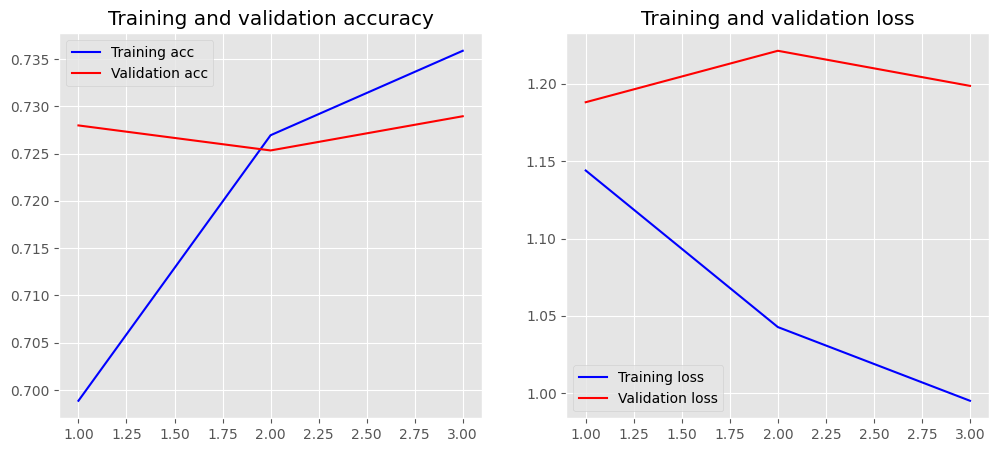

In [130]:
plot_history(history_BoW)

In [131]:
comparison_table['question_step_number'].append("7.1.1")
comparison_table['model_name'].append('fully_connected_neural_network')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("bestClearData")
comparison_table['accuracy'].append(accuracy_BoW)
comparison_table['balance_accuracy'].append(balanced_accuracy_BoW)

### [7.1.2]

## TF IDF

In [133]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Clean Data

# 8 labels of specializations
train_data['label'] = train_data['label'].map(specialty_mapping).fillna(train_data['label'])
test_data['label'] = test_data['label'].map(specialty_mapping).fillna(test_data['label'])
val_data['label'] = test_data['label'].map(specialty_mapping).fillna(test_data['label'])

# questions + answers
train_data['combined_text'] = train_data['question'].fillna('') + ' ' + train_data['answer'].fillna('')
test_data['combined_text'] = test_data['question'].fillna('') + ' ' + test_data['answer'].fillna('')
val_data['combined_text'] = test_data['question'].fillna('') + ' ' + test_data['answer'].fillna('')

# bestClearData
train_data['combined_text'] = train_data['question'].apply(lambda x: bestclearData(str(x), False)) + ' ' + train_data['answer'].apply(lambda x: bestclearData(str(x), True))

X_train = train_data['combined_text'].tolist()
Y_train = train_data['label'].tolist()

X_test = test_data['combined_text'].tolist()
Y_test = test_data['label'].tolist()

X_val = val_data['combined_text'].tolist()
Y_val = val_data['label'].tolist()

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_tf_idf_sparse = csr_matrix(X_train_tfidf)

X_test_tf_idf = vectorizer.transform(X_test)
X_val_tf_idf = vectorizer.transform(X_val)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(Y_train)
Y_train_onehot = tf.keras.utils.to_categorical(y_train_encoded, num_classes=len(label_encoder.classes_))
y_test_encoded = label_encoder.transform(Y_test)
Y_test_onehot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))
y_val_encoded = label_encoder.transform(Y_val)
Y_val_onehot = tf.keras.utils.to_categorical(y_val_encoded, num_classes=len(label_encoder.classes_))


In [134]:
tf.keras.backend.clear_session()

In [135]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_tf_idf_sparse.shape[1]), sparse=True),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               128128    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
Total params: 136904 (534.78 KB)
Trainable params: 136904 (534.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [136]:
history_tf_idf = model.fit(X_tf_idf_sparse.toarray(), Y_train_onehot, epochs=20, batch_size=32 ,validation_data=(X_val_tf_idf, Y_val_onehot) ,callbacks=[early_stopping])

Epoch 1/20
1649/1649 [==============================] - 5s 3ms/step - loss: 1.1365 - accuracy: 0.6959 - val_loss: 6.4306 - val_accuracy: 0.7275
Epoch 2/20
1649/1649 [==============================] - 5s 3ms/step - loss: 1.0405 - accuracy: 0.7265 - val_loss: 6.5082 - val_accuracy: 0.7262
Epoch 3/20
1649/1649 [==============================] - 4s 3ms/step - loss: 1.0172 - accuracy: 0.7314 - val_loss: 6.1156 - val_accuracy: 0.7304
Epoch 4/20
1649/1649 [==============================] - 4s 3ms/step - loss: 0.9959 - accuracy: 0.7358 - val_loss: 5.9488 - val_accuracy: 0.7296
Epoch 5/20
1649/1649 [==============================] - 4s 3ms/step - loss: 0.9728 - accuracy: 0.7395 - val_loss: 6.1126 - val_accuracy: 0.7255
Epoch 6/20
1649/1649 [==============================] - 5s 3ms/step - loss: 0.9479 - accuracy: 0.7448 - val_loss: 5.4088 - val_accuracy: 0.7238
Epoch 7/20
1649/1649 [==============================] - 4s 3ms/step - loss: 0.9173 - accuracy: 0.7521 - val_loss: 5.5850 - val_accuracy:

In [137]:
loss, accuracy_tf_idf = model.evaluate(X_test_tf_idf, Y_test_onehot, verbose=False)
print("Accuracy: {:.4f}".format(accuracy_tf_idf))

test_predictions = model.predict(X_test_tf_idf)

test_pred_classes = np.argmax(test_predictions, axis=1)

test_true_classes = np.argmax(Y_test_onehot, axis=1)

balanced_accuracy_tf_idf = balanced_accuracy_score(test_true_classes, test_pred_classes)

print("Balanced Accuracy: {:.4f}".format(balanced_accuracy_tf_idf))

Accuracy: 0.7214
550/550 [==============================] - 1s 2ms/step
Balanced Accuracy: 0.7071


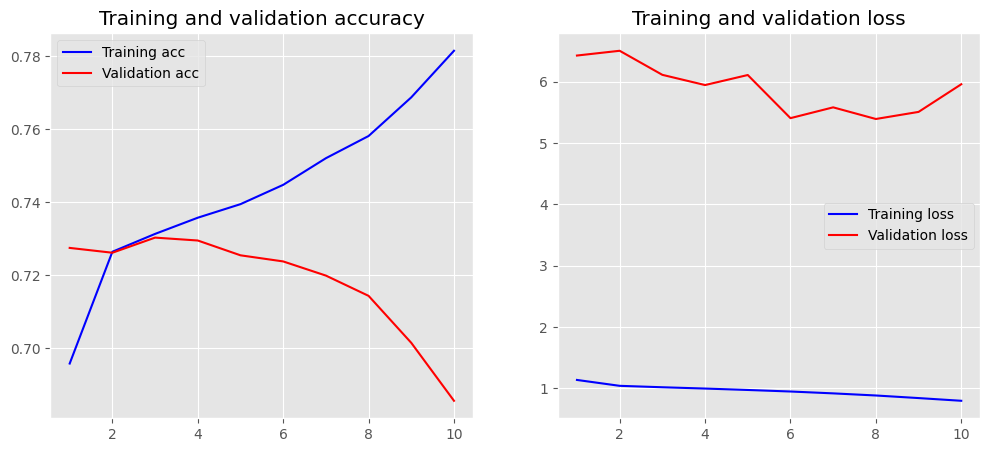

In [138]:
plot_history(history_tf_idf)

In [139]:
comparison_table['question_step_number'].append("7.1.2")
comparison_table['model_name'].append('fully_connected_neural_network')
comparison_table['features'].append('TF IDF')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("bestClearData")
comparison_table['accuracy'].append(accuracy_tf_idf)
comparison_table['balance_accuracy'].append(balanced_accuracy_tf_idf)

## [7.2]

# Convolutional Neural Networks (CNN) with embedding layers

### [7.2.1]

<div dir="rtl">
استخدام مصفوفة الembeddings الناتجة من word2vec ومن دون تعديلها في الشبكة
</div>

In [141]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Clean Data

# 8 labels of specializations
train_data['label'] = train_data['label'].map(specialty_mapping).fillna(train_data['label'])
test_data['label'] = test_data['label'].map(specialty_mapping).fillna(test_data['label'])
val_data['label'] = test_data['label'].map(specialty_mapping).fillna(test_data['label'])

# questions + answers
train_data['combined_text'] = train_data['question'].fillna('') + ' ' + train_data['answer'].fillna('')
test_data['combined_text'] = test_data['question'].fillna('') + ' ' + test_data['answer'].fillna('')
val_data['combined_text'] = test_data['question'].fillna('') + ' ' + test_data['answer'].fillna('')

# bestClearData
train_data['combined_text'] = train_data['question'].apply(lambda x: bestclearData(str(x), False)) + ' ' + train_data['answer'].apply(lambda x: bestclearData(str(x), True))


In [154]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train_data['combined_text'])
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

X_train = tokenizer.texts_to_sequences(train_data['combined_text'])
X_test = tokenizer.texts_to_sequences(test_data['combined_text'])
X_val = tokenizer.texts_to_sequences(val_data['combined_text'])

X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(X_val, maxlen=MAX_SEQUENCE_LENGTH)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['label'])
y_test = label_encoder.transform(test_data['label'])
y_val = label_encoder.transform(val_data['label'])

y_train = to_categorical(y_train, num_classes=len(label_encoder.classes_))
y_test = to_categorical(y_test, num_classes=len(label_encoder.classes_))
y_val = to_categorical(y_val, num_classes=len(label_encoder.classes_))

embedding_dim = 100
embedding_matrix = word_embeddings

model = Sequential()
model.add(Embedding(len(word_index) + 1,
                    embedding_dim,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=False))

model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

optimizer = Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Found 101413 unique tokens.


In [155]:
tf.keras.backend.clear_session()

In [156]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history_word_embedding_without_train = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/20


825/825 [==============================] - 12s 14ms/step - loss: 1.7911 - accuracy: 0.3472 - val_loss: 1.9077 - val_accuracy: 0.2362
Epoch 2/20
825/825 [==============================] - 11s 13ms/step - loss: 1.5808 - accuracy: 0.4706 - val_loss: 1.8528 - val_accuracy: 0.2971
Epoch 3/20
825/825 [==============================] - 11s 13ms/step - loss: 1.5016 - accuracy: 0.5135 - val_loss: 1.8268 - val_accuracy: 0.3087
Epoch 4/20
825/825 [==============================] - 11s 13ms/step - loss: 1.4545 - accuracy: 0.5411 - val_loss: 1.7917 - val_accuracy: 0.3446
Epoch 5/20
825/825 [==============================] - 10s 13ms/step - loss: 1.4095 - accuracy: 0.5640 - val_loss: 1.7275 - val_accuracy: 0.3961
Epoch 6/20
825/825 [==============================] - 10s 12ms/step - loss: 1.3789 - accuracy: 0.5807 - val_loss: 1.6744 - val_accuracy: 0.4496
Epoch 7/20
825/825 [==============================] - 10s 12ms/step - loss: 1.3494 - accuracy: 0.5952 - val_loss: 1.6352 - val_accuracy: 0.4666
Epo

In [157]:
loss, accuracy_word_embedding_without_train = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy_word_embedding_without_train}')

test_predictions = model.predict(X_test)

test_pred_classes = np.argmax(test_predictions, axis=1)

test_true_classes = np.argmax(y_test, axis=1)

balanced_accuracy_word_embedding_without_train = balanced_accuracy_score(test_true_classes, test_pred_classes)

print("Balanced Accuracy: {:.4f}".format(balanced_accuracy_word_embedding_without_train))

 29/550 [>.............................] - ETA: 1s - loss: 1.6595 - accuracy: 0.4881

550/550 [==============================] - 2s 4ms/step - loss: 1.4242 - accuracy: 0.5681
Test Accuracy: 0.5680655241012573
550/550 [==============================] - 2s 4ms/step
Balanced Accuracy: 0.5023


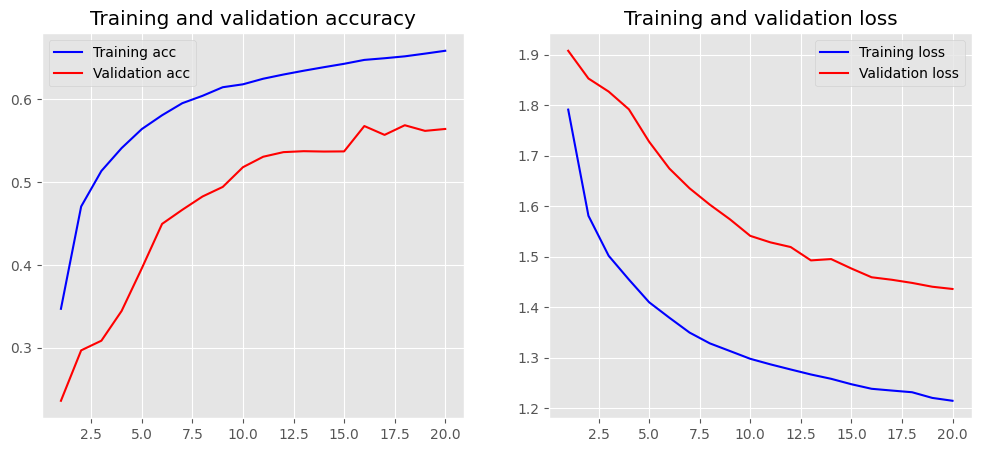

In [158]:
plot_history(history_word_embedding_without_train)

In [159]:
comparison_table['question_step_number'].append("7.2.1")
comparison_table['model_name'].append('neural_network_world_embedding_without_train')
comparison_table['features'].append('world_embedding')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("bestClearData")
comparison_table['accuracy'].append(accuracy_word_embedding_without_train)
comparison_table['balance_accuracy'].append(balanced_accuracy_word_embedding_without_train)

### [7.2.2]

<div dir="rtl">
استخدام مصفوفة الembeddings الناتجة من word2vec ومع تعديلها في الشبكة
</div>

In [161]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train_data['combined_text'])
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')


X_train = tokenizer.texts_to_sequences(train_data['combined_text'])
X_test = tokenizer.texts_to_sequences(new_test_data['combined_text'])
X_val = tokenizer.texts_to_sequences(new_val_data['combined_text'])

X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(X_val, maxlen=MAX_SEQUENCE_LENGTH)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['label'])
y_test = label_encoder.transform(new_test_data['label'])
y_val = label_encoder.transform(new_val_data['label'])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

embedding_dim = 100 
embedding_matrix = word_embeddings

model = Sequential()
model.add(Embedding(len(word_index) + 1,
                    embedding_dim,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=True)) 
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Found 101413 unique tokens.


In [162]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history_word_embedding_with_train = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/20


825/825 [==============================] - 65s 78ms/step - loss: 1.7766 - accuracy: 0.3653 - val_loss: 1.8712 - val_accuracy: 0.2892
Epoch 2/20
825/825 [==============================] - 65s 79ms/step - loss: 1.5062 - accuracy: 0.5165 - val_loss: 1.7078 - val_accuracy: 0.4621
Epoch 3/20
825/825 [==============================] - 61s 74ms/step - loss: 1.3800 - accuracy: 0.5832 - val_loss: 1.5815 - val_accuracy: 0.5043
Epoch 4/20
825/825 [==============================] - 58s 70ms/step - loss: 1.3062 - accuracy: 0.6220 - val_loss: 1.4959 - val_accuracy: 0.5619
Epoch 5/20
825/825 [==============================] - 64s 77ms/step - loss: 1.2570 - accuracy: 0.6464 - val_loss: 1.4598 - val_accuracy: 0.5519
Epoch 6/20
825/825 [==============================] - 62s 75ms/step - loss: 1.2152 - accuracy: 0.6677 - val_loss: 1.3837 - val_accuracy: 0.6043
Epoch 7/20
825/825 [==============================] - 58s 70ms/step - loss: 1.1713 - accuracy: 0.6861 - val_loss: 1.3454 - val_accuracy: 0.6192
Epo

In [163]:
loss, accuracy_word_embedding_with_train = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy_word_embedding_with_train}')

test_predictions = model.predict(X_test)

test_pred_classes = np.argmax(test_predictions, axis=1)

test_true_classes = np.argmax(y_test, axis=1)

balanced_accuracy_word_embedding_with_train = balanced_accuracy_score(test_true_classes, test_pred_classes)

print("Balanced Accuracy: {:.4f}".format(balanced_accuracy_word_embedding_with_train))

 14/550 [..............................] - ETA: 2s - loss: 1.6263 - accuracy: 0.5335 

550/550 [==============================] - 2s 4ms/step - loss: 1.2729 - accuracy: 0.6536
Test Accuracy: 0.6536449193954468
550/550 [==============================] - 2s 4ms/step
Balanced Accuracy: 0.6046


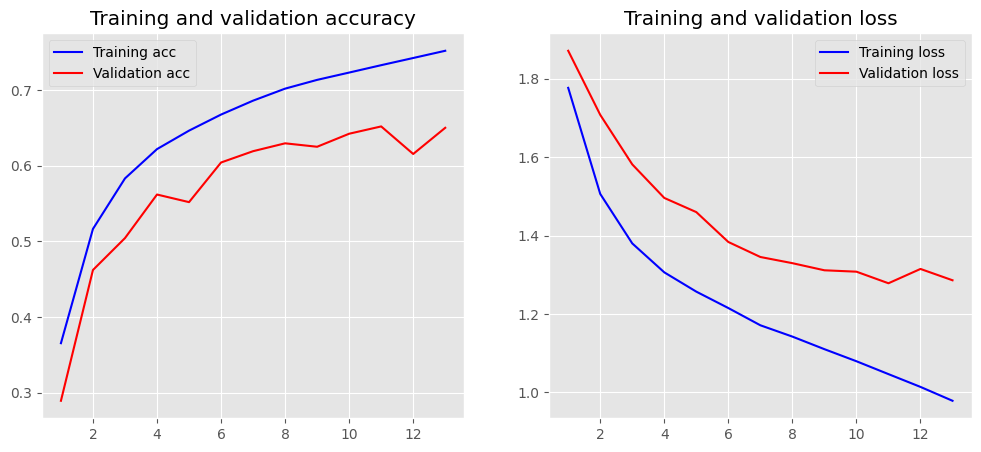

In [164]:
plot_history(history_word_embedding_with_train)

In [165]:
comparison_table['question_step_number'].append("7.2.2")
comparison_table['model_name'].append('neural_network_world_embedding_with_train')
comparison_table['features'].append('world_embedding')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("bestClearData")
comparison_table['accuracy'].append(accuracy_word_embedding_with_train)
comparison_table['balance_accuracy'].append(balanced_accuracy_word_embedding_with_train)

### [7.2.3]

من دون استخدام اشعة مسبقة

In [167]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train_data['combined_text'])
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

X_train = tokenizer.texts_to_sequences(train_data['combined_text'])
X_test = tokenizer.texts_to_sequences(new_test_data['combined_text'])
X_val = tokenizer.texts_to_sequences(new_val_data['combined_text'])

X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(X_val, maxlen=MAX_SEQUENCE_LENGTH)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['label'])
y_test = label_encoder.transform(new_test_data['label'])
y_val = label_encoder.transform(new_val_data['label'])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Found 101413 unique tokens.


In [168]:
epochs = 10
batch_size = 64

history_without_word_embedding = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val))

loss, accuracy_without_word_embedding = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy_without_word_embedding}')

test_predictions = model.predict(X_test)

test_pred_classes = np.argmax(test_predictions, axis=1)

test_true_classes = np.argmax(y_test, axis=1)

balanced_accuracy_without_word_embedding = balanced_accuracy_score(test_true_classes, test_pred_classes)

print("Balanced Accuracy: {:.4f}".format(balanced_accuracy_without_word_embedding))

Epoch 1/10
825/825 [==============================] - 52s 62ms/step - loss: 1.1702 - accuracy: 0.6795 - val_loss: 1.1271 - val_accuracy: 0.7304
Epoch 2/10
825/825 [==============================] - 50s 60ms/step - loss: 0.9176 - accuracy: 0.7583 - val_loss: 1.2045 - val_accuracy: 0.7209
Epoch 3/10
825/825 [==============================] - 52s 63ms/step - loss: 0.5894 - accuracy: 0.8510 - val_loss: 1.5673 - val_accuracy: 0.6679
Epoch 4/10
825/825 [==============================] - 52s 62ms/step - loss: 0.4280 - accuracy: 0.8993 - val_loss: 1.9836 - val_accuracy: 0.6761
Epoch 5/10
825/825 [==============================] - 50s 61ms/step - loss: 0.3992 - accuracy: 0.9058 - val_loss: 2.1880 - val_accuracy: 0.6822
Epoch 6/10
825/825 [==============================] - 50s 61ms/step - loss: 0.3901 - accuracy: 0.9074 - val_loss: 2.3141 - val_accuracy: 0.6905
Epoch 7/10
825/825 [==============================] - 49s 60ms/step - loss: 0.3872 - accuracy: 0.9077 - val_loss: 2.4364 - val_accuracy:

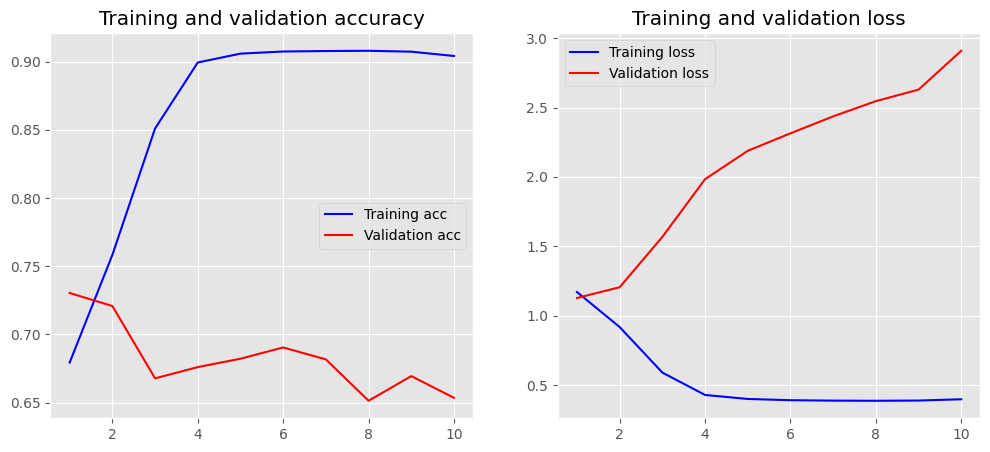

In [169]:
plot_history(history_without_word_embedding)

In [176]:
comparison_table['question_step_number'].append("7.2.3")
comparison_table['model_name'].append('neural_network_without_word_embedding')
comparison_table['features'].append('None')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("bestClearData")
comparison_table['accuracy'].append(accuracy_without_word_embedding)
comparison_table['balance_accuracy'].append(balanced_accuracy_without_word_embedding)

### [7.2.4]

# Fast Text Word Embedding

In [177]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(new_train_data['combined_text'])
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')


X_train = tokenizer.texts_to_sequences(new_train_data['combined_text'])
X_test = tokenizer.texts_to_sequences(new_test_data['combined_text'])
X_val = tokenizer.texts_to_sequences(new_val_data['combined_text'])

X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(X_val, maxlen=MAX_SEQUENCE_LENGTH)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(new_train_data['label'])
y_test = label_encoder.transform(new_test_data['label'])
y_val = label_encoder.transform(new_val_data['label'])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

fasttext_embeddings_path = 'C:/ITE/ITE 5/NLP/practical_lectures/h1/cc.ar.300.vec'

embeddings_index = {}

with open(fasttext_embeddings_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = vector

embedding_dim = 300
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Found 101413 unique tokens.


In [178]:
model = Sequential()
model.add(Embedding(len(word_index) + 1, embedding_dim, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [179]:
history_fast_text = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/20


825/825 [==============================] - 26s 31ms/step - loss: 1.6465 - accuracy: 0.4397 - val_loss: 1.6526 - val_accuracy: 0.4687
Epoch 2/20
825/825 [==============================] - 24s 29ms/step - loss: 1.3582 - accuracy: 0.6013 - val_loss: 1.4042 - val_accuracy: 0.6013
Epoch 3/20
825/825 [==============================] - 24s 29ms/step - loss: 1.2373 - accuracy: 0.6643 - val_loss: 1.2917 - val_accuracy: 0.6519
Epoch 4/20
825/825 [==============================] - 24s 29ms/step - loss: 1.1897 - accuracy: 0.6862 - val_loss: 1.2514 - val_accuracy: 0.6709
Epoch 5/20
825/825 [==============================] - 24s 29ms/step - loss: 1.1594 - accuracy: 0.6987 - val_loss: 1.2288 - val_accuracy: 0.6694
Epoch 6/20
825/825 [==============================] - 21s 25ms/step - loss: 1.1424 - accuracy: 0.7058 - val_loss: 1.2110 - val_accuracy: 0.6858
Epoch 7/20
825/825 [==============================] - 21s 25ms/step - loss: 1.1267 - accuracy: 0.7125 - val_loss: 1.2029 - val_accuracy: 0.6882
Epo

In [180]:
loss, accuracy_fast_text = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy_fast_text}')

test_predictions = model.predict(X_test)

test_pred_classes = np.argmax(test_predictions, axis=1)

test_true_classes = np.argmax(y_test, axis=1)

balanced_accuracy_fast_text = balanced_accuracy_score(test_true_classes, test_pred_classes)

print("Balanced Accuracy: {:.4f}".format(balanced_accuracy_fast_text))

550/550 [==============================] - 4s 7ms/step - loss: 1.2003 - accuracy: 0.6852
Test Accuracy: 0.6852041482925415
550/550 [==============================] - 4s 7ms/step
Balanced Accuracy: 0.6425


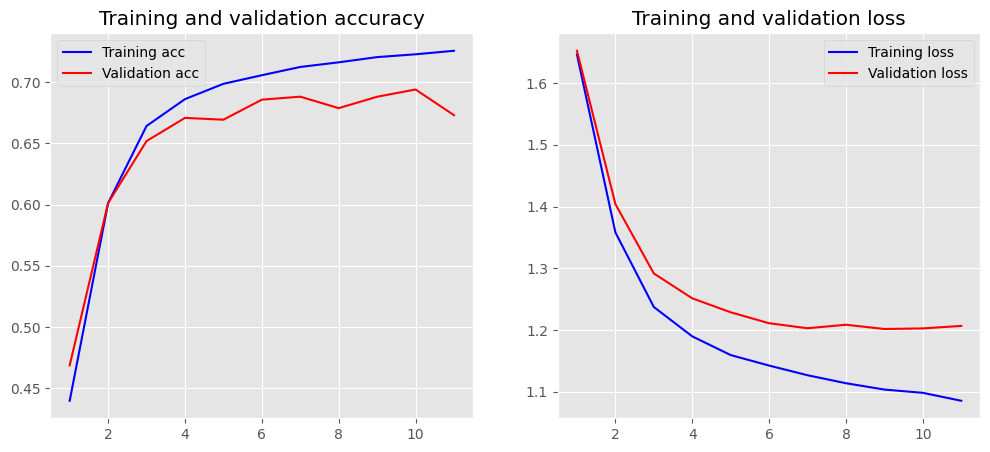

In [181]:
plot_history(history_fast_text)

In [182]:
comparison_table['question_step_number'].append("7.2.4")
comparison_table['model_name'].append('neural_network_with_fast_text')
comparison_table['features'].append('None')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("bestClearData")
comparison_table['accuracy'].append(accuracy_fast_text)
comparison_table['balance_accuracy'].append(balanced_accuracy_fast_text)

## [7.3]

#### لقد تم رسم المنحنيات وضبط معاملات النماذج السابقة على بيانات التحقق

## Extra [7.4]

550/550 [==============================] - 4s 7ms/step
[[1452   24  122   46  130   25  121  103]
 [  40  292  101   77   78   11   47   94]
 [ 135   34 2133   64  199   33  189  353]
 [  70  102  168  858   88   17   77   74]
 [ 147   33  225   57 2428   52  303  171]
 [  58   10   70   25   68  555  154   45]
 [ 143   26  213   53  212   42 2552  163]
 [  89   26  186   57  135   27  124 1780]]


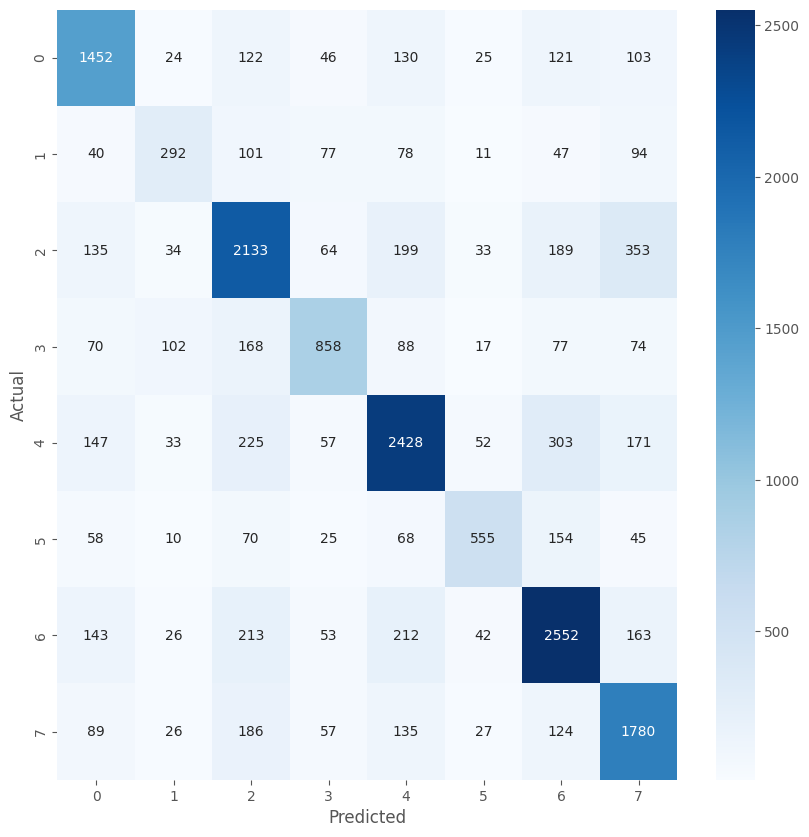

In [183]:
from sklearn.metrics import confusion_matrix

y_pred_probs = model.predict(X_test)

y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)

print(conf_matrix)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, fmt='d', ax=ax, cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Final Results

In [187]:
df = pd.DataFrame(comparison_table)
df

,question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy
0,5.2,multinomial_logistic_regression,bag of words,default,none (raw data),0.701695,0.684310
1,5.4,multinomial_logistic_regression,bag of words,default,bestclearData,0.706699,0.689751
2,5.5,Logistic Regression (TF-IDF),TF-IDF,default,bestclearData,0.736324,0.722658
3,5.6,logistic_regression,Tfidf,"mindf = 2 , max_df = 0.75, ngram = (2, 3)",bestclearData,0.752246,0.748097
4,7.1.1,fully_connected_neural_network,bag of words,default,bestClearData,0.734050,0.718473
5,7.1.2,fully_connected_neural_network,TF IDF,default,bestClearData,0.721369,0.707146
6,7.2.1,neural_network_world_embedding_without_train,world_embedding,default,bestClearData,0.568066,0.502283
7,7.2.2,neural_network_world_embedding_with_train,world_embedding,default,bestClearData,0.653645,0.604571
8,7.2.3,neural_network_without_word_embedding,None,default,bestClearData,0.655635,0.627159
9,7.2.4,neural_network_with_fast_text,fast text word embedding,default,bestClearData,0.685204,0.642499
